In [1]:
"""
#########################################################################
#                                                                       
#               Arquivo para geração do Monitoramento da PrEP
#                                                                       
# Versão:             1.04                                               
#                                                                       
# Descrição:          Este script organiza os bancos da PrEP,
#                     gera tabelas no Excel com os dados gerais e um 
                      um arquivo no PowerPoint com os gráficos e figuras.                                          
#                                                                       
# Autor:              Assessoria de Monitoramento e Avaliação (AMA)    
#                                                                       
# Data de Criação:    10/09/2023                                        
#                                                                     
# Última Atualização: 14/05/2024                                    
#                                                                       
# Sobre versão:       Ajustada para o Pandas 2.2.0, inclusão das variáveis de Mpox e drogas injetaveis
#                     Utiliza a planilha Versoes_Bancos de dados para puxar as variáveis [V:\Monitoramento e Avaliação\DOCUMENTOS\Python]
#                     Esse script é relativo ao banco de 2024-01-01                                                 
#########################################################################
"""

'\n#########################################################################\n#                                                                       \n#               Arquivo para geração do Monitoramento da PrEP\n#                                                                       \n# Versão:             1.04                                               \n#                                                                       \n# Descrição:          Este script organiza os bancos da PrEP,\n#                     gera tabelas no Excel com os dados gerais e um \n                      um arquivo no PowerPoint com os gráficos e figuras.                                          \n#                                                                       \n# Autor:              Assessoria de Monitoramento e Avaliação (AMA)    \n#                                                                       \n# Data de Criação:    10/09/2023                                        \n#               

In [2]:
from datetime import datetime, date
from datetime import timedelta
from dateutil import parser
import os
import io
from io import BytesIO
import locale
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import numpy as np
import openpyxl
from openpyxl.drawing.image import Image
from openpyxl import load_workbook
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.chart.data import CategoryChartData
from pptx.dml.color import RGBColor
from pptx.enum.text import PP_ALIGN
from pptx.enum.shapes import MSO_SHAPE
from pptx.enum.shapes import MSO_CONNECTOR_TYPE
from pptx.dml.line import LineFormat
import seaborn as sns
import shutil
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import sys
import time
import win32com.client as win32
import xlsxwriter
import warnings
import importlib

In [3]:
sys.path.append("//SAP109/Bancos AMA/Arquivos Atuais/Programas Atuais/Python/Programas Ativos/Monitoramento Clinico")
# Importa as funções próprias
import funcoes_gerais as fg
import organizacao_bases_prep as prep

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = (11,7)

In [6]:
## ATENÇÃO! Nenhuma célula exige entrada manual. Digite a data de fechamento do banco quando perguntado.

hoje = pd.to_datetime(input("Digite a data de fechamento do banco no formato aaaa-mm-dd \n").strip())
hoje = hoje.normalize()
hoje_str = hoje.strftime('%Y-%m-%d')

ano = hoje.year
mes = hoje.month

mes_nome = fg.mes_nome(hoje)

## Ajuste o ano de corte se necessário
ano_corte = ano - 10

Digite a data de fechamento do banco no formato aaaa-mm-dd 
 2025-09-30


In [7]:
hoje2_dt = pd.to_datetime(hoje)

# Create a dictionary for month names in Brazilian Portuguese
month_names_pt_br = {
    'Jan': 'Jan',
    'Feb': 'Fev',
    'Mar': 'Mar',
    'Apr': 'Abr',
    'May': 'Mai',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Aug': 'Ago',
    'Sep': 'Set',
    'Oct': 'Out',
    'Nov': 'Nov',
    'Dec': 'Dez'
}

# Format 'hoje2' to the desired format
hoje2 = f"{month_names_pt_br[hoje2_dt.strftime('%b')].lower()}/{hoje2_dt.strftime('%Y')}"

print(hoje2)

set/2025


In [8]:
# Verificar se o arquivo modelo existe
modelo_excel = "Modelo_PrEP.xlsx"
caminho_modelo = os.path.join(modelo_excel)

if os.path.exists(caminho_modelo):
    print("\n Tudo certo!")
else:
    print(f"O arquivo modelo '{modelo_excel}' não foi encontrado na pasta local.")


 Tudo certo!


In [9]:
Cad, Disp, PrimA, Ret30, Acomp = prep.carregar_bases(hoje,
                                                     Cad = True,
                                                     Disp = True,
                                                     PrimA = True,
                                                     Ret30 = True,
                                                     Acomp = True)

//SAP109/Bancos AMA\Arquivos Atuais/Programas Atuais/Python/Programas Ativos/Monitoramento Clinico\organizacao_bases_prep.py:102: DtypeWarning: Columns (6,13,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{caminho}/{base}.txt", sep="\t", names=colunas,
//SAP109/Bancos AMA\Arquivos Atuais/Programas Atuais/Python/Programas Ativos/Monitoramento Clinico\organizacao_bases_prep.py:102: DtypeWarning: Columns (8,9,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{caminho}/{base}.txt", sep="\t", names=colunas,
//SAP109/Bancos AMA\Arquivos Atuais/Programas Atuais/Python/Programas Ativos/Monitoramento Clinico\organizacao_bases_prep.py:102: DtypeWarning: Columns (58,59,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{caminho}/{base}.txt", sep="\t", names=colunas,


In [10]:
# Carregar o banco de dados cadastro_hiv_uni.csv
cadastro_path = r"V:\2025\Monitoramento e Avaliação\COMPARTILHADO\AMA - Banco de Dados\AMA-VIP\Bancos Compartilhados HIV\Cadastro.csv"
cadastro_HIV = pd.read_csv(cadastro_path, sep=";", encoding="latin-1", low_memory=False)

In [11]:
# Carregar o banco de dados PVHA.csvV:\2025\Monitoramento e Avaliação\COMPARTILHADO\AMA - Banco de Dados\AMA-VIP\Bancos Compartilhados HIV\
PVHA_path = r"V:\2025\Monitoramento e Avaliação\COMPARTILHADO\AMA - Banco de Dados\AMA-VIP\Bancos Compartilhados HIV\PVHA.csv"
PVHA_tb = pd.read_csv(PVHA_path, sep=";", encoding="latin-1", low_memory=False)

In [12]:
# DF_prim
colunas_prim = ['Cod_unificado', 'data_min', 'data_dispensa_prim']
DF_prim = pd.read_csv("//SAP109/Bancos AMA/Arquivos Atuais/Bancos Atuais HIV/Mensais/PVHA_prim_ult.csv",
                      sep=";", encoding="latin-1", usecols=colunas_prim, low_memory=True)

C:\Users\isabela.pereira\AppData\Local\Temp\ipykernel_22944\3754796704.py:3: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  DF_prim = pd.read_csv("//SAP109/Bancos AMA/Arquivos Atuais/Bancos Atuais HIV/Mensais/PVHA_prim_ult.csv",


In [13]:
# Carregar o banco de dados Sinan_hiv_adulto.csv
SINAN_path = r"V:\2025\Monitoramento e Avaliação\COMPARTILHADO\AMA - Banco de Dados\AMA-VIP\Bancos Compartilhados HIV\Sinan_hiv_adulto.csv"

# Modo eficiente, carrega só as colunas necessárias
SINAN_tb = pd.read_csv(
    SINAN_path,
    sep=";",
    encoding="latin-1",
    usecols=['Cod_unificado'],
    low_memory=True,
    on_bad_lines='warn'
)

In [14]:
# Caminho para o arquivo
Pacientes_path = r"V:\2025\Monitoramento e Avaliação\COMPARTILHADO\AMA - Banco de Dados\Consolidado\55 - Setembro 2025\tb_paciente_consolidado.txt"

# Lista com os nomes das colunas
colunas = [
    "codigo_paciente", "codigo_pac_eleito", "data_nascimento", "sexo", "raca", "estado_civil",
    "codigo_ibge_resid", "uf_residencia", "codigo_ibge_nasc", "uf_cid_nasc", "cd4_cadas", "cv_cadas",
    "acomp_medico", "ja_estava_em_trat", "escolaridade", "data_cadastro", "data_digitacao", "data_ult_atu",
    "dt_inicio_antiretro", "caso_aids", "unidade_dispensadora", "st_trans", "st_prep", "cd_pais", "num_cpf_pac",
    "st_populacao_rua", "st_privada_liberdade", "st_estrangeiro", "co_orientacao_sexual", "co_genero"
]

# Carregar o arquivo com os nomes das colunas definidos manualmente
tb_paciente = pd.read_csv(Pacientes_path, sep='\t', encoding='latin-1', names=colunas, header=None)


C:\Users\isabela.pereira\AppData\Local\Temp\ipykernel_22944\2180713864.py:14: DtypeWarning: Columns (6,12,13,15,16,20,21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tb_paciente = pd.read_csv(Pacientes_path, sep='\t', encoding='latin-1', names=colunas, header=None)


### Banco de dispensa

In [15]:
#Se quiser ver os nomes das colunas, retirar os # do código abaixo

#colunas = Disp.columns
#print("As colunas do DataFrame são:")
#for coluna in colunas:
   #print(coluna)


In [16]:
# Conta os registros únicos (False) e os duplicados (True).
Disp.duplicated(subset="codigo_pac_eleito").value_counts()

True     1284665
False     300529
Name: count, dtype: int64

In [17]:
# Trabalhando as datas
Disp['data_dispensa'] = pd.to_datetime(Disp['data_dispensa'],errors='coerce')
Disp['dt_disp'] = Disp['data_dispensa'].dt.normalize()

Disp['ano_disp']= Disp['dt_disp'].dt.year
Disp['mesN_disp']= Disp['dt_disp'].dt.month
Disp['mes_disp']= Disp['dt_disp'].dt.month_name().str[:3]

In [18]:
Disp['ano_disp'].value_counts().sort_index()

ano_disp
2017         4
2018     22160
2019     65196
2020     82367
2021    118638
2022    187741
2023    282630
2024    417326
2025    409131
2109         1
Name: count, dtype: int64

In [19]:
# Filtre o DataFrame para manter apenas as linhas com datas em ou antes da 'data_fechamento'
Disp = Disp[(Disp['dt_disp'] <= hoje2_dt) & (Disp['ano_disp'] >= 2018)]

In [20]:
# Define a mapping from English month names to Portuguese abbreviations
month_mapping = {
    'Jan': 'Jan',
    'Feb': 'Fev',
    'Mar': 'Mar',
    'Apr': 'Abr',
    'May': 'Mai',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Aug': 'Ago',
    'Sep': 'Set',
    'Oct': 'Out',
    'Nov': 'Nov',
    'Dec': 'Dez',
}

# Convert the 'dt_disp' column to the month abbreviation and map it to the Portuguese version
Disp['mes_disp'] = Disp['dt_disp'].dt.month_name().str[:3].map(month_mapping)

In [21]:
# Soma a duração de cod_pac e dt_disp iguais.
Disp['duracao_sum'] = Disp.groupby(['codigo_pac_eleito', 'dt_disp'])['duracao'].transform('sum')

In [22]:
Disp['Cod_IBGE'] = Disp['cod_ibge_udm'].astype(str)
Disp['Cod_UF'] = Disp['Cod_IBGE'].str[:2]

In [23]:
# Dicionário de mapeamento de UF
uf_map = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA', '16': 'AP', '17': 'TO',
    '21': 'MA', '22': 'PI', '23': 'CE', '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL',
    '28': 'SE', '29': 'BA', '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
    '41': 'PR', '42': 'SC', '43': 'RS', '50': 'MS', '51': 'MT', '52': 'GO', '53': 'DF'
}

# Aplicando o Mapeamento de UF (Unidades Federativas) ao DataFrame
Disp['UF_UDM'] = Disp['Cod_UF'].map(uf_map).fillna('Error')

# Criando Dicionário de Mapeamento das Regiões do Brasil
regiao_map = {
    '11': 'Norte', '12': 'Norte', '13': 'Norte', '14': 'Norte', '15': 'Norte', '16': 'Norte', '17': 'Norte',
    '21': 'Nordeste', '22': 'Nordeste', '23': 'Nordeste', '24': 'Nordeste', '25': 'Nordeste', '26': 'Nordeste',
    '27': 'Nordeste', '28': 'Nordeste', '29': 'Nordeste',
    '31': 'Sudeste', '32': 'Sudeste', '33': 'Sudeste', '35': 'Sudeste',
    '41': 'Sul', '42': 'Sul', '43': 'Sul',
    '50': 'Centro-Oeste', '51': 'Centro-Oeste', '52': 'Centro-Oeste', '53': 'Centro-Oeste'
}

# Aplicando o Mapeamento das Regiões ao DataFrame
Disp['regiao_UDM'] = Disp['Cod_UF'].map(regiao_map).fillna('Error')

# Visualizando as Contagens de UF no DataFrame
print(Disp['UF_UDM'].value_counts().sort_index())

UF_UDM
AC      2882
AL      6352
AM     31252
AP      3256
BA     51892
CE     50876
DF     35581
ES     27010
GO     45340
MA     12445
MG     94494
MS     20083
MT     20136
PA     24050
PB     13576
PE     42959
PI      9479
PR     79760
RJ    190934
RN     18013
RO      6391
RR      4465
RS     77084
SC     85934
SE      8435
SP    617180
TO      3769
Name: count, dtype: int64


In [24]:
# ordenar por cod_pac e dt_disp
Disp = Disp.sort_values(['codigo_pac_eleito', 'dt_disp'],
              ascending = [True, False])

# retira duplicidade de data da dispensa e cria novo banco "Disp_semdupl".
Disp_semdupl = Disp.drop_duplicates(subset=['codigo_pac_eleito', 'dt_disp']).copy()

In [25]:
# Load the dataframes again
Tabela_IBGE = pd.read_excel('V:\\2025\Monitoramento e Avaliação\\DOCUMENTOS\\Power BI\\Tabela_IBGE_UF e Municípios.xlsx')

# Merge the dataframes based on the given columns
Disp_semdupl = Disp_semdupl.merge(Tabela_IBGE[['Cod_mun_7', 'nome_mun']], left_on='cod_ibge_udm', right_on='Cod_mun_7', how='left')

# Drop the redundant column 'Cod_mun_7'
Disp_semdupl.drop(columns='Cod_mun_7', inplace=True) 

# Rename the column 'nome_mun' to 'nome_mun_inst' in the Disp dataframe
Disp_semdupl.rename(columns={'nome_mun': 'nome_mun_udm'}, inplace=True)

In [26]:
# ordenar por dt_disp
Disp_semdupl.sort_values(by = "dt_disp", inplace = True)

freq_disp = Disp_semdupl['ano_disp'].value_counts().sort_index()
freq_disp

ano_disp
2018     21969
2019     58693
2020     73169
2021    114245
2022    184195
2023    277143
2024    409520
2025    395599
Name: count, dtype: int64

In [27]:
# Total de dispensações no DataFrame
len(Disp_semdupl)

1534533

In [28]:
# Padronizar nomes de colunas
Disp_semdupl = Disp_semdupl.reset_index()

cadastro_HIV.columns = cadastro_HIV.columns.str.strip()
Disp_semdupl.columns = Disp_semdupl.columns.str.strip()

# Fazer o merge novamente
Disp_semdupl = Disp_semdupl.merge(
    cadastro_HIV[['codigo_paciente', 'Cod_unificado']],
    on='codigo_paciente',
    how='left'
)

# Converter mantendo NaNs
Disp_semdupl['Cod_unificado'] = Disp_semdupl['Cod_unificado'].astype('Int64')

# Verificar se todos os códigos de Disp_semdupl estão presentes em cadastro
codigos_disp = set(Disp_semdupl['codigo_paciente'].dropna().unique())
codigos_cadastro = set(cadastro_HIV['codigo_paciente'].dropna().unique())

# Verificar diferença
codigos_nao_encontrados = codigos_disp - codigos_cadastro

# Resultado
print(f"Número total de códigos em Disp_semdupl: {len(codigos_disp)}")
print(f"Número de códigos encontrados em cadastro: {len(codigos_disp & codigos_cadastro)}")
print(f"Número de códigos NÃO encontrados: {len(codigos_nao_encontrados)}")

# Se quiser visualizar os que não foram encontrados
print("Exemplos de códigos não encontrados:", list(codigos_nao_encontrados)[:10])

Número total de códigos em Disp_semdupl: 300815
Número de códigos encontrados em cadastro: 300815
Número de códigos NÃO encontrados: 0
Exemplos de códigos não encontrados: []


In [29]:
DF_prim_selecionado = DF_prim[['Cod_unificado', 'data_min']].copy()

# Renomear 'data_min' para 'data_min_PVHA'
DF_prim_selecionado = DF_prim_selecionado.rename(columns={'data_min': 'data_min_PVHA'})

# Fazer o merge com base em Cod_unificado
Disp_semdupl = Disp_semdupl.merge(
    DF_prim_selecionado,
    on='Cod_unificado',
    how='left'
)


In [30]:
# Primeiro, selecionar apenas as colunas desejadas de PVHA_tb
PVHA_selecionado = PVHA_tb[['Cod_unificado', 'data_obito', 'PVHA']].copy()

# Fazer o merge com base em Cod_unificado
Disp_semdupl = Disp_semdupl.merge(
    PVHA_selecionado,
    on='Cod_unificado',
    how='left'
)

In [31]:
# Filtrar linhas com data_obito não nula
com_obito = Disp_semdupl[Disp_semdupl['data_obito'].notna()]

# Contar o número de valores únicos de codigo_pac_eleito
quantidade = com_obito['codigo_pac_eleito'].nunique()

print(f"Quantidade de pacientes com código único e data de óbito registrada: {quantidade}")


Quantidade de pacientes com código único e data de óbito registrada: 52


In [32]:
num_obitos = Disp_semdupl['data_obito'].notna().sum()
print(f"Número de linhas com data_obito não nula: {num_obitos}")
print(f"Número de linhas restantes: {len(Disp_semdupl)}")


Número de linhas com data_obito não nula: 196
Número de linhas restantes: 1534533


In [33]:
Disp_semdupl = Disp_semdupl[Disp_semdupl['data_obito'].isna()]
print(f"Número de linhas restantes: {len(Disp_semdupl)}")


Número de linhas restantes: 1534337


In [34]:
Disp_semdupl['dt_resultado_testagem_hiv'] = pd.to_datetime(Disp_semdupl['dt_resultado_testagem_hiv'],errors='coerce')
Disp_semdupl['dt_resultado_hiv'] = Disp_semdupl['dt_resultado_testagem_hiv'].dt.normalize()

In [35]:
Disp_semdupl['dias_teste_disp'] = (Disp_semdupl['dt_disp'] - Disp_semdupl['dt_resultado_hiv']).dt.days
Disp_semdupl['dias_teste_disp'].describe()

count    1.228916e+06
mean     1.954981e+00
std      9.513382e+01
min     -8.238000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.450500e+04
Name: dias_teste_disp, dtype: float64

In [36]:
# Mostrar as linhas onde a diferença de dias é negativa
linhas_negativas = Disp_semdupl[Disp_semdupl['dias_teste_disp'] < 0][['codigo_pac_eleito', 'dt_disp', 'dt_resultado_hiv','dias_teste_disp']]
linhas_negativas

codigo_pac_eleito    dt_disp dt_resultado_hiv  dias_teste_disp
22177                59144 2019-01-04       2022-07-18          -1291.0
153840              308052 2021-01-03       2022-01-03           -365.0
157028              301480 2021-01-15       2021-12-15           -334.0
172364               47488 2021-03-15       2021-03-20             -5.0
178173              265829 2021-04-07       2021-07-07            -91.0
...                    ...        ...              ...              ...
1525613            1070218 2025-09-24       2025-09-25             -1.0
1527130             112557 2025-09-25       2025-09-29             -4.0
1530936             655749 2025-09-29       2025-09-30             -1.0
1531027            1064433 2025-09-29       2025-09-30             -1.0
1533513            1000757 2025-09-30       2025-10-01             -1.0

[1800 rows x 4 columns]

In [37]:
# Mostrar as linhas onde a diferença de dias 
linhas_pos = Disp_semdupl[Disp_semdupl['dias_teste_disp'] > 30][['codigo_pac_eleito', 'dt_disp', 'dt_resultado_hiv','dias_teste_disp']]
linhas_pos

codigo_pac_eleito    dt_disp dt_resultado_hiv  dias_teste_disp
347995               21694 2022-06-25       2022-05-25             31.0
380881               78792 2022-08-25       2022-06-27             59.0
385687              310430 2022-09-02       2022-03-02            184.0
389482              520141 2022-09-12       2022-08-12             31.0
390088              470283 2022-09-13       1981-11-29          14898.0
...                    ...        ...              ...              ...
1534451             556035 2025-09-30       2025-08-16             45.0
1534453             876528 2025-09-30       2025-08-25             36.0
1534510             404380 2025-09-30       2025-07-22             70.0
1534513            1010348 2025-09-30       2025-07-04             88.0
1534514            1010355 2025-09-30       2025-07-04             88.0

[9497 rows x 4 columns]

In [38]:
# Create a cross table for 'mes_disp' and 'ano_disp' without row totals
cross_table = pd.crosstab(index=Disp_semdupl['mes_disp'], columns=Disp_semdupl['ano_disp'])

# Define order of months in Portuguese
months_order = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Reindex the dataframe to get the months in the correct order
Disp_mes = cross_table.reindex(months_order)

# Add column totals
totals = cross_table.sum()

Disp_mes.loc['Total'] = totals

Disp_mes


ano_disp   2018   2019   2020    2021    2022    2023    2024    2025
mes_disp                                                             
Jan         329   3111   7915    6870   10962   19026   29058   41226
Fev         691   3988   7142    7452   13112   18688   28288   44522
Mar        1182   3670   7081    8849   14873   23179   28758   39541
Abr        1322   3960   4180    8198   13317   19352   32616   42983
Mai        1583   4337   4053    8763   15233   22638   32573   42970
Jun        1726   4089   4423    9139   15443   23109   32609   42626
Jul        1893   4885   4942    9057   15757   22811   36928   49491
Ago        2508   5457   6147   10401   17793   25850   37683   45903
Set        2298   5308   6593   11003   16594   23562   36170   46294
Out        2934   7287   6630   10998   16544   26453   40875       0
Nov        2807   6267   7062   11853   17122   25902   36651       0
Dez        2692   6317   6982   11645   17430   26538   37265       0
Total     21965  58676  73150  114228  184180  277108  409474  395556

In [39]:
# Crosstabulation without margins
crosstab_result_disp = pd.crosstab(index=Disp_semdupl['mes_disp'], 
                              columns=Disp_semdupl['ano_disp'])

# Reindex the dataframe to get the months in the correct order
crosstab_result_disp = crosstab_result_disp.reindex(months_order)

# Convert the crosstab result from wide format to long format
crosstab_long_disp = crosstab_result_disp.reset_index().melt(id_vars='mes_disp', value_name='Count')
crosstab_long_disp.columns = ['Month', 'Year', 'Count']

# Convert 'Year' to integer and then to string for concatenation
crosstab_long_disp['Year'] = crosstab_long_disp['Year'].astype(int).astype(str)


In [40]:
# Obter o nome do mês abreviado
hoje_dt = hoje.to_pydatetime()

hoje_month_abbr_pt = months_order[hoje_dt.month - 1]

# Find the row with the latest year and month
latest_row_disp = crosstab_long_disp[
    (crosstab_long_disp['Year'] == str(hoje_dt.year)) & 
    (crosstab_long_disp['Month'] == hoje_month_abbr_pt)
]

# Get the count from the latest row
latest_month_year_count_disp = latest_row_disp['Count'].values[0]
# Format the count with a dot as the thousand separator
latest_month_year_count_disp = "{:,}".format(latest_month_year_count_disp).replace(",", ".")


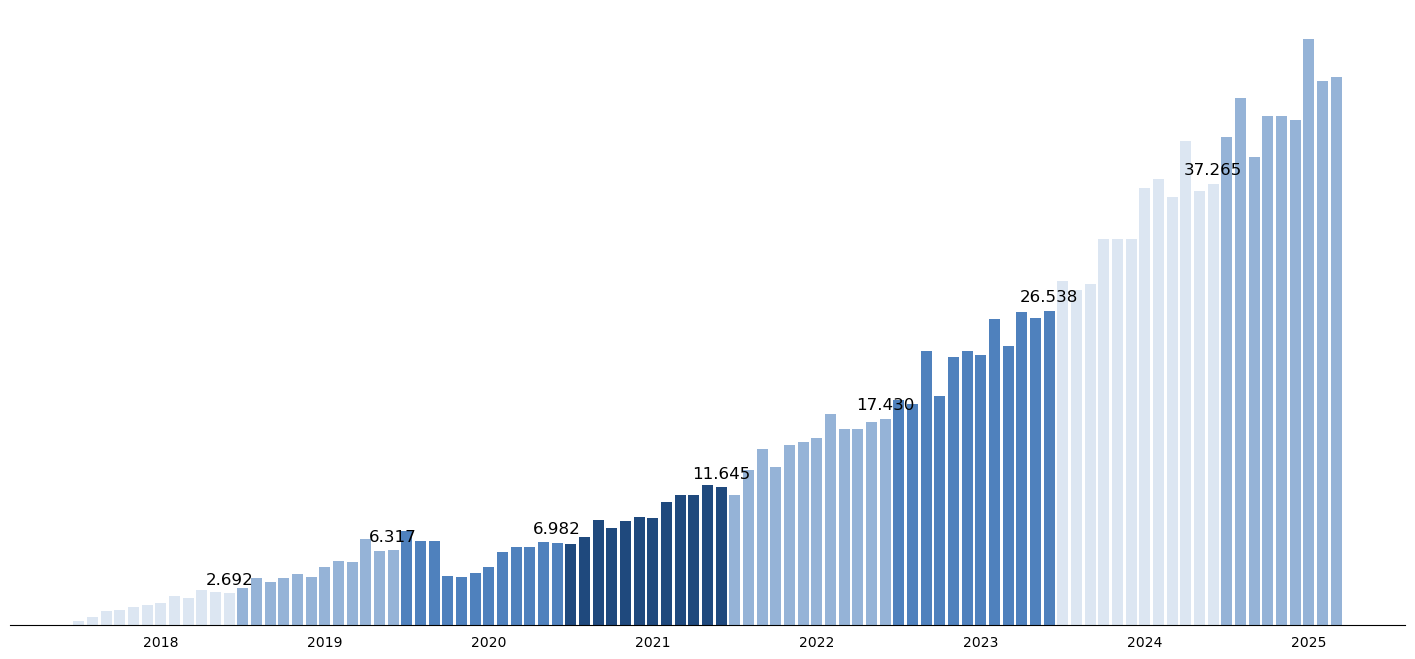

In [41]:
##Dispensas de PrEP por mês

# Remove rows with zero count
crosstab_long_disp = crosstab_long_disp[crosstab_long_disp['Count'] != 0]

# Plotting
fig, ax = plt.subplots(figsize=(18, 8))

# Colors
colors = ['#DCE6F2', '#95B3D7', '#4F81BD', '#1F497D', '#95B3D7', '#4F81BD']

for i, year in enumerate(crosstab_long_disp['Year'].unique()):
    data = crosstab_long_disp[crosstab_long_disp['Year'] == year]
    ax.bar(data['Month'] + " " + data['Year'], data['Count'], color=colors[i % len(colors)])

# Remove y-axis
ax.yaxis.set_visible(False)
ax.grid(False)

# Display numbers on top of December bars and latest month bar
december_rows = crosstab_long_disp[(crosstab_long_disp['Month'] == 'Dez')].index
for i in december_rows:
    v = crosstab_long_disp.loc[i, 'Count']
    ax.text(i, v + 500, "{:,}".format(v).replace(",", "."), color='black', ha='center', va='bottom', fontsize=12)

# Display number on top of latest month bar
latest_month_row_disp = crosstab_long_disp[
    (crosstab_long_disp['Year'] == str(hoje_dt.year)) & 
    (crosstab_long_disp['Month'] == hoje_month_abbr_pt)
].index[0]

# Set condensed year labels
years = crosstab_long_disp['Year'].unique()
year_positions = [i for i in range(6, len(crosstab_long_disp['Month'].unique()) * len(years), len(crosstab_long_disp['Month'].unique()))]
plt.xticks(year_positions, years, rotation=0)

# Remove graph border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

# Remove tick between the base of the column and the label
plt.tick_params(axis='x', which='both', bottom=False)

plt.show()
# Save the plot as a PNG image
fig.savefig("PrEP_disp.png", transparent=True, bbox_inches='tight')


In [42]:
# Primeiro, converta dt_disp para datetime, se ainda não for
Disp_semdupl['dt_disp'] = pd.to_datetime(Disp_semdupl['dt_disp'])

# Para cada codigo_paciente, marcar a linha da primeira e da última dispensa
Disp_semdupl['prim_disp'] = (Disp_semdupl['dt_disp'] == Disp_semdupl.groupby('codigo_paciente')['dt_disp'].transform('min')).astype(int)
Disp_semdupl['ult_disp'] = (Disp_semdupl['dt_disp'] == Disp_semdupl.groupby('codigo_paciente')['dt_disp'].transform('max')).astype(int)


#### Organizando as variáveis da base de dispensa

In [43]:
Disp_semdupl_filtrado = Disp_semdupl[Disp_semdupl['ano_disp'] >= 2021]
Testagem_ano =pd.crosstab(index=Disp_semdupl_filtrado['ano_disp'], columns=Disp_semdupl_filtrado['tp_testagem_hiv'], margins=True, margins_name="Total")
Testagem_ano

tp_testagem_hiv  Autoteste     Sorologia     Teste rápido    Total
ano_disp                                                          
2021                      872          2522         41770    45164
2022                     2227         16031        144919   163177
2023                     4883         26376        221782   253041
2024                     9174         37070        339104   385348
2025                    16142         33884        332696   382722
Total                   33298        115883       1080271  1229452

In [44]:
Testagem_ano =pd.crosstab(index=Disp_semdupl_filtrado['ano_disp'], columns=Disp_semdupl_filtrado['tp_testagem_hiv'], margins=False)
Testagem_ano_perc = Testagem_ano.div(Testagem_ano.sum(axis=1), axis=0) * 100
Testagem_ano_perc

tp_testagem_hiv  Autoteste     Sorologia     Teste rápido
ano_disp                                                 
2021                 1.930741      5.584094     92.485165
2022                 1.364776      9.824301     88.810923
2023                 1.929727     10.423607     87.646666
2024                 2.380705      9.619876     87.999419
2025                 4.217683      8.853424     86.928894

In [45]:
# Gestante (juntando antiga e nova).
Disp_semdupl['Gestante_disp'] = np.where((Disp_semdupl['st_gestante'].str.strip() == 'Sim') | 
                                         (Disp_semdupl['st_uso_prep_relacionado'].str.strip() == 'Gestação'), 'Sim',
                               np.where(Disp_semdupl['st_gestante'].str.strip() == 'Não se aplica', 'Não se aplica',
                                        np.where(Disp_semdupl['st_gestante'].str.strip() == 'Não', 'Não', None)))
Disp_semdupl["Gestante_disp"].value_counts()


Gestante_disp
Não se aplica    188871
Não               39431
Sim                1967
Name: count, dtype: int64

In [46]:
# Create the "Planej_reprod_disp" column using numpy.where()
Disp_semdupl['Planej_reprod_disp'] = np.where(Disp_semdupl['st_planejamento_reprodutivo'].str.strip() == 'Não', 'Não',
                                    np.where((Disp_semdupl['st_planejamento_reprodutivo'].str.strip() == 'Sim') |
                                             (Disp_semdupl['st_uso_prep_relacionado'].str.strip() == 'Planejamento reprodutivo'), 'Sim', None))
Disp_semdupl["Planej_reprod_disp"].value_counts()

Planej_reprod_disp
Não    226763
Sim      7984
Name: count, dtype: int64

In [47]:
Disp_semdupl = Disp_semdupl.rename(columns={'st_dinheiro_sexo': 'st_dinheiro_sexo_disp'})
Disp_semdupl = Disp_semdupl.rename(columns={'st_substancias_psicoativas': 'st_substancias_psicoativas_disp'})

In [48]:
Servico_ano =pd.crosstab(index=Disp_semdupl['ano_disp'], columns=Disp_semdupl['tp_servico_atendimento'], margins=False)
Servico_ano

tp_servico_atendimento  Atenção Primária     CTA  Extra-muros  \
ano_disp                                                        
2019                                   0       0            0   
2020                                   0       4            0   
2021                                1239   12900            0   
2022                                9326   45372           14   
2023                               21850   66898         1796   
2024                               40391  108067         6048   
2025                               44083  110563         3538   

tp_servico_atendimento  Serviço Especializado  \
ano_disp                                        
2019                                        1   
2020                                        8   
2021                                    26924   
2022                                    99658   
2023                                   145561   
2024                                   202876   
2025                                   210146   

tp_servico_atendimento  Serviços de atendimento privado  Teleatendimento  
ano_disp                                                                  
2019                                                  0                0  
2020                                                  0                0  
2021                                                  4                0  
2022                                               8807                0  
2023                                              16860               64  
2024                                              22136             6567  
2025                                               2328            13002

In [49]:
Disp_servico = Disp_semdupl[Disp_semdupl['tp_servico_atendimento'] == "Teleatendimento"].copy()

Servico_regiao =pd.crosstab(index=Disp_servico['ano_disp'], columns=Disp_servico['regiao_UDM'], margins=True,  margins_name='Total')
Servico_regiao

regiao_UDM  Centro-Oeste  Nordeste  Norte  Sudeste    Sul  Total
ano_disp                                                        
2023                   1         2      1       59      1     64
2024                 398        41      6     2129   3993   6567
2025                 362      1002      4     5035   6599  13002
Total                761      1045     11     7223  10593  19633

In [50]:
# Filtrar os dados para incluir apenas registros a partir de 2023
Disp_semdupl_2023_onward = Disp_semdupl[Disp_semdupl['ano_disp'] >= 2023].copy()

# Definir a ordem dos meses
month_order = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Converter 'mes_disp' para uma categoria ordenada
Disp_semdupl_2023_onward['mes_disp'] = pd.Categorical(Disp_semdupl_2023_onward['mes_disp'], categories=month_order, ordered=True)

# Criar a tabela cruzada com 'ano_disp' e 'mes_disp' em ordem
crosstab_result_tpatendimento = pd.crosstab(index=Disp_semdupl_2023_onward['tp_servico_atendimento'], 
                                            columns=[Disp_semdupl_2023_onward['ano_disp'], Disp_semdupl_2023_onward['mes_disp']], 
                                            dropna=False)

crosstab_result_tpatendimento


ano_disp                         2023                                    \
mes_disp                          Jan   Fev    Mar    Abr    Mai    Jun   
tp_servico_atendimento                                                    
NaN                              1913  1669   2310   1850   1966   1965   
Atenção Primária                 1288  1258   1674   1426   1809   1763   
CTA                              4863  4691   5606   4550   5233   5389   
Extra-muros                         1    25      0      0     80    194   
Serviço Especializado            9840  9876  11993  10271  12241  12554   
Serviços de atendimento privado  1121  1169   1596   1255   1309   1244   
Teleatendimento                     0     0      0      0      0      0   

ano_disp                                                                   \
mes_disp                           Jul    Ago    Set    Out    Nov    Dez   
tp_servico_atendimento                                                      
NaN                               2127   2074   1920   2097   2155   2033   
Atenção Primária                  1783   1978   1974   2224   2233   2440   
CTA                               5263   6254   5802   6531   6405   6311   
Extra-muros                         52    109    230    402    330    373   
Serviço Especializado            12212  13878  12297  13578  13254  13567   
Serviços de atendimento privado   1374   1557   1337   1621   1497   1780   
Teleatendimento                      0      0      2      0     28     34   

ano_disp                          2024                                     \
mes_disp                           Jan    Fev    Mar    Abr    Mai    Jun   
tp_servico_atendimento                                                      
NaN                               2417   2333   2450   2713   2456   2372   
Atenção Primária                  2673   2444   2538   2968   3014   2948   
CTA                               7496   7348   7194   8003   7815   8422   
Extra-muros                        314    375    414    509    620    578   
Serviço Especializado            14398  14224  14423  16497  16732  16341   
Serviços de atendimento privado   1734   1527   1644   1820   1828   1742   
Teleatendimento                     26     37     95    106    108    206   

ano_disp                                                                   \
mes_disp                           Jul    Ago    Set    Out    Nov    Dez   
tp_servico_atendimento                                                      
NaN                               1572   1525   1406   1471   1309   1365   
Atenção Primária                  3689   3844   3690   4470   3963   4150   
CTA                              10254  10030   9861  11307  10127  10210   
Extra-muros                        546    624    538    541    595    394   
Serviço Especializado            18173  18725  17871  19819  17781  17892   
Serviços de atendimento privado   2067   1984   1914   2120   1806   1950   
Teleatendimento                    627    951    890   1147   1070   1304   

ano_disp                          2025                                     \
mes_disp                           Jan    Fev    Mar    Abr    Mai    Jun   
tp_servico_atendimento                                                      
NaN                               1557   1226   1362   1209   1395   1230   
Atenção Primária                  4612   4836   4275   4727   4904   4577   
CTA                              12040  12253  10544  11898  12207  11701   
Extra-muros                        210    384    420    388    357    529   
Serviço Especializado            19581  24071  21655  23360  22740  23295   
Serviços de atendimento privado   1930    398      0      0      0      0   
Teleatendimento                   1296   1354   1285   1401   1367   1294   

ano_disp                                                          
mes_disp                           Jul    Ago    Set Out Nov Dez  
tp_servico_atendimento         

In [51]:
Modalidade_total = Disp_semdupl["tp_modalidade"].value_counts(dropna=False)
Disp_semdupl["tp_modalidade"].value_counts(dropna=False)


tp_modalidade
PrEP diária         965690
NaN                 533802
PrEP sob demanda     34845
Name: count, dtype: int64

In [52]:
value_counts3 = Disp_semdupl['tp_modalidade'].value_counts(dropna=True)
value_counts_percentage3 = Disp_semdupl['tp_modalidade'].value_counts(dropna=True, normalize=True) * 100

# Combine the counts and percentages into a DataFrame
Disp_modalidade_presc_total = pd.DataFrame({
    'Counts': value_counts3,
    'Percentage (%)': value_counts_percentage3
})

Disp_modalidade_presc_total['Percentage (%)'] = Disp_modalidade_presc_total['Percentage (%)'].round(2)
Disp_modalidade_presc_total

Counts  Percentage (%)
tp_modalidade                           
PrEP diária       965690           96.52
PrEP sob demanda   34845            3.48

In [53]:
# Extract the percentage and count for 'PrEP diária'
prep_diaria_percent = int(round(Disp_modalidade_presc_total.loc['PrEP diária', 'Percentage (%)']))
prep_diaria_count = Disp_modalidade_presc_total.loc['PrEP diária', 'Counts']

# Extract the percentage and count for 'PrEP sob demanda'
prep_demand_percent = int(round(Disp_modalidade_presc_total.loc['PrEP sob demanda', 'Percentage (%)']))
prep_demand_count = Disp_modalidade_presc_total.loc['PrEP sob demanda', 'Counts']

# Format the counts with dots as the thousand separators
prep_diaria_count_formatted = "{:,}".format(prep_diaria_count).replace(',', '.')
prep_demand_count_formatted = "{:,}".format(prep_demand_count).replace(',', '.')

# Construct the desired text strings
text_prep_diaria = f"{prep_diaria_percent}% ({prep_diaria_count_formatted}) das dispensações foram para PrEP diária"
text_prep_demanda = f"{prep_demand_percent}% ({prep_demand_count_formatted}) das dispensações foram para PrEP sob demanda"

print(text_prep_diaria)
print(text_prep_demanda)


97% (965.690) das dispensações foram para PrEP diária
3% (34.845) das dispensações foram para PrEP sob demanda


In [54]:
## Número de dispensas para cada modalidade de PrEP

# Filter the data to include only records from 2022 onward
Disp_semdupl_2022_onward = Disp_semdupl[Disp_semdupl['ano_disp'] >= 2022]

# Creating a crosstab with 'ano_disp' and 'mes_disp'
Disp_modalidade_presc = pd.crosstab(index=Disp_semdupl_2022_onward['tp_modalidade'], 
                                   columns=[Disp_semdupl_2022_onward['ano_disp'], Disp_semdupl_2022_onward['mes_disp']], 
                                   dropna=False)

# Reordering columns based on the defined month order
month_year_order_2022 = [(year, month) for year in Disp_semdupl_2022_onward['ano_disp'].sort_values().unique() for month in months_order]
existing_columns_2022 = [col for col in month_year_order_2022 if col in Disp_modalidade_presc.columns]
Disp_modalidade_presc = Disp_modalidade_presc[existing_columns_2022]

# Calculating margins
Disp_modalidade_presc['Total'] = Disp_modalidade_presc.sum(axis=1)
Disp_modalidade_presc.loc['Total'] = Disp_modalidade_presc.sum(axis=0)

Disp_modalidade_presc


ano_disp           2022                                                   \
mes_disp            Jan    Fev    Mar    Abr    Mai    Jun    Jul    Ago   
tp_modalidade                                                              
PrEP diária           0      1      1      1      2      3      1      5   
PrEP sob demanda      0      0      0      0      0      0      0      0   
NaN               10962  13111  14872  13316  15231  15440  15756  17788   
Total             10962  13112  14873  13317  15233  15443  15757  17793   

ano_disp                                       2023                       \
mes_disp            Set    Out    Nov    Dez    Jan    Fev    Mar    Abr   
tp_modalidade                                                              
PrEP diária           8     21     40     35    143  12205  20455  17156   
PrEP sob demanda      0      0      0      0      0    270    414    346   
NaN               16586  16523  17082  17395  18883   6213   2310   1850   
Total             16594  16544  17122  17430  19026  18688  23179  19352   

ano_disp                                                                  \
mes_disp            Mai    Jun    Jul    Ago    Set    Out    Nov    Dez   
tp_modalidade                                                              
PrEP diária       20289  20592  20137  23182  21083  23694  23123  23825   
PrEP sob demanda    383    552    547    594    559    662    624    679   
NaN                1966   1965   2127   2074   1920   2097   2155   2034   
Total             22638  23109  22811  25850  23562  26453  25902  26538   

ano_disp           2024                                                   \
mes_disp            Jan    Fev    Mar    Abr    Mai    Jun    Jul    Ago   
tp_modalidade                                                              
PrEP diária       25810  25190  25552  28965  29073  29129  33956  34765   
PrEP sob demanda    831    765    756    938    978    986   1267   1273   
NaN                2417   2333   2450   2713   2522   2494   1705   1645   
Total             29058  28288  28758  32616  32573  32609  36928  37683   

ano_disp                                       2025                       \
mes_disp            Set    Out    Nov    Dez    Jan    Fev    Mar    Abr   
tp_modalidade                                                              
PrEP diária       33352  37786  34037  34535  38025  41597  36595  40059   
PrEP sob demanda   1296   1500   1190   1269   1543   1668   1584   1715   
NaN                1522   1589   1424   1461   1658   1257   1362   1209   
Total             36170  40875  36651  37265  41226  44522  39541  42983   

ano_disp                                                           Total  
mes_disp            Mai    Jun    Jul    Ago    Set Out Nov Dez           
tp_modalidade                                                             
PrEP diária       39701  39627  45966  42886  43071   0   0   0   965679  
PrEP sob demanda   1875   1771   2081   1959   1970   0   0   0    34845  
NaN                1394   1228   1444   1058   1253   0   0   0   265794  
Total             42970  42626  49491  45903  46294   0   0   0  1266318

In [55]:
## Porcentagem de dispensas para cada modalidade de PrEP

# Create a crosstab with 'ano_disp' and 'mes_disp' without margins
crosstab_result_no_margins_2022 = pd.crosstab(index=Disp_semdupl_2022_onward['tp_modalidade'], 
                                              columns=[Disp_semdupl_2022_onward['ano_disp'], Disp_semdupl_2022_onward['mes_disp']], 
                                              dropna=False)

# Reordering columns based on the defined month order
crosstab_result_no_margins_2022 = crosstab_result_no_margins_2022[existing_columns_2022]

# Calculate the total for each month
month_totals_2022 = crosstab_result_no_margins_2022.sum()

# Divide each cell by the corresponding month's total and multiply by 100 to get percentage
Disp_modalidade_presc2 = crosstab_result_no_margins_2022.divide(month_totals_2022) * 100

# Format the result to show two decimal places
Disp_modalidade_presc2 = Disp_modalidade_presc2.map(lambda x: f"{x:.1f}%")

# Adding a 'Total' row with 100% for each month
Disp_modalidade_presc2.loc['Total'] = ['100.00%' for _ in range(len(Disp_modalidade_presc2.columns))]

Disp_modalidade_presc2


ano_disp             2022                                               \
mes_disp              Jan      Fev      Mar      Abr      Mai      Jun   
tp_modalidade                                                            
PrEP diária          0.0%     0.0%     0.0%     0.0%     0.0%     0.0%   
PrEP sob demanda     0.0%     0.0%     0.0%     0.0%     0.0%     0.0%   
NaN                100.0%   100.0%   100.0%   100.0%   100.0%   100.0%   
Total             100.00%  100.00%  100.00%  100.00%  100.00%  100.00%   

ano_disp                                                                \
mes_disp              Jul      Ago      Set      Out      Nov      Dez   
tp_modalidade                                                            
PrEP diária          0.0%     0.0%     0.0%     0.1%     0.2%     0.2%   
PrEP sob demanda     0.0%     0.0%     0.0%     0.0%     0.0%     0.0%   
NaN                100.0%   100.0%   100.0%    99.9%    99.8%    99.8%   
Total             100.00%  100.00%  100.00%  100.00%  100.00%  100.00%   

ano_disp             2023                                               \
mes_disp              Jan      Fev      Mar      Abr      Mai      Jun   
tp_modalidade                                                            
PrEP diária          0.8%    65.3%    88.2%    88.7%    89.6%    89.1%   
PrEP sob demanda     0.0%     1.4%     1.8%     1.8%     1.7%     2.4%   
NaN                 99.2%    33.2%    10.0%     9.6%     8.7%     8.5%   
Total             100.00%  100.00%  100.00%  100.00%  100.00%  100.00%   

ano_disp                                                                \
mes_disp              Jul      Ago      Set      Out      Nov      Dez   
tp_modalidade                                                            
PrEP diária         88.3%    89.7%    89.5%    89.6%    89.3%    89.8%   
PrEP sob demanda     2.4%     2.3%     2.4%     2.5%     2.4%     2.6%   
NaN                  9.3%     8.0%     8.1%     7.9%     8.3%     7.7%   
Total             100.00%  100.00%  100.00%  100.00%  100.00%  100.00%   

ano_disp             2024                                               \
mes_disp              Jan      Fev      Mar      Abr      Mai      Jun   
tp_modalidade                                                            
PrEP diária         88.8%    89.0%    88.9%    88.8%    89.3%    89.3%   
PrEP sob demanda     2.9%     2.7%     2.6%     2.9%     3.0%     3.0%   
NaN                  8.3%     8.2%     8.5%     8.3%     7.7%     7.6%   
Total             100.00%  100.00%  100.00%  100.00%  100.00%  100.00%   

ano_disp                                                                \
mes_disp              Jul      Ago      Set      Out      Nov      Dez   
tp_modalidade                                                            
PrEP diária         92.0%    92.3%    92.2%    92.4%    92.9%    92.7%   
PrEP sob demanda     3.4%     3.4%     3.6%     3.7%     3.2%     3.4%   
NaN                  4.6%     4.4%     4.2%     3.9%     3.9%     3.9%   
Total             100.00%  100.00%  100.00%  100.00%  100.00%  100.00%   

ano_disp             2025                                               \
mes_disp              Jan      Fev      Mar      Abr      Mai      Jun   
tp_modalidade                                                            
PrEP diária         92.2%    93.4%    92.5%    93.2%    92.4%    93.0%   
PrEP sob demanda     3.7%     3.7%     4.0%     4.0%     4.4%     4.2%   
NaN                  4.0%     2.8%     3.4%     2.8%     3.2%     2.9%   
Total             100.00%  100.00%  100.00%  100.00%  100.00%  100.00%   

ano_disp                                                                
mes_disp              Jul      Ago      Set      Out      Nov      Dez  
tp_modalidade                                                           
PrEP diária         92.9%    93.4%    93.0%     nan%     nan%     nan%  
PrEP sob demanda     4.2%     4.3%     4.3%     nan%     nan%     nan%  
Na

In [56]:
#Colocando na mesma linha tp_modalidade da dispensa anterior.
#tp_modalidade = Modalidade prescrita na dispensação (PrEP diária ou PrEP sob demanda)

# Sort the dataframe based on 'codigo_pac_eleito' and 'dt_disp'
Disp_semdupl.sort_values(by=['codigo_pac_eleito', 'dt_disp'], inplace=True)

# Create a new column 'esquema_disp_anterior' by shifting 'tp_esquema_prep' within each 'codigo_pac_eleito' group
Disp_semdupl['esquema_prescrito_disp_anterior'] = Disp_semdupl.groupby('codigo_pac_eleito')['tp_modalidade'].shift()

# For the minimum 'dt_disp' within each 'codigo_pac_eleito' group, replace NaN in 'esquema_disp_anterior' with 'primeira dispensa'
Disp_semdupl.loc[Disp_semdupl.groupby('codigo_pac_eleito')['dt_disp'].idxmin(), 'esquema_prescrito_disp_anterior'] = 'primeira dispensa'

value_counts = Disp_semdupl['esquema_prescrito_disp_anterior'].value_counts(dropna=False)
value_counts

esquema_prescrito_disp_anterior
PrEP diária          719167
NaN                  494756
primeira dispensa    300207
PrEP sob demanda      20207
Name: count, dtype: int64

In [57]:
# esquema_prescrito_disp_anterior = o que foi prescrito na dispensa anterior
# tp_esquema_prep = Desde a última dispensa, em média, como você tomou a PrEP
Crosstab_modalidade=pd.crosstab(index=Disp_semdupl['esquema_prescrito_disp_anterior'], columns=Disp_semdupl['tp_esquema_prep'], margins=True, margins_name="Total")
pd.crosstab(index=Disp_semdupl['tp_esquema_prep'], columns=Disp_semdupl['esquema_prescrito_disp_anterior'], margins=True, margins_name="Total")

esquema_prescrito_disp_anterior  PrEP diária  PrEP sob demanda  \
tp_esquema_prep                                                  
Ambos                                   1247               240   
Esquema diário                        679844              9921   
Esquema sob demanda                    13006              8847   
Eu não tomei                           23197              1148   
Total                                 717294             20156   

esquema_prescrito_disp_anterior  primeira dispensa   Total  
tp_esquema_prep                                             
Ambos                                          131    1618  
Esquema diário                              104087  793852  
Esquema sob demanda                           4818   26671  
Eu não tomei                                 85507  109852  
Total                                       194543  931993

In [58]:
# Create a new column 'recomendadoXrealizado' based on the conditions provided
conditions = [
    (Disp_semdupl['esquema_prescrito_disp_anterior'] == 'PrEP diária') & (Disp_semdupl['tp_esquema_prep'] == 'Esquema diário'),
    (Disp_semdupl['esquema_prescrito_disp_anterior'] == 'PrEP sob demanda') & (Disp_semdupl['tp_esquema_prep'] == 'Esquema sob demanda'),
    (Disp_semdupl['esquema_prescrito_disp_anterior'] == 'PrEP diária') & (Disp_semdupl['tp_esquema_prep'] == 'Ambos'),
    (Disp_semdupl['esquema_prescrito_disp_anterior'] == 'PrEP sob demanda') & (Disp_semdupl['tp_esquema_prep'] == 'Ambos'),
    (Disp_semdupl['esquema_prescrito_disp_anterior'] == 'PrEP diária') & (Disp_semdupl['tp_esquema_prep'] == 'Eu não tomei'),
    (Disp_semdupl['esquema_prescrito_disp_anterior'] == 'PrEP sob demanda') & (Disp_semdupl['tp_esquema_prep'] == 'Eu não tomei'),
    (Disp_semdupl['esquema_prescrito_disp_anterior'] == 'PrEP diária') & (Disp_semdupl['tp_esquema_prep'] == 'Esquema sob demanda'),
    (Disp_semdupl['esquema_prescrito_disp_anterior'] == 'PrEP sob demanda') & (Disp_semdupl['tp_esquema_prep'] == 'Esquema diário')
]

choices = [
    'Prescrição diária,tomou de acordo',
    'Prescrição sob demanda,tomou de acordo',
    'Ambos (misturou modalidades)',
    'Ambos (misturou modalidades)',
    'Não tomou',
    'Não tomou',
    'Prescrição diária, tomou sob demanda',
    'Prescrição sob demanda, tomou diária'
]

# Update the conditions and choices to set 'recomendadoXrealizado' using np.select
Disp_semdupl['recomendadoXrealizado'] = np.select(conditions, choices, default='nan')
# Replace the string 'nan' with np.nan
Disp_semdupl['recomendadoXrealizado'] = Disp_semdupl['recomendadoXrealizado'].replace('nan', np.nan)

# Set 'recomendadoXrealizado' to "primeira dispensa" where 'esquema_prescrito_disp_anterior' is "primeira dispensa"
Disp_semdupl.loc[Disp_semdupl['esquema_prescrito_disp_anterior'] == 'primeira dispensa', 'recomendadoXrealizado'] = 'primeira dispensa'

value_counts = Disp_semdupl['recomendadoXrealizado'].value_counts(dropna=False)
value_counts

recomendadoXrealizado
Prescrição diária,tomou de acordo         679844
NaN                                       496680
primeira dispensa                         300207
Não tomou                                  24345
Prescrição diária, tomou sob demanda       13006
Prescrição sob demanda, tomou diária        9921
Prescrição sob demanda,tomou de acordo      8847
Ambos (misturou modalidades)                1487
Name: count, dtype: int64

In [59]:
# Calculate value counts with normalization (percentage), excluding NaN
value_counts_percentage = Disp_semdupl['recomendadoXrealizado'].value_counts(normalize=True, dropna=True) * 100

# Format the result to show two decimal places
value_counts_percentage = value_counts_percentage.apply(lambda x: f"{x:.2f}%")
value_counts_percentage

recomendadoXrealizado
Prescrição diária,tomou de acordo         65.52%
primeira dispensa                         28.93%
Não tomou                                  2.35%
Prescrição diária, tomou sob demanda       1.25%
Prescrição sob demanda, tomou diária       0.96%
Prescrição sob demanda,tomou de acordo     0.85%
Ambos (misturou modalidades)               0.14%
Name: proportion, dtype: object

In [60]:
# Filter out rows where 'recomendadoXrealizado' is 'primeira dispensa'
filtered_data = Disp_semdupl[Disp_semdupl['recomendadoXrealizado'] != 'primeira dispensa']

# Calculate the value counts and percentages on the filtered data
value_counts2 = filtered_data['recomendadoXrealizado'].value_counts(dropna=True)
value_counts_percentage2 = filtered_data['recomendadoXrealizado'].value_counts(dropna=True, normalize=True) * 100

# Combine the counts and percentages into a DataFrame
recomendadoXrealizado_tab = pd.DataFrame({
    'Counts': value_counts2,
    'Percentage (%)': value_counts_percentage2
})

recomendadoXrealizado_tab['Percentage (%)'] = recomendadoXrealizado_tab['Percentage (%)'].round(2)

recomendadoXrealizado_tab


Counts  Percentage (%)
recomendadoXrealizado                                         
Prescrição diária,tomou de acordo       679844           92.19
Não tomou                                24345            3.30
Prescrição diária, tomou sob demanda     13006            1.76
Prescrição sob demanda, tomou diária      9921            1.35
Prescrição sob demanda,tomou de acordo    8847            1.20
Ambos (misturou modalidades)              1487            0.20

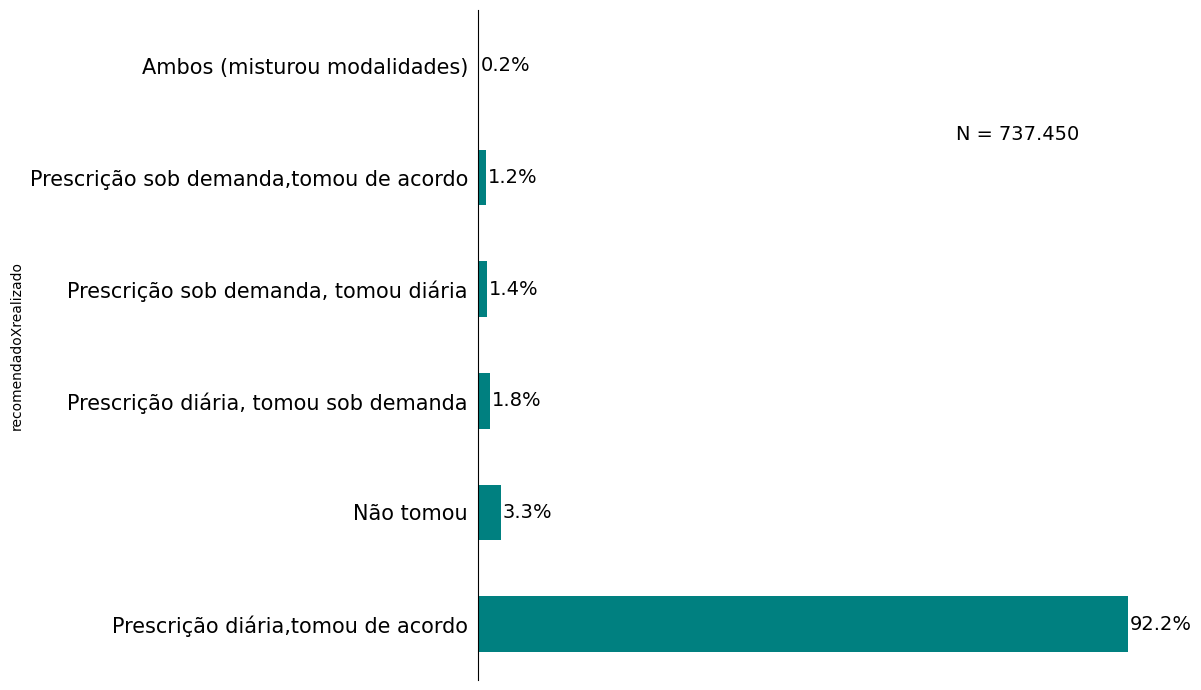

In [61]:
# Filter out rows where 'recomendadoXrealizado' is 'primeira dispensa'
filtered_data = Disp_semdupl[Disp_semdupl['recomendadoXrealizado'] != 'primeira dispensa']

# Recalculating the value counts and percentages on the filtered data
value_counts2 = filtered_data['recomendadoXrealizado'].value_counts(dropna=True)
value_counts_percentage2 = filtered_data['recomendadoXrealizado'].value_counts(dropna=True, normalize=True) * 100

# Combine the counts and percentages into a DataFrame
recomendadoXrealizado_tab = pd.DataFrame({
    'Counts': value_counts2,
    'Percentage (%)': value_counts_percentage2
})

recomendadoXrealizado_tab['Percentage (%)'] = recomendadoXrealizado_tab['Percentage (%)'].round(2)

# Plotting the chart in ascending order with the percentages annotated
ax = recomendadoXrealizado_tab['Percentage (%)'].sort_values(ascending=False).plot(kind='barh', figsize=(12,7), color='teal')

# Annotating each bar with the percentage
for i, v in enumerate(recomendadoXrealizado_tab['Percentage (%)'].sort_values(ascending=False)):
    ax.text(v + 0.2, i, f"{v:.1f}%", va='center', color='black', fontsize=14)

    # Calculate total count
total_count = recomendadoXrealizado_tab['Counts'].sum()

formatted_number = "{:,}".format(total_count).replace(',', '.')

# Add the total count as a text annotation with thousands separator
ax.text(0.7, 0.8, f"N = {formatted_number}", transform=ax.transAxes, fontsize=14, va='bottom', ha='left', color='black')
 
# Remove the horizontal grid lines
ax.grid(False)
# Remove the x-axis tick labels
ax.set_xticklabels([])
# Remove the x axis labels
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=15)

# Remove tick between the base of the column and the label
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

# Remove graph border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)


plt.tight_layout()
plt.show()


# Save the plot as a PNG image
ax.get_figure().savefig(f"PrEP_modalidades.png")

In [62]:
Disp_semdupl = Disp_semdupl.rename(columns={'st_pub_priv': 'Publico_privado_disp'})
Disp_semdupl["Publico_privado_disp"].value_counts()

Publico_privado_disp
Público            1128054
Privado             102591
Extra-muros            199
Name: count, dtype: int64

In [63]:
# Substitui os valores NaN por "Público" na coluna 'Publico_privado_disp'
Disp_semdupl['Publico_privado_disp'] = Disp_semdupl['Publico_privado_disp'].str.strip()
Disp_semdupl['Publico_privado_disp'] = Disp_semdupl['Publico_privado_disp'].fillna('Público')
Disp_semdupl["Publico_privado_disp"].value_counts()

Publico_privado_disp
Público        1431547
Privado         102591
Extra-muros        199
Name: count, dtype: int64

In [64]:
publicoPrivado_disp_tab = pd.crosstab(index=Disp_semdupl['Publico_privado_disp'], 
                              columns=Disp_semdupl['ano_disp'])
publicoPrivado_disp_tab

ano_disp               2018   2019   2020    2021    2022    2023    2024  \
Publico_privado_disp                                                        
Extra-muros               0      0      0       0      72     127       0   
Privado                   0      0      0    2113   15352   25836   33171   
Público               21965  58676  73150  112115  168756  251145  376303   

ano_disp                2025  
Publico_privado_disp          
Extra-muros                0  
Privado                26119  
Público               369437

In [65]:
Disp_semdupl['tp_profissional'] = Disp_semdupl['tp_profissional'].str.strip()

profissional_disp_tab = pd.crosstab(index=Disp_semdupl['tp_profissional'], 
                              columns=Disp_semdupl['ano_disp'])
profissional_disp_tab

ano_disp            2018   2019   2020   2021    2022    2023    2024    2025
tp_profissional                                                              
Dentista               0      0    132    947    1630    2672    3118    2267
Enfermeiro             3      4   4056  19867   52393   91999  156378  165151
Farmacêutico           0      0    165    987    1721    6315   24283   26200
Itercambista(rms)      0      0     16     27       5       1     904     970
Médico             21962  58672  68781  92400  128431  176121  224791  200968

In [66]:
profissional_disp_tab2 = pd.crosstab(
    index=Disp_semdupl['tp_profissional'], 
    columns=Disp_semdupl['nu_dias_fornecimento'], 
    margins=True,  # Inclui os totais
    margins_name="Total"  # Nomeia os totais como "Total"
)

profissional_disp_tab2


nu_dias_fornecimento    30.0   60.0    90.0   120.0  180.0    Total
tp_profissional                                                    
Dentista                4193    866    1100    3815     46    10020
Enfermeiro            162595  24452   59867  172703   1668   421285
Farmacêutico           26635   2559    4587   20615    245    54641
Itercambista(rms)        588    135     217     631     11     1582
Médico                176375  50996   98735  361814   3658   691578
Total                 370386  79008  164506  559578   5628  1179106

In [67]:
disp_farmaceutico = Disp_semdupl[Disp_semdupl['tp_profissional'] == "Farmacêutico"]

contagem_por_ano = (
    disp_farmaceutico.groupby(['tp_profissional', 'ano_disp'])
    .agg(
        prescrições=('numero_solicitacao', 'nunique'),  
        dispensações=('codigo_pac_eleito', 'count'),  
        usuários=('codigo_pac_eleito', 'nunique')  
        
    )
    .reset_index()
)

contagem_por_ano


tp_profissional  ano_disp  prescrições  dispensações  usuários
0    Farmacêutico      2020          165           165       154
1    Farmacêutico      2021          958           987       820
2    Farmacêutico      2022         1698          1721      1467
3    Farmacêutico      2023         6037          6315      4926
4    Farmacêutico      2024        22280         24283     16940
5    Farmacêutico      2025        23911         26200     19378

In [68]:
# Autorrelato de IST

# List of columns to check for the value 1
ist_cols = ['st_ferida_vagina_penis', 'st_ferida_anus', 'st_verruga_vagina_penis', 'st_verruga_anus','st_bolhas_vagina_penis',  
            'st_bolhas_anus', 'st_corrimento_vaginal', 'st_sifilis', 'st_suspeita_mpox', 'st_diagnost_mpox','st_gonorreia_clamidia']

# Create the new column using numpy.where()
Disp_semdupl['IST_autorrelato'] = np.where(Disp_semdupl['st_nao'] == 1, 'Nenhuma IST autorrelatada', 
                                 np.where(Disp_semdupl[ist_cols].sum(axis=1) >= 1, 'Alguma IST autorrelatada', None))

Disp_semdupl["IST_autorrelato"].value_counts()

IST_autorrelato
Nenhuma IST autorrelatada    905110
Alguma IST autorrelatada      34029
Name: count, dtype: int64

In [69]:
IST_ano = pd.crosstab(index=Disp_semdupl['ano_disp'], columns=Disp_semdupl['IST_autorrelato'], margins=True)
IST_ano

IST_autorrelato  Alguma IST autorrelatada  Nenhuma IST autorrelatada     All
ano_disp                                                                    
2020                                    0                          3       3
2021                                    0                          8       8
2022                                    0                         66      66
2023                                 6507                     163023  169530
2024                                14925                     370850  385775
2025                                12597                     371160  383757
All                                 34029                     905110  939139

In [70]:
IST_prim = pd.crosstab(index=Disp_semdupl['prim_disp'], columns=Disp_semdupl['IST_autorrelato'], margins=True)
IST_prim

IST_autorrelato  Alguma IST autorrelatada  Nenhuma IST autorrelatada     All
prim_disp                                                                   
0                                   24961                     731921  756882
1                                    9068                     173189  182257
All                                 34029                     905110  939139

In [71]:
IST_ult = pd.crosstab(index=Disp_semdupl['ult_disp'], columns=Disp_semdupl['IST_autorrelato'], margins=True)
IST_ult

IST_autorrelato  Alguma IST autorrelatada  Nenhuma IST autorrelatada     All
ult_disp                                                                    
0                                   24555                     658354  682909
1                                    9474                     246756  256230
All                                 34029                     905110  939139

In [72]:
# Calculate the denominator for the percentages
denominator = Disp_semdupl["IST_autorrelato"].notna().sum()

# Calculate the counts for each category
category_counts_IST = Disp_semdupl['IST_autorrelato'].value_counts().sort_values(ascending=True)
# Calculate the percentage for each category in the subset
category_percentage_IST = Disp_semdupl['IST_autorrelato'].value_counts(normalize=True) * 100

# Get the category with the highest percentage
highest_category_IST = category_percentage_IST.idxmax()

# Get the percentage and count for the highest category
highest_percentage_IST = category_percentage_IST[highest_category_IST]
highest_count_IST = category_counts_IST[highest_category_IST]

# Format 'highest_count' first and replace the comma with a dot
formatted_highest_count_IST = f"{highest_count_IST:,.0f}".replace(',', '.')
denominator_IST = f"{denominator:,.0f}".replace(',', '.')

# Create the text
text_IST = f"Das {denominator_IST} pessoas com informação preenchida, {highest_percentage_IST:.0f}% ({formatted_highest_count_IST}) não tinham {highest_category_IST}."

print (text_IST)

Das 939.139 pessoas com informação preenchida, 96% (905.110) não tinham Nenhuma IST autorrelatada.


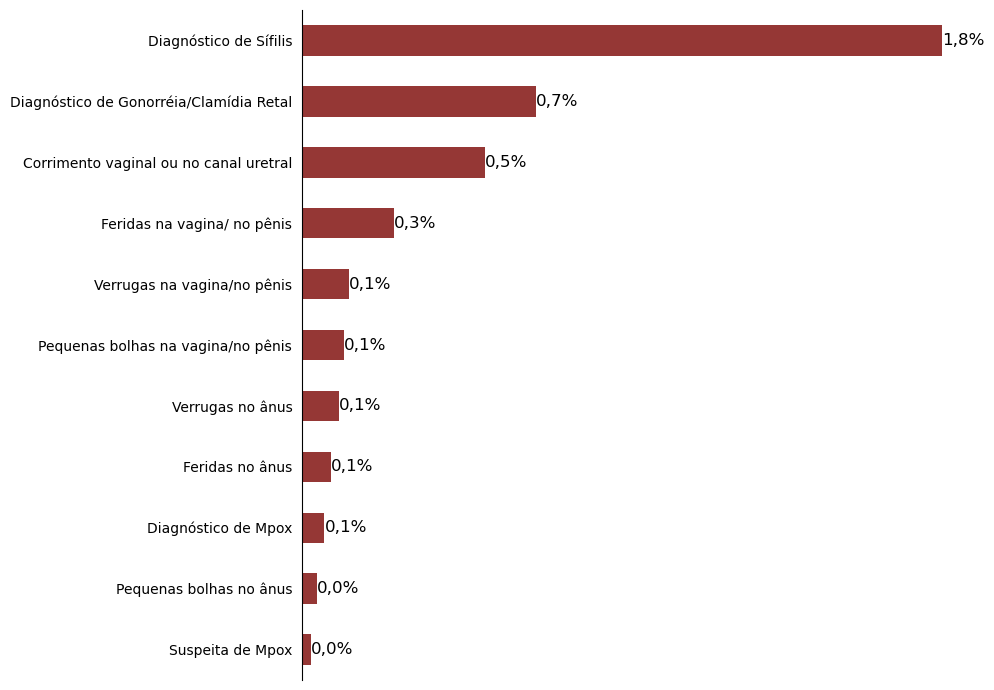

In [73]:
# Define a dictionary to map the old names to the new names
name_mapping = {
    'st_ferida_vagina_penis': 'Feridas na vagina/ no pênis',
    'st_ferida_anus': 'Feridas no ânus',
    'st_verruga_vagina_penis': 'Verrugas na vagina/no pênis',
    'st_verruga_anus': 'Verrugas no ânus',
    'st_bolhas_vagina_penis': 'Pequenas bolhas na vagina/no pênis',
    'st_bolhas_anus': 'Pequenas bolhas no ânus',
    'st_corrimento_vaginal': 'Corrimento vaginal ou no canal uretral',
    'st_sifilis': 'Diagnóstico de Sífilis',
    'st_gonorreia_clamidia': 'Diagnóstico de Gonorréia/Clamídia Retal',
    'st_suspeita_mpox': 'Suspeita de Mpox',
    'st_diagnost_mpox' : 'Diagnóstico de Mpox'
}

# Calculate the sums for each column
column_sums = Disp_semdupl[list(name_mapping.keys())].sum()

# Calculate the denominator for the percentages
denominator = Disp_semdupl["IST_autorrelato"].notna().sum()

# Rename the index of column_sums using the name_mapping
column_sums = column_sums.rename(index=name_mapping)

# Plot the sums as a horizontal bar chart
ax = column_sums.sort_values().plot(kind='barh', figsize=(10,7), color='#953735')

# Annotate each bar with the percentage
for i, v in enumerate(column_sums.sort_values()):
    porcentagem = f"{v / denominator:.1%}".replace(".", ",")
    ax.text(v + 0.2, i, porcentagem, va='center', color='black', fontsize=12)

# Remove the horizontal grid lines
ax.grid(False)
# Remove the x-axis tick labels
ax.set_xticklabels([])
# Remove the y and x axis labels
ax.set_ylabel('')
ax.set_xlabel('')

# Remove tick between the base of the column and the label
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

# Remove graph border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

    
# Display the plot
plt.tight_layout()
plt.show()

# Save the plot as a PNG image
ax.get_figure().savefig(f"PrEP_IST.png")


In [74]:
# Calcula o tempo da duração + 40%.
Disp_semdupl['tempo_para_pegar_disp'] = Disp_semdupl['duracao_sum']*1.4

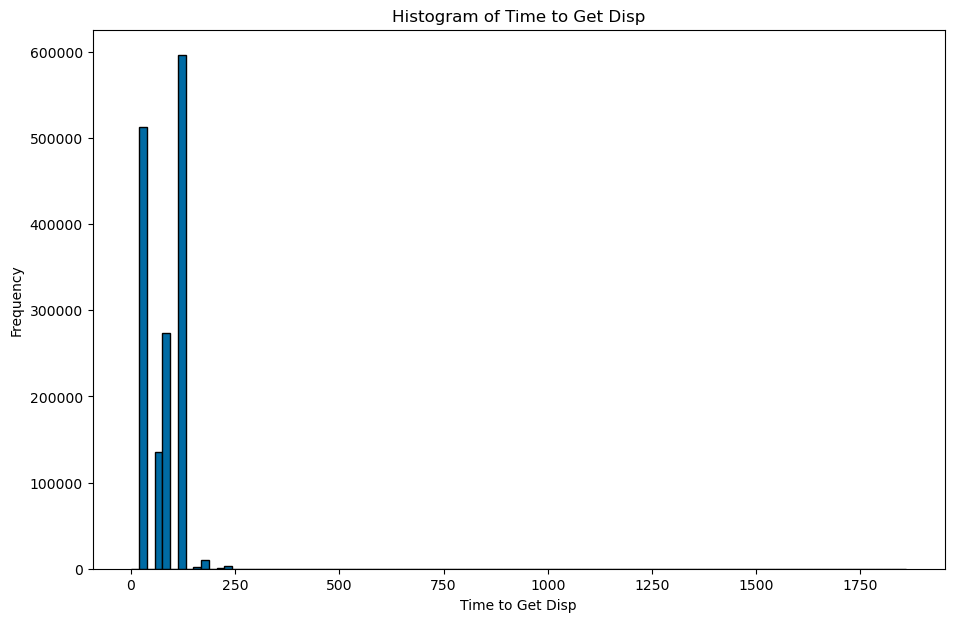

In [75]:
# Select the variable you want to plot
data_to_plot = Disp_semdupl['duracao_sum']

# Plot the histogram
plt.hist(data_to_plot, bins=100, edgecolor='black')  # You can adjust the number of bins as needed

# Add labels and title
plt.xlabel('Time to Get Disp')
plt.ylabel('Frequency')
plt.title('Histogram of Time to Get Disp')

# Get the minimum and maximum values of the data
xmin, xmax = np.min(data_to_plot), np.max(data_to_plot)
# Gap size
ticks = np.arange(xmin, xmax, 10)

# Show the plot
plt.show()

In [76]:
# Cria a coluna com a data da dispensa seguinte
Disp_semdupl.sort_values(by = ['codigo_pac_eleito',"dt_disp"], inplace = True, ascending = [True,False])
Disp_semdupl.reset_index(drop = True, inplace = True)
Disp_semdupl['dt_disp_seguinte'] = Disp_semdupl.groupby('codigo_pac_eleito')['dt_disp'].shift(1)

In [77]:
# Cria colunas com a primeira e última dispensas da vida e de cada ano
Disp_semdupl["dt_disp_min"] = Disp_semdupl["codigo_pac_eleito"].map(Disp_semdupl.groupby(["codigo_pac_eleito"])["dt_disp"].min())
Disp_semdupl["dt_disp_max"] = Disp_semdupl["codigo_pac_eleito"].map(Disp_semdupl.groupby(["codigo_pac_eleito"])["dt_disp"].max())

for seq_ano in range(2018, ano + 1):
    Disp_semdupl[f"dt_disp_min_{seq_ano}"] = Disp_semdupl["codigo_pac_eleito"].map(Disp_semdupl[Disp_semdupl["ano_disp"] == seq_ano].groupby(["codigo_pac_eleito"])["dt_disp"].min())
    Disp_semdupl[f"dt_disp_max_{seq_ano}"] = Disp_semdupl["codigo_pac_eleito"].map(Disp_semdupl[Disp_semdupl["ano_disp"] == seq_ano].groupby(["codigo_pac_eleito"])["dt_disp"].max())

In [78]:
# Cria as colunas do mes_pri_disp, mes_ult_disp, ano_pri_disp, ano_ult_disp
Disp_semdupl['ano_pri_disp']= Disp_semdupl['dt_disp_min'].dt.year
Disp_semdupl['mesN_pri_disp']= Disp_semdupl['dt_disp_min'].dt.month
Disp_semdupl['mes_pri_disp']= Disp_semdupl['dt_disp_min'].dt.month_name().str[:3]

Disp_semdupl['ano_ult_disp']= Disp_semdupl['dt_disp_max'].dt.year
Disp_semdupl['mesN_ult_disp']= Disp_semdupl['dt_disp_max'].dt.month
Disp_semdupl['mes_ult_disp']= Disp_semdupl['dt_disp_max'].dt.month_name().str[:3]

In [79]:
Disp_semdupl['ano_pri_disp'].value_counts().sort_index()

ano_pri_disp
2018    118390
2019    148993
2020    129451
2021    192890
2022    252686
2023    284759
2024    273946
2025    133222
Name: count, dtype: int64

In [80]:
# Convert the "dt_disp" column to a datetime format
Disp_semdupl['dt_disp'] = pd.to_datetime(Disp_semdupl['dt_disp'], dayfirst=True)

# Create a new column "valid_until" that represents the date until which each dispensation is valid
Disp_semdupl['valid_until'] = Disp_semdupl['dt_disp'] + pd.to_timedelta(Disp_semdupl['duracao_sum'] * 1.4, unit='D')

# Initialize an empty DataFrame to hold the results
EmPrEP_monthly_sample = pd.DataFrame(columns=['Year', 'Month', 'Em PrEP', 'Descontinuados'])

# For each month from January 2018 to final DataBase
for year in range(2018, ano + 1):
    for month in range(1, 13):

        # Define the start and end of the period
        last_day = pd.Timestamp(year=year, month=month, day=1) + pd.offsets.MonthEnd(0)  # Get the last day of the current month
        start_date = last_day - pd.offsets.DateOffset(years=1)  # One year before
        end_date = last_day
        
        # Filter the data to consider only dispensations that happened in the past 12 months
        past_year_dispensations = Disp_semdupl[(Disp_semdupl['dt_disp'] > start_date) & (Disp_semdupl['dt_disp'] <= end_date)].copy()
        past_year_dispensations.sort_values(by="dt_disp", ascending=False, inplace=True)
        past_year_dispensations = past_year_dispensations.drop_duplicates(['codigo_pac_eleito'], keep="first").copy()
        
        # Check if the 'valid_until' date is later than the end of the month
        valid_dispensations = past_year_dispensations[past_year_dispensations['valid_until'] >= end_date].copy()

        # Se a data for depois da database, salva o Em PrEP Atual 
        if year == ano and month == int(mes):
            past_year_dispensations["Disp_Ultimos_12m"] = 'Teve dispensação nos últimos 12 meses'
            valid_dispensations["EmPrEP_Atual"] = "Em PrEP atualmente"
            Disp_semdupl = pd.merge(Disp_semdupl, past_year_dispensations[["codigo_pac_eleito","Disp_Ultimos_12m"]], on="codigo_pac_eleito", how="left").copy()
            Disp_semdupl = pd.merge(Disp_semdupl, valid_dispensations[["codigo_pac_eleito","EmPrEP_Atual"]], on="codigo_pac_eleito", how="left").copy()
            Disp_semdupl["Disp_Ultimos_12m"] = Disp_semdupl["Disp_Ultimos_12m"].fillna("Não teve dispensação nos últimos 12 meses")
            
            # Salva os dados do último ano (mesmo parcial)
            past_year_dispensations[f"Disp_12m_{year}"] = f'Teve dispensação em {year}'
            valid_dispensations[f"EmPrEP_{year}"] = f"Em PrEP {year}"
            Disp_semdupl = pd.merge(Disp_semdupl, past_year_dispensations[["codigo_pac_eleito",f"Disp_12m_{year}"]], on="codigo_pac_eleito", how="left").copy()
            Disp_semdupl = pd.merge(Disp_semdupl, valid_dispensations[["codigo_pac_eleito",f"EmPrEP_{year}"]], on="codigo_pac_eleito", how="left").copy()
            Disp_semdupl[f"Disp_12m_{year}"] = Disp_semdupl[f"Disp_12m_{year}"].fillna(f"Não teve dispensação em {year}")
            
            # Count the unique 'codigo_pac_eleito' values in the valid dispensations to get the number of users on PrEP
            num_users_on_PrEP = valid_dispensations['codigo_pac_eleito'].nunique()
            
            # Count the number of discontinued users
            num_discontinued = past_year_dispensations.shape[0] - num_users_on_PrEP
            
            # Add new row to EmPrEP_monthly_sample
            new_row = pd.DataFrame({'Year': [year], 'Month': [month], 'Em PrEP': [num_users_on_PrEP], 'Descontinuados': [num_discontinued]})
            EmPrEP_monthly_sample = pd.concat([EmPrEP_monthly_sample, new_row], ignore_index=True)
            break        
        
        # Salva o resultado da situação Em PrEP e se teve dispensa no ano no final de cada ano para cada pessoa da base
        if month == 12:
            past_year_dispensations[f"Disp_12m_{year}"] = f'Teve dispensação em {year}'
            valid_dispensations[f"EmPrEP_{year}"] = f"Em PrEP {year}"
            Disp_semdupl = pd.merge(Disp_semdupl, past_year_dispensations[["codigo_pac_eleito",f"Disp_12m_{year}"]], on="codigo_pac_eleito", how="left").copy()
            Disp_semdupl = pd.merge(Disp_semdupl, valid_dispensations[["codigo_pac_eleito",f"EmPrEP_{year}"]], on="codigo_pac_eleito", how="left").copy()
            Disp_semdupl[f"Disp_12m_{year}"] = Disp_semdupl[f"Disp_12m_{year}"].fillna(f"Não teve dispensação em {year}")

        # Count the unique 'codigo_pac_eleito' values in the valid dispensations to get the number of users on PrEP
        num_users_on_PrEP = valid_dispensations['codigo_pac_eleito'].nunique()
        
        # Count the number of discontinued users
        num_discontinued = past_year_dispensations.shape[0] - num_users_on_PrEP

        # Add new row to EmPrEP_monthly_sample
        new_row = pd.DataFrame({'Year': [year], 'Month': [month], 'Em PrEP': [num_users_on_PrEP], 'Descontinuados': [num_discontinued]})
        EmPrEP_monthly_sample = pd.concat([EmPrEP_monthly_sample, new_row], ignore_index=True)
        
EmPrEP_monthly_sample

Year Month Em PrEP Descontinuados
0   2018     1     325              0
1   2018     2     803              4
2   2018     3    1415             63
3   2018     4    1934            155
4   2018     5    2485            269
5   2018     6    2970            415
6   2018     7    3499            570
7   2018     8    4263            718
8   2018     9    4927            872
9   2018    10    5726           1042
10  2018    11    6251           1269
11  2018    12    6733           1484
12  2019     1    7409           1776
13  2019     2    8348           1847
14  2019     3    8799           2175
15  2019     4    9433           2514
16  2019     5   10090           2798
17  2019     6   10606           3055
18  2019     7   11337           3375
19  2019     8   12234           3556
20  2019     9   12727           3917
21  2019    10   13382           4251
22  2019    11   13454           4909
23  2019    12   13561           5310
24  2020     1   14027           5795
25  2020     2   14899           5833
26  2020     3   15246           6124
27  2020     4   14252           7092
28  2020     5   13943           7491
29  2020     6   14032           7841
30  2020     7   14703           7749
31  2020     8   16107           7149
32  2020     9   17253           6885
33  2020    10   18404           6570
34  2020    11   19526           6428
35  2020    12   19965           6632
36  2021     1   20472           6552
37  2021     2   21663           6076
38  2021     3   22692           6001
39  2021     4   23386           6674
40  2021     5   24600           7042
41  2021     6   25759           7474
42  2021     7   26580           8110
43  2021     8   28307           8417
44  2021     9   29630           8980
45  2021    10   30680           9716
46  2021    11   32074          10179
47  2021    12   32780          11068
48  2022     1   33717          11937
49  2022     2   35724          12246
50  2022     3   37512          13082
51  2022     4   38659          14001
52  2022     5   40817          14383
53  2022     6   42222          15045
54  2022     7   43837          15750
55  2022     8   46035          16201
56  2022     9   47302          16971
57  2022    10   48860          17526
58  2022    11   49885          18532
59  2022    12   50760          19594
60  2023     1   53483          20100
61  2023     2   55872          20248
62  2023     3   58342          21219
63  2023     4   59703          22302
64  2023     5   62432          22983
65  2023     6   64784          23885
66  2023     7   66804          25142
67  2023     8   69264          26513
68  2023     9   70745          28270
69  2023    10   73848          29421
70  2023    11   75596          31232
71  2023    12   77455          33231
72  2024     1   80849          34763
73  2024     2   83509          36024
74  2024     3   85277          37496
75  2024     4   88448          39338
76  2024     5   90074          42006
77  2024     6   92833          43304
78  2024     7   96931          44942
79  2024     8  100369          46907
80  2024     9  104315          47997
81  2024    10  108180          49902
82  2024    11  109422          52734
83  2024    12  111133          54549
84  2025     1  113924          56845
85  2025     2  119789          56646
86  2025     3  121074          59380
87  2025     4  122930          61886
88  2025     5  125288          64139
89  2025     6  128857          64842
90  2025     7  132566          66469
91  2025     8  135986          67807
92  2025     9  138862          69761

In [81]:

# Define o período dos últimos 12 meses
inicio_12m = hoje - pd.DateOffset(years=1)

# Identifica as UDMs com dispensação no período
udms_com_disp_12m = Disp_semdupl.loc[
    (Disp_semdupl['dt_disp'] > inicio_12m) & (Disp_semdupl['dt_disp'] <= hoje),
    'codigo_udm'
].unique()

# Cria a coluna indicando se teve dispensação ou não
Disp_semdupl['udm_ativa_12m'] = Disp_semdupl['codigo_udm'].isin(udms_com_disp_12m)
Disp_semdupl['udm_ativa_12m'] = Disp_semdupl['udm_ativa_12m'].map({True: 'UDM ativa', False: 'UDM não ativa'})

resumo = Disp_semdupl.groupby('udm_ativa_12m')['codigo_udm'].nunique()
print(resumo)


udm_ativa_12m
UDM ativa        1225
UDM não ativa      25
Name: codigo_udm, dtype: int64


#### Número de UDM com dispensação nos últimos 12 meses

In [82]:
# Garante o tipo datetime
Disp_semdupl['dt_disp'] = pd.to_datetime(Disp_semdupl['dt_disp'])

# Cria coluna ano_mes (primeiro dia do mês)
Disp_semdupl['ano_mes'] = Disp_semdupl['dt_disp'].values.astype('datetime64[M]')

# Lista todos os meses únicos, em ordem
meses_unicos = Disp_semdupl['ano_mes'].sort_values().unique()

resultados = []
for mes_ref in meses_unicos:
    # Último dia do mês de referência
    data_fim = mes_ref + pd.offsets.MonthEnd(0)
    # Data inicial é o último dia do mesmo mês, um ano antes
    data_inicio = data_fim - pd.DateOffset(years=1)
    # Filtro: dt_disp > data_inicio até dt_disp <= data_fim
    ult_12m = Disp_semdupl[
        (Disp_semdupl['dt_disp'] > data_inicio) &
        (Disp_semdupl['dt_disp'] <= data_fim)
    ]
    qtd_udm = ult_12m['codigo_udm'].nunique()
    resultados.append({
        'ano_disp': data_fim.year,
        'mes_disp': data_fim.month,
        'qtd_codigo_udm': qtd_udm
    })

resultado_final = pd.DataFrame(resultados)

# Ordena pelo nome do mês se quiser
month_order = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
resultado_final['nome_mes'] = resultado_final['mes_disp'].apply(lambda x: month_order[x-1])
resultado_final['nome_mes'] = pd.Categorical(resultado_final['nome_mes'], categories=month_order, ordered=True)
resultado_final = resultado_final.sort_values(['ano_disp', 'nome_mes']).reset_index(drop=True)

print(resultado_final)


    ano_disp  mes_disp  qtd_codigo_udm nome_mes
0       2018         1              23      Jan
1       2018         2              34      Fev
2       2018         3              37      Mar
3       2018         4              39      Abr
4       2018         5              41      Mai
5       2018         6              43      Jun
6       2018         7              47      Jul
7       2018         8              56      Ago
8       2018         9              58      Set
9       2018        10              66      Out
10      2018        11              77      Nov
11      2018        12              88      Dez
12      2019         1             102      Jan
13      2019         2             113      Fev
14      2019         3             120      Mar
15      2019         4             127      Abr
16      2019         5             136      Mai
17      2019         6             139      Jun
18      2019         7             152      Jul
19      2019         8             162  

In [83]:
# Ajusta a coluna Em PrEP Atual e anos anteriores
Cond = [Disp_semdupl["EmPrEP_Atual"] == "Em PrEP atualmente",
        (Disp_semdupl["Disp_Ultimos_12m"] == "Teve dispensação nos últimos 12 meses") &
        (Disp_semdupl["EmPrEP_Atual"].isna())]
         
Cond_escolha = ["Em PrEP atualmente", "Estão descontinuados"]

Disp_semdupl["EmPrEP_Atual"] = np.select(Cond, Cond_escolha, default=None)

print(Disp_semdupl.drop_duplicates("codigo_pac_eleito")["EmPrEP_Atual"].value_counts())
print()

for ano_e in range(ano, 2017, -1):
    Cond1 = [Disp_semdupl[f"EmPrEP_{ano_e}"] == f"Em PrEP {ano_e}",
             (Disp_semdupl[f"Disp_12m_{ano_e}"] == f"Teve dispensação em {ano_e}") &
             (Disp_semdupl[f"EmPrEP_{ano_e}"].isna())]
         
    Cond_escolha1 = [f"Em PrEP {ano_e}", f"Descontinuou em {ano_e}"]

    Disp_semdupl[f"EmPrEP_{ano_e}"] = np.select(Cond1, Cond_escolha1, default=None)

    print(pd.DataFrame(Disp_semdupl.drop_duplicates("codigo_pac_eleito")[f"EmPrEP_{ano_e}"].value_counts()))
    print()

EmPrEP_Atual
Em PrEP atualmente      138862
Estão descontinuados     69761
Name: count, dtype: int64

                       count
EmPrEP_2025                 
Em PrEP 2025          138862
Descontinuou em 2025   69761

                       count
EmPrEP_2024                 
Em PrEP 2024          111133
Descontinuou em 2024   54549

                      count
EmPrEP_2023                
Em PrEP 2023          77455
Descontinuou em 2023  33231

                      count
EmPrEP_2022                
Em PrEP 2022          50760
Descontinuou em 2022  19594

                      count
EmPrEP_2021                
Em PrEP 2021          32780
Descontinuou em 2021  11068

                      count
EmPrEP_2020                
Em PrEP 2020          19965
Descontinuou em 2020   6632

                      count
EmPrEP_2019                
Em PrEP 2019          13561
Descontinuou em 2019   5310

                      count
EmPrEP_2018                
Em PrEP 2018           6733
Descontinuou em

In [84]:
# Filtrar linhas onde st_suspeita_mpox=1
filtered_df = Disp_semdupl[(Disp_semdupl['st_suspeita_mpox'] == 1)]

# Contar valores únicos na coluna codigo_pac_eleito
unique_counts = filtered_df['codigo_pac_eleito'].nunique()

print(f'Número de códigos únicos de pacientes eleitos: {unique_counts}')


Número de códigos únicos de pacientes eleitos: 224


In [85]:
# Filtrar linhas onde st_diagnost_mpox=1
filtered_df = Disp_semdupl[(Disp_semdupl['st_diagnost_mpox'] == 1)]

# Contar valores únicos na coluna codigo_pac_eleito
unique_counts = filtered_df['codigo_pac_eleito'].nunique()

print(f'Número de códigos únicos de pacientes eleitos: {unique_counts}')

Número de códigos únicos de pacientes eleitos: 573


In [86]:
# Define a ordem dos meses em português
months_order = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Contagem de casos suspeitos (st_suspeita_mpox = 1) por mês e ano
suspeita_counts = Disp_semdupl[Disp_semdupl['st_suspeita_mpox'] == 1].groupby(['ano_disp', 'mes_disp']).size().reset_index(name='contagem_suspeita_mpox')

# Contagem de casos diagnosticados (st_diagnost_mpox = 1) por mês e ano
diagnost_counts = Disp_semdupl[Disp_semdupl['st_diagnost_mpox'] == 1].groupby(['ano_disp', 'mes_disp']).size().reset_index(name='contagem_diagnost_mpox')

# Juntar as duas tabelas em uma única tabela
monthly_counts = pd.merge(suspeita_counts, diagnost_counts, on=['ano_disp', 'mes_disp'], how='outer').fillna(0)

# Convertendo contagens para inteiros
monthly_counts['contagem_suspeita_mpox'] = monthly_counts['contagem_suspeita_mpox'].astype(int)
monthly_counts['contagem_diagnost_mpox'] = monthly_counts['contagem_diagnost_mpox'].astype(int)

# Definindo a coluna 'mes_disp' como uma categoria com a ordem especificada
monthly_counts['mes_disp'] = pd.Categorical(monthly_counts['mes_disp'], categories=months_order, ordered=True)

# Ordenar o DataFrame por ano e mês na ordem correta
monthly_counts = monthly_counts.sort_values(['ano_disp', 'mes_disp']).reset_index(drop=True)

excel_file_path_mpox = 'C:\\Users\\isabela.pereira\\Desktop\\PowerBi\\PrEP\\Mpox_PrEP.xlsx'
monthly_counts.to_excel(excel_file_path_mpox, index=False)

monthly_counts

ano_disp mes_disp  contagem_suspeita_mpox  contagem_diagnost_mpox
0       2024      Jan                       1                       0
1       2024      Fev                      10                      15
2       2024      Mar                      11                      24
3       2024      Abr                       7                      17
4       2024      Mai                      11                      26
5       2024      Jun                       6                      32
6       2024      Jul                       7                      28
7       2024      Ago                       8                      31
8       2024      Set                      17                      48
9       2024      Out                      18                      39
10      2024      Nov                      10                      49
11      2024      Dez                      17                      32
12      2025      Jan                      12                      45
13      2025      Fev                      20                      45
14      2025      Mar                       7                      20
15      2025      Abr                      18                      30
16      2025      Mai                       9                      15
17      2025      Jun                      11                      31
18      2025      Jul                      13                      21
19      2025      Ago                       7                      25
20      2025      Set                      10                      25

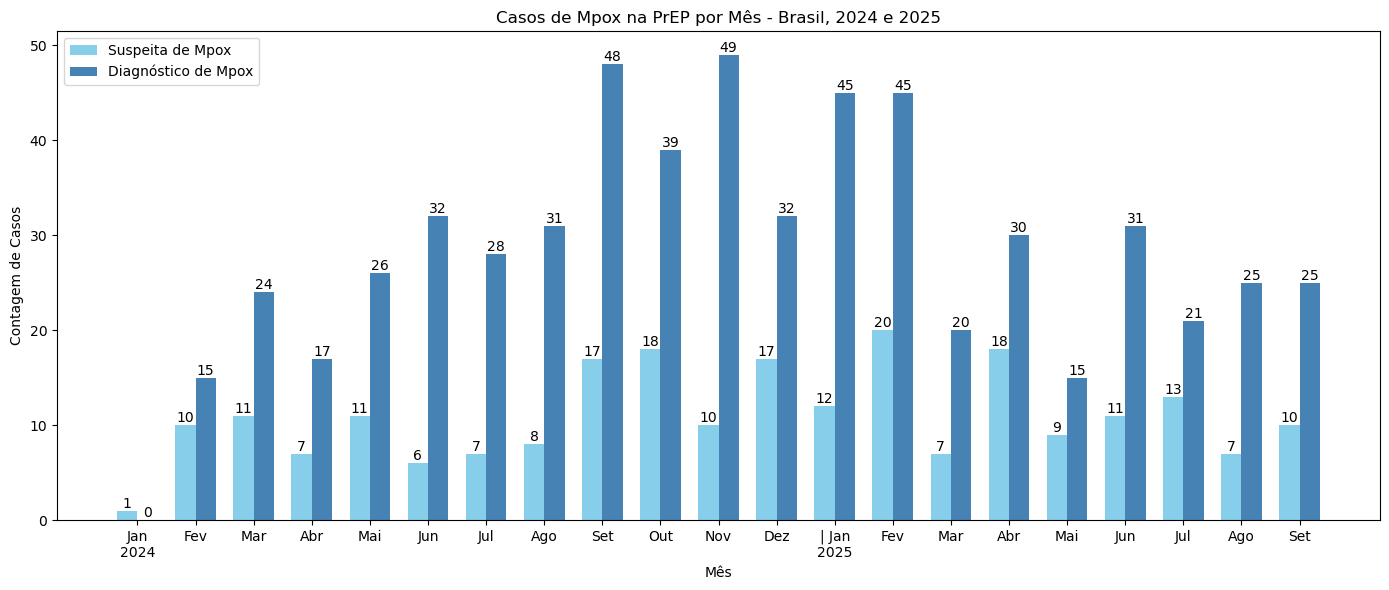

In [87]:
from matplotlib.lines import Line2D
import seaborn as sns

# Definir ordem dos meses (abreviação em português)
months_order = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Contagem de casos suspeitos e diagnosticados
suspeita_counts = Disp_semdupl[Disp_semdupl['st_suspeita_mpox'] == 1] \
    .groupby(['ano_disp', 'mes_disp']).size().reset_index(name='contagem_suspeita_mpox')

diagnost_counts = Disp_semdupl[Disp_semdupl['st_diagnost_mpox'] == 1] \
    .groupby(['ano_disp', 'mes_disp']).size().reset_index(name='contagem_diagnost_mpox')

# Merge das duas tabelas
monthly_counts = pd.merge(suspeita_counts, diagnost_counts, on=['ano_disp', 'mes_disp'], how='outer').fillna(0)

# Tipos corretos
monthly_counts['contagem_suspeita_mpox'] = monthly_counts['contagem_suspeita_mpox'].astype(int)
monthly_counts['contagem_diagnost_mpox'] = monthly_counts['contagem_diagnost_mpox'].astype(int)

# Garantir ordem dos meses
monthly_counts['mes_disp'] = pd.Categorical(monthly_counts['mes_disp'], categories=months_order, ordered=True)
monthly_counts = monthly_counts.sort_values(['ano_disp', 'mes_disp']).reset_index(drop=True)

# Criar coluna de rótulo para eixo x: "Jan", "Fev", ..., "Dez", "Jan", ...
monthly_counts['mes_ano_label'] = monthly_counts.apply(
    lambda row: f"{row['mes_disp']}\n{row['ano_disp']}" if row['mes_disp'] == 'Jan' else row['mes_disp'],
    axis=1
)

# Criação da coluna com rótulos customizados
def gerar_rotulo(row):
    if row['mes_disp'] == 'Jan' and row['ano_disp'] == 2025:
        return '| Jan\n2025'  # separador visual com barra vertical
    elif row['mes_disp'] == 'Jan':
        return 'Jan\n' + str(row['ano_disp'])
    else:
        return row['mes_disp']

monthly_counts['rotulo_eixo'] = monthly_counts.apply(gerar_rotulo, axis=1)

# Gráfico
x = np.arange(len(monthly_counts))
width = 0.35

plt.figure(figsize=(14, 6))
bar1 = plt.bar(x - width/2, monthly_counts['contagem_suspeita_mpox'], width, label='Suspeita de Mpox', color='skyblue')
bar2 = plt.bar(x + width/2, monthly_counts['contagem_diagnost_mpox'], width, label='Diagnóstico de Mpox', color='steelblue')

# Rótulos
plt.xlabel("Mês")
plt.ylabel("Contagem de Casos")
plt.title("Casos de Mpox na PrEP por Mês - Brasil, 2024 e 2025")
plt.xticks(ticks=x, labels=monthly_counts['rotulo_eixo'])

# Valores acima das colunas
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

# Legenda
plt.legend(loc='upper left')

# Salvar o gráfico
file_path_local_mpox = r"C:\Users\isabela.pereira\Desktop\PowerBi\PrEP\Mpox_PrEP.png"
plt.savefig(file_path_local_mpox, transparent=False, bbox_inches='tight')

# Mostrar
plt.tight_layout()
plt.show()



In [88]:
# Olhando a descontinuidade na última dispensa
Disp_semdupl.drop_duplicates("codigo_pac_eleito", keep = "first")["EmPrEP_Atual"].value_counts(dropna = False)

EmPrEP_Atual
Em PrEP atualmente      138862
None                     91584
Estão descontinuados     69761
Name: count, dtype: int64

In [89]:
# Group by 'codigo_pac_eleito' and sum 'time_in_prep'
Disp_semdupl['prep_time_by_individual'] = Disp_semdupl.groupby('codigo_pac_eleito')['duracao_sum'].transform('sum')

In [90]:
# Criando banco com entrada única por paciente (apenas a última dispensa)
Disp_ult_unico  = Disp_semdupl.drop_duplicates("codigo_pac_eleito", keep = "first").copy()

In [91]:
#Mediana de tempo de uso da PrEP

Disp_ult_unico[Disp_ult_unico['prep_time_by_individual'] < 1865]["prep_time_by_individual"].describe()

count    293064.000000
mean        365.014161
std         401.162381
min           1.000000
25%          60.000000
50%         210.000000
75%         510.000000
max        1861.000000
Name: prep_time_by_individual, dtype: float64

In [92]:
# Calculate the median and store in 'mediana_uso'
mediana_uso = Disp_ult_unico[Disp_ult_unico['prep_time_by_individual'] < 1865]["prep_time_by_individual"].median()

# Format the string
text = f"A mediana de tempo de uso da PrEP foi de {mediana_uso:.0f} dias"
print(text)


A mediana de tempo de uso da PrEP foi de 210 dias


In [93]:
# Filtrar os dados para incluir apenas registros a partir de 2023
Disp_semdupl_2023_onward = Disp_semdupl[(Disp_semdupl['ano_disp'] >= 2023) & 
                                        (Disp_semdupl['duracao_sum'].isin([90, 120]))].copy()

# Definir a ordem dos meses
month_order = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Converter 'mes_disp' para uma categoria ordenada
Disp_semdupl_2023_onward['mes_disp'] = pd.Categorical(Disp_semdupl_2023_onward['mes_disp'], categories=month_order, ordered=True)

# Criar a tabela cruzada com 'ano_disp' e 'mes_disp' em ordem
crosstab_result_duracao = pd.crosstab(index=Disp_semdupl_2023_onward['duracao_sum'], 
                                            columns=[Disp_semdupl_2023_onward['ano_disp'], Disp_semdupl_2023_onward['mes_disp']], 
                                            dropna=False)
crosstab_result_duracao

ano_disp     2023                                                             \
mes_disp      Jan   Fev    Mar   Abr   Mai    Jun   Jul    Ago    Set    Out   
duracao_sum                                                                    
90           3638  3279   4070  3248  3729   3731  3624   4277   3871   3977   
120          7699  8096  10021  8432  9814  10114  9868  11346  10357  11545   

ano_disp                    2024                                            \
mes_disp       Nov    Dez    Jan    Fev    Mar    Abr    Mai    Jun    Jul   
duracao_sum                                                                  
90            4030   4181   4246   4449   4390   4847   4889   4441   5115   
120          11897  11992  12151  12265  11662  12675  13245  13790  15109   

ano_disp                                         2025                       \
mes_disp       Ago    Set    Out    Nov    Dez    Jan    Fev    Mar    Abr   
duracao_sum                                                                  
90            5280   5150   5283   5015   5033   5034   5366   5035   5345   
120          15505  14877  18042  15976  15721  15298  17434  15726  17247   

ano_disp                                                    
mes_disp       Mai    Jun    Jul    Ago    Set Out Nov Dez  
duracao_sum                                                 
90            5176   5111   5885   4918   4950   0   0   0  
120          17396  18203  21007  19975  20395   0   0   0

### Banco de Primeiro Atendimento

In [94]:
PrimA['dt_prescricao'] = pd.to_datetime(PrimA['dt_prescricao'],errors='coerce').dt.normalize()
PrimA

co_paciente_prep   cod_pac  codigo_pac_eleito  co_seq_atendimento_prep  \
0                     2  88600321           88600321                    10641   
1                     3  23408142           23408142                        4   
2                     4  23408143           23408143                        5   
3                     5     43818              43818                        6   
4                     7  23408144           23408144                       58   
...                 ...       ...                ...                      ...   
65288            309643   1066917            1066917                    68805   
65289            310045   1067638            1067638                    68811   
65290            310584   1068537            1068537                    68812   
65291            310941   1069273            1069273                    68814   
65292            311343   1070136            1070136                    68815   

                                  tp_razao_servico_saude  \
0      Vim buscar PrEP (responder 8a e 8b)           ...   
1      Vim buscar PrEP (responder 8a e 8b)           ...   
2      Vim buscar PrEP (responder 8a e 8b)           ...   
3      Vim buscar PrEP (responder 8a e 8b)           ...   
4      Vim buscar PrEP (responder 8a e 8b)           ...   
...                                                  ...   
65288  Vim buscar PrEP (responder 8a e 8b)           ...   
65289  Vim buscar PrEP (responder 8a e 8b)           ...   
65290  Vim buscar PrEP (responder 8a e 8b)           ...   
65291  Vim buscar PrEP (responder 8a e 8b)           ...   
65292  Vim buscar PrEP (responder 8a e 8b)           ...   

                                       tp_motivacao_prep  \
0      Encaminhado por profissional de saúde/ outro s...   
1      Decisão própria / Internet / Amigo            ...   
2      Decisão própria / Internet / Amigo            ...   
3      Decisão própria / Internet / Amigo            ...   
4      Decisão própria / Internet / Amigo            ...   
...                                                  ...   
65288  Decisão própria / Internet / Amigo            ...   
65289  Decisão própria / Internet / Amigo            ...   
65290  Decisão própria / Internet / Amigo            ...   
65291  Decisão própria / Internet / Amigo            ...   
65292  Decisão própria / Internet / Amigo            ...   

                                      st_usou_prep_antes  ds_meses_prep  \
0      Sim, por iniciativa própria (responder a 8c)  ...           48.0   
1      Sim, por meio do projeto Combina (FMUSP)      ...            NaN   
2      Sim, por meio do projeto Combina (FMUSP)      ...            3.0   
3      Sim, por meio do projeto Combina (FMUSP)      ...            3.0   
4      Sim, por meio do projeto Combina (FMUSP)      ...            1.0   
...                                                  ...            ...   
65288  Não                                           ...            NaN   
65289  Não                                           ...            NaN   
65290  Não                                           ...            NaN   
65291  Não                                           ...            NaN   
65292  Não                                           ...            NaN   

       tp_exposicao_risco_relacao_sexual_desprotegida  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
65288                                             NaN   
65289                                             NaN   
65290                                             NaN   
65291                                             NaN   
65292                                             NaN   

      

In [95]:
# Ajustando a data da prescrição e gravando a mais antiga nos cadastros
PrimA['dt_presc'] = pd.to_datetime(PrimA['dt_prescricao'],dayfirst=True,errors='coerce').dt.normalize()
PrimA['dt_pri_presc'] = PrimA.groupby(['codigo_pac_eleito'])['dt_presc'].transform('min')

In [96]:
# Ajustando o Planejamento reprodutivo para juntar os duplicados e manter o que estiver preenchido.
PrimA["st_planejamento_reprodutivo"].value_counts()

st_planejamento_reprodutivo
Não                                                                                 62302
Sim                                                                                  2990
Name: count, dtype: int64

In [97]:
PrimA["st_planejamento_reprodutivo"] = PrimA["st_planejamento_reprodutivo"].apply(lambda x: str(x).strip())
PlanR_Cond = [(PrimA['st_planejamento_reprodutivo'] == "Sim"),
              (PrimA['st_planejamento_reprodutivo'] == "Não")]     

PlanR = [1,0]
    

PrimA["st_planejamento_reprodutivo_num"] = np.select(PlanR_Cond, PlanR, default=np.nan)
PrimA["st_planejamento_reprodutivo_num"].value_counts()

st_planejamento_reprodutivo_num
0.0    62302
1.0     2990
Name: count, dtype: int64

In [98]:
PrimA['Pop_plan_rep_F2'] = PrimA.groupby(['codigo_pac_eleito',"dt_presc"], dropna = False)['st_planejamento_reprodutivo_num'].transform('max')

# Replace 1 with 'Sim' and 0 with 'Não' in the 'Pop_plan_rep_F2' column
PrimA['Pop_plan_rep_F2'] = PrimA['Pop_plan_rep_F2'].replace({1: 'Sim', 0: 'Não'})
# Display the unique values in the 'Pop_plan_rep_F2' column after the replacement
PrimA['Pop_plan_rep_F2'].value_counts()


Pop_plan_rep_F2
Não    62297
Sim     2995
Name: count, dtype: int64

In [99]:
# Ajustando o Dinheiro Sexo para juntar os duplicados e manter o que estiver preenchido.
PrimA["st_dinheiro_sexo"].value_counts()

st_dinheiro_sexo
Não                                                                                 58263
Sim                                                                                  7029
Name: count, dtype: int64

In [100]:
PrimA["st_dinheiro_sexo"] = PrimA["st_dinheiro_sexo"].apply(lambda x: str(x).strip())

DinSex_Cond = [(PrimA['st_dinheiro_sexo'] == "Sim"), (PrimA['st_dinheiro_sexo'] == "Não")]     

DinSex = [1,0]
    

PrimA["st_dinheiro_sexo_num"] = np.select(DinSex_Cond, DinSex, default=np.nan)
PrimA["st_dinheiro_sexo_num"].value_counts()

st_dinheiro_sexo_num
0.0    58263
1.0     7029
Name: count, dtype: int64

In [101]:
PrimA['Pop_prof_sexo_F2'] = PrimA.groupby(['codigo_pac_eleito',"dt_presc"], dropna = False)['st_dinheiro_sexo_num'].transform('max')
# Replace 1 with 'Sim' and 0 with 'Não' in the 'Pop_prof_sexo_F2' column
PrimA['Pop_prof_sexo_F2'] = PrimA['Pop_prof_sexo_F2'].replace({1: 'Sim', 0: 'Não'})
# Display the unique values in the 'Pop_prof_sexo_F2' column after the replacement
PrimA['Pop_prof_sexo_F2'].value_counts()

Pop_prof_sexo_F2
Não    58253
Sim     7039
Name: count, dtype: int64

In [102]:
# Ajustando o st_gestantes para juntar os duplicados e manter o que estiver preenchido.
PrimA["st_esta_gestante"].value_counts()

st_esta_gestante
Não se aplica                                                                       54388
Não                                                                                 10675
Sim                                                                                   227
Name: count, dtype: int64

In [103]:
PrimA["st_esta_gestante"] = PrimA["st_esta_gestante"].apply(lambda x: str(x).strip())

In [104]:
Gest_Cond = [(PrimA['st_esta_gestante'] == "Sim"), (PrimA['st_esta_gestante'] == "Não"),(PrimA['st_esta_gestante'] == "Não se aplica")]     

Gest = [1,0,2]
    
PrimA["st_esta_gestante_num"] = np.select(Gest_Cond, Gest, default=np.nan)
PrimA["st_esta_gestante_num"].value_counts()
### 1 = Sim, 0 = Não

st_esta_gestante_num
2.0    54388
0.0    10675
1.0      227
Name: count, dtype: int64

In [105]:
PrimA['Pop_gestante_F2'] = PrimA.groupby(['codigo_pac_eleito',"dt_presc"], dropna = False)['st_esta_gestante_num'].transform('max')

PrimA['Pop_gestante_F2'] = PrimA['Pop_gestante_F2'].replace({1: 'Sim', 0: 'Não',2:'Não se aplica'})
# Display the unique values in the 'Pop_prof_sexo_F2' column after the replacement
PrimA['Pop_gestante_F2'].value_counts()

Pop_gestante_F2
Não se aplica    54417
Não              10646
Sim                227
Name: count, dtype: int64

In [106]:
# Ajustando as variáveis das drogas
PrimA["st_droga_injetavel"] = PrimA["st_droga_injetavel"].apply(lambda x: str(x).strip())

In [107]:
PrimA["st_droga_injetavel"].value_counts()

st_droga_injetavel
Não, nunca                          62465
nan                                  2010
Sim, mas não nos últimos 3 meses      574
Sim, nos últimos 3 meses              244
Name: count, dtype: int64

In [108]:
Disp_semdupl["st_droga_injetavel"].value_counts()

st_droga_injetavel
-      852769
Não    679544
Sim      2024
Name: count, dtype: int64

In [109]:
Drug_Cond = [(PrimA['st_poppers'] == 1) | (PrimA['st_cocaina'] == 1) | (PrimA['st_crack'] == 1) | 
            (PrimA['st_maconha'] == 1) | (PrimA['st_club_drugs'] == 1) | (PrimA['st_estimulantes_para_erecao'] == 1) |
            (PrimA['st_solventes'] == 1) | (PrimA['st_droga_injetavel'] == "Sim, nos últimos 3 meses")]     

Drug = [1]
    
PrimA["Uso_Drogas"] = np.select(Drug_Cond, Drug, default=0)
PrimA["Uso_Drogas"].value_counts()
### 1 = Usou alguma droga nos últimos 3 meses, 0 = Não usou.

Uso_Drogas
0    43626
1    21667
Name: count, dtype: int64

In [110]:
PrimA['Uso_Drogas_q20_F2'] = PrimA.groupby(['codigo_pac_eleito',"dt_presc"], dropna = False)['Uso_Drogas'].transform("max")
PrimA['Uso_Drogas_q20_F2'].value_counts()

Uso_Drogas_q20_F2
0    43609
1    21684
Name: count, dtype: int64

In [111]:
# Ajustando as variável do álcool
PrimA["st_alcool"] = PrimA["st_alcool"].apply(lambda x: str(x).strip())

In [112]:
Alcool_Cond = [(PrimA['st_alcool'] == "Sim"), (PrimA['st_alcool'] == "Não")]     

Alcool = [1,2]
    
PrimA["Uso_Alcool"] = np.select(Alcool_Cond, Alcool, default=3)
PrimA["Uso_Alcool"].value_counts()
### 1 = Sim, 2 = Não, 3 = Não informado.

Uso_Alcool
1    29648
2    28519
3     7126
Name: count, dtype: int64

In [113]:
PrimA['Uso_Alcool_q19_F2'] = PrimA.groupby(['codigo_pac_eleito',"dt_presc"], dropna = False)['Uso_Alcool'].transform('min')
PrimA['Uso_Alcool_q19_F2'].value_counts()

Uso_Alcool_q19_F2
1    29691
2    28519
3     7083
Name: count, dtype: int64

In [114]:
# Ajustando o teste HIV para juntar os duplicados e manter o que estiver positivo.
PrimA["st_resultado_hiv_teste_rapido"].value_counts()

st_resultado_hiv_teste_rapido
Não Reagente                      64908
Reagente                            225
Name: count, dtype: int64

In [115]:
PrimA["st_resultado_hiv_teste_rapido"] = PrimA["st_resultado_hiv_teste_rapido"].apply(lambda x: str(x).strip())

In [116]:
TsHIV_Cond = [(PrimA['st_resultado_hiv_teste_rapido'] == "Reagente")]     

TsHIV = [1]
    

PrimA["TR_HIV_num"] = np.select(TsHIV_Cond, TsHIV, default=0)
PrimA["TR_HIV_num"].value_counts()

TR_HIV_num
0    65068
1      225
Name: count, dtype: int64

In [117]:
PrimA['TR_HIV_max'] = PrimA.groupby(['codigo_pac_eleito'])['TR_HIV_num'].transform('max')
PrimA['TR_HIV_max'].value_counts()

TR_HIV_max
0    65055
1      238
Name: count, dtype: int64

In [118]:
# Ajustando a data do teste e gravando a que deu reagente para os duplicados.
PrimA['dt_TR_HIV'] = pd.to_datetime(PrimA['dt_resultado_teste_rapido_hiv'],dayfirst=True,errors='coerce').dt.normalize()
PrimA.sort_values(by = ['codigo_pac_eleito',"TR_HIV_num"], ascending = False, inplace = True)
PrimA['dt_TR_HIV_F2'] = PrimA.groupby(['codigo_pac_eleito'])['dt_TR_HIV'].transform('first')
PrimA[PrimA["codigo_pac_eleito"] == 294797]

co_paciente_prep  cod_pac  codigo_pac_eleito  co_seq_atendimento_prep  \
37948             35823   294797             294797                    38347   
37947             35823   294797             294797                    36922   

                                  tp_razao_servico_saude  \
37948  Vim buscar PrEP (responder 8a e 8b)           ...   
37947  Vim buscar PrEP (responder 8a e 8b)           ...   

                                       tp_motivacao_prep  \
37948  Encaminhado por profissional de saúde/ outro s...   
37947  Decisão própria / Internet / Amigo            ...   

                                      st_usou_prep_antes  ds_meses_prep  \
37948  Sim, por iniciativa própria (responder a 8c)  ...            NaN   
37947  Não                                           ...            NaN   

       tp_exposicao_risco_relacao_sexual_desprotegida  \
37948                                             NaN   
37947                                             NaN   

       tp_exposicao_risco_violencia_sexual  \
37948                                  NaN   
37947                                  NaN   

       tp_exposicao_risco_compartilhamento_seringa  \
37948                                          NaN   
37947                                          NaN   

       tp_exposicao_risco_acidente_perfuro  tp_exposicao_risco_nao  \
37948                                  NaN                     1.0   
37947                                  NaN                     1.0   

       ds_usou_pep  qt_relacao_homem  qt_relacao_mulher  \
37948            0                 3                  0   
37947            0                20                  0   

       qt_relacao_homem_trans  qt_relacao_mulher_trans  qt_relacao_travesti  \
37948                       0                        0                    0   
37947                       0                        0                    0   

                                    st_usou_preservativo  st_anal_insertivo  \
37948  Metade das vezes                              ...                1.0   
37947  Metade das vezes                              ...                1.0   

       st_anal_receptivo  st_vaginal_insertivo  st_vaginal_receptivo  \
37948                1.0                   NaN                   NaN   
37947                1.0                   NaN                   NaN   

       st_nao_se_aplica                        st_relacao_sem_preservativo  \
37948               NaN  Não                                           ...   
37947               NaN  Não                                           ...   

      st_dinheiro_sexo  st_feridas_vagina_penis  st_feridas_anus  \
37948              Não                      NaN              NaN   
37947              Não                      NaN              NaN   

       st_verrugas_vagina_penis  st_verrugas_anus  \
37948                       NaN               NaN   
37947                       NaN               NaN   

       st_pequenas_bolhas_vagina_penis  st_pequenas_bolhas_anus  \
37948                              NaN                      NaN   
37947                              NaN                      NaN   

       st_corrimento_vaginal_uretral  st_fui_diagnosticado_com_sifilis  \
37948                            NaN                               NaN   
37947                            NaN                               NaN   

       st_fui_diagnosticado_com_gonorreia  st_nao st_planejamento_reprodutivo  \
37948                                 NaN     1.0                         Não   
37947                                 NaN     1.0                         Não   

      st_esta_gestante st_alcool  st_poppers  st_cocaina  st_crack  \
37948    Não se aplica       Sim         NaN         NaN       NaN   
37947    Não se aplica       Sim         NaN         1.0       NaN   

       st_maconha  st_club_drugs  st_estimulantes_para_erecao  st_solventes  \
37948         NaN            NaN                          NaN  

In [119]:
# Criando a base sem cadastros duplicados
PrimA.sort_values(by = "dt_presc", ascending = False, inplace = True)

In [120]:
PrimA_PreP_Unico = PrimA.drop_duplicates("codigo_pac_eleito", keep = "first").copy()

In [121]:
PrimA_PreP_Unico['Pop_plan_rep_F2'].value_counts()

Pop_plan_rep_F2
Não    56592
Sim     2774
Name: count, dtype: int64

In [122]:
PrimA_PreP_Unico['Pop_prof_sexo_F2'].value_counts()

Pop_prof_sexo_F2
Não    53241
Sim     6125
Name: count, dtype: int64

In [123]:
PrimA_PreP_Unico['Pop_gestante_F2'].value_counts()

Pop_gestante_F2
Não se aplica    49253
Não               9899
Sim                212
Name: count, dtype: int64

In [124]:
PrimA_PreP_Unico['Uso_Drogas_q20_F2'].value_counts()

Uso_Drogas_q20_F2
0    39857
1    19510
Name: count, dtype: int64

In [125]:
PrimA_PreP_Unico['Uso_Alcool_q19_F2'].value_counts()

Uso_Alcool_q19_F2
1    26778
2    26138
3     6451
Name: count, dtype: int64

In [126]:
PrimA_PreP_Unico = PrimA_PreP_Unico.rename(columns={'TR_HIV_max': 'TR_HIV_F2'})
PrimA_PreP_Unico['TR_HIV_F2'].value_counts()

TR_HIV_F2
0    59142
1      225
Name: count, dtype: int64

## Banco de Retorno 30 Dias

In [127]:
Ret30['dt_preenchimento'] = pd.to_datetime(Ret30['dt_preenchimento'],errors='coerce').dt.normalize()

In [128]:
# Ajustando as datas de Teste Rápido, de CV e de preenchimento
Ret30['dt_TR_HIV'] = pd.to_datetime(Ret30['dt_resultado_teste_rapido_hiv'],errors='coerce').dt.normalize()
Ret30['dt_CV_HIV'] = pd.to_datetime(Ret30['dt_resultado_cv_hiv'],errors='coerce').dt.normalize()
Ret30['dt_preenchimento_F3'] = pd.to_datetime(Ret30['dt_preenchimento'],errors='coerce').dt.normalize()

In [129]:
# Ajustando o teste HIV para juntar os duplicados e manter o que estiver positivo.
Ret30["st_resultado_hiv_teste_rapido"].value_counts()

st_resultado_hiv_teste_rapido
Não Reagente                      49484
Reagente                             46
Name: count, dtype: int64

In [130]:
Ret30["st_resultado_hiv_teste_rapido"] = Ret30["st_resultado_hiv_teste_rapido"].apply(lambda x: str(x).strip())

In [131]:
TsHIV_Cond = [(Ret30['st_resultado_hiv_teste_rapido'] == "Reagente"), (Ret30['st_resultado_hiv_teste_rapido'] == "Não Reagente")]     

TsHIV = [1,0]
    

Ret30["TR_HIV_num"] = np.select(TsHIV_Cond, TsHIV, default=np.nan)
Ret30["TR_HIV_num"].value_counts()

TR_HIV_num
0.0    49484
1.0       46
Name: count, dtype: int64

In [132]:
Ret30['TR_HIV_max'] = Ret30.groupby(['codigo_pac_eleito'])['TR_HIV_num'].transform('max')
Ret30['TR_HIV_max'].value_counts()

TR_HIV_max
0.0    49494
1.0       50
Name: count, dtype: int64

In [133]:
# Ajustando o teste Carga Viral para juntar os duplicados e manter o que estiver positivo.
Ret30["tp_resultado_exame_cv_hiv"].value_counts()

tp_resultado_exame_cv_hiv
Não realizado/Indisponível        43240
Não Detectável                     6379
Detectável                           27
Name: count, dtype: int64

In [134]:
Ret30["tp_resultado_exame_cv_hiv"] = Ret30["tp_resultado_exame_cv_hiv"].apply(lambda x: str(x).strip())

In [135]:
TsHIV_Cond = [(Ret30['tp_resultado_exame_cv_hiv'] == "Detectável"), (Ret30['tp_resultado_exame_cv_hiv'] == "Não Detectável")]     

TsHIV = [1,0]
    

Ret30["CV_HIV_num"] = np.select(TsHIV_Cond, TsHIV, default=np.nan)
Ret30["CV_HIV_num"].value_counts()

CV_HIV_num
0.0    6379
1.0      27
Name: count, dtype: int64

In [136]:
Ret30['CV_HIV_max'] = Ret30.groupby(['codigo_pac_eleito'])['CV_HIV_num'].transform('max')
Ret30['CV_HIV_max'].value_counts()

CV_HIV_max
0.0    6939
1.0      29
Name: count, dtype: int64

In [137]:
# Renomeando as colunas
Ret30.rename(columns = {"qt_comprimidos_nao_tomou":"qt_comprimidos_nao_tomou_F3"}, inplace = True)

In [138]:
# Ajustando a data do teste e gravando a que deu reagente para os duplicados.
Ret30.sort_values(by = ['codigo_pac_eleito',"TR_HIV_num"], ascending = False, inplace = True)
Ret30['dt_TR_HIV_F2'] = Ret30.groupby(['codigo_pac_eleito'])['dt_TR_HIV'].transform('first')

In [139]:
# Ajustando a data da CV e gravando a que deu detectável para os duplicados.
Ret30.sort_values(by = ['codigo_pac_eleito',"CV_HIV_num"], ascending = False, inplace = True)
Ret30['dt_CV_HIV_F2'] = Ret30.groupby(['codigo_pac_eleito'])['dt_CV_HIV'].transform('first')

In [140]:
# Criando a base sem cadastros duplicados
Ret30.sort_values(by = "dt_preenchimento_F3", ascending = False, inplace = True)
Retorno_PreP_Unico = Ret30.drop_duplicates("codigo_pac_eleito", keep = "first").copy()

In [141]:
Retorno_PreP_Unico = Retorno_PreP_Unico.rename(columns={'TR_HIV_max': 'TR_HIV_F3'})
Retorno_PreP_Unico["TR_HIV_F3"].value_counts()

TR_HIV_F3
0.0    46597
1.0       46
Name: count, dtype: int64

In [142]:
Retorno_PreP_Unico = Retorno_PreP_Unico.rename(columns={'CV_HIV_max': 'CV_HIV_F3'})
Retorno_PreP_Unico["CV_HIV_F3"].value_counts()

CV_HIV_F3
0.0    6121
1.0      27
Name: count, dtype: int64

## Banco de Acompanhamento

In [143]:
Acomp['dt_preenchimento'] = pd.to_datetime(Acomp['dt_preenchimento'],errors='coerce').dt.normalize()

In [144]:
Acomp

co_paciente_prep   cod_pac  codigo_pac_eleito  \
0                      2  88600321           88600321   
1                      2  88600321           88600321   
2                      2  88600321           88600321   
3                      2  88600321           88600321   
4                      2  88600321           88600321   
...                  ...       ...                ...   
170579            269971    988542             988542   
170580            271302    991263             991263   
170581            271643    991965             991965   
170582            272059    990983             990983   
170583            272084    990994             990994   

        co_acompanhamento_clinico_prep dt_preenchimento  \
0                                19205       2019-06-27   
1                                33611       2019-11-14   
2                                45925       2020-02-17   
3                                56766       2020-05-26   
4                                66971       2020-09-08   
...                                ...              ...   
170579                          174439       2025-07-21   
170580                          175086       2025-09-15   
170581                          175045       2025-09-10   
170582                          175095       2025-09-15   
170583                          175096       2025-09-15   

       st_visita_intercorrencia  st_evento_adverso  \
0                           Não                NaN   
1                           Não                NaN   
2                           Não                NaN   
3                           Não                NaN   
4                           Não                NaN   
...                         ...                ...   
170579                      Não                NaN   
170580                      Não                NaN   
170581                      Não                NaN   
170582                      Não                NaN   
170583                      Não                NaN   

        st_suspeita_infeccao_viral_aguda  st_confirmacao_de_soroconversao  \
0                                    NaN                              NaN   
1                                    NaN                              NaN   
2                                    NaN                              NaN   
3                                    NaN                              NaN   
4                                    NaN                              NaN   
...                                  ...                              ...   
170579                               NaN                              NaN   
170580                               NaN                              NaN   
170581                               NaN                              NaN   
170582                               NaN                              NaN   
170583                               NaN                              NaN   

        st_substituicao_frasco_mediacao  st_ist st_infeccao  \
0                                   NaN     NaN         Não   
1                                   NaN     NaN         Não   
2                                   NaN     NaN         Não   
3                                   NaN     NaN         Não   
4                                   NaN     NaN         Não   
...                                 ...     ...         ...   
170579                              NaN     NaN         Não   
170580                              NaN     NaN         Sim   
170581                              NaN     NaN         Não   
170582                              NaN     NaN         Não   
170583                              NaN     NaN         Não   

        st_feridas_vagina_penis  st_feridas_anus  st_verrugas_vagina_penis  \
0                           NaN              NaN                       NaN   
1                           NaN              NaN                       NaN   
2                           NaN              NaN 

In [145]:
# Ajustando as datas de Teste Rápido, de CV e de preenchimento
Acomp['dt_TR_HIV'] = pd.to_datetime(Acomp['dt_resultado_teste_rapido_hiv'],errors='coerce').dt.normalize()
Acomp['dt_preenchimento_F4'] = pd.to_datetime(Acomp['dt_preenchimento'],errors='coerce').dt.normalize()

In [146]:
# Marcando o primeiro seguimento em cada paciente
Acomp["data_min"] = Acomp.groupby(['codigo_pac_eleito'])['dt_preenchimento_F4'].transform('min')

In [147]:
Prim_Cond = [(Acomp['dt_preenchimento_F4'] == Acomp["data_min"]) & (Acomp.duplicated(subset = ["codigo_pac_eleito",'dt_preenchimento_F4']) == False)]     

Prim = [1]
    

Acomp["Pri_seg"] = np.select(Prim_Cond, Prim, default=0)
Acomp["Pri_seg"].value_counts()

Pri_seg
0    135226
1     35358
Name: count, dtype: int64

In [148]:
# Marcando o último seguimento em cada paciente
Acomp["data_max"] = Acomp.groupby(['codigo_pac_eleito'])['dt_preenchimento_F4'].transform('max')

In [149]:
Ult_Cond = [(Acomp['dt_preenchimento_F4'] == Acomp["data_max"]) & (Acomp.duplicated(subset = ["codigo_pac_eleito",'dt_preenchimento_F4']) == False)]     

Ult = [1]
    

Acomp["Ult_seg"] = np.select(Ult_Cond, Ult, default=0)
Acomp["Ult_seg"].value_counts()

Ult_seg
0    135226
1     35358
Name: count, dtype: int64

In [150]:
# Ajustando as variáveis das drogas
Acomp["st_droga_injetavel"] = Acomp["st_droga_injetavel"].apply(lambda x: str(x).strip())

DrugA_Cond = [(Acomp['st_poppers'] == 1) | (Acomp['st_cocaina'] == 1) | (Acomp['st_crack'] == 1) | 
            (Acomp['st_maconha'] == 1) | (Acomp['st_club_drugs'] == 1) | (Acomp['st_estimulantes_para_erecao'] == 1) |
            (Acomp['st_solventes'] == 1) | (Acomp['st_droga_injetavel'] == "Sim, nos últimos 3 meses")]     

DrugA = [1]
    
Acomp["Uso_Drogas_F4"] = np.select(DrugA_Cond, DrugA, default=0)
Acomp["Uso_Drogas_F4"].value_counts()
### 1 = Usou alguma droga nos últimos 3 meses, 0 = Não usou.

Uso_Drogas_F4
0    121845
1     48739
Name: count, dtype: int64

In [151]:
# Ajustando as variável do álcool
Acomp["st_alcool"] = Acomp["st_alcool"].apply(lambda x: str(x).strip())

Alcool_CondA = [(Acomp['st_alcool'] == "Sim"), (Acomp['st_alcool'] == "Não")]     

AlcoolA = [1,0]
    
Acomp["Uso_Alcool_F4"] = np.select(Alcool_CondA, AlcoolA, default=np.nan)
Acomp["Uso_Alcool_F4"].value_counts()
### 1 = Sim, 0 = Não, NaN = Não informado.

Uso_Alcool_F4
0.0    86792
1.0    78421
Name: count, dtype: int64

In [152]:
# Adesão no último segmento em coluna própria
Acomp.sort_values(by = ['codigo_pac_eleito',"dt_preenchimento_F4"], ascending = False, inplace = True)
Acomp['qt_comprimidos_UltSeg'] = Acomp.groupby(['codigo_pac_eleito'])['qt_comprimidos_nao_tomou'].transform('first')

In [153]:
# Adesão no prmeiro segmento em coluna própria
Acomp.sort_values(by = ['codigo_pac_eleito',"dt_preenchimento_F4"], ascending = True, inplace = True)
Acomp['qt_comprimidos_PriSeg'] = Acomp.groupby(['codigo_pac_eleito'])['qt_comprimidos_nao_tomou'].transform('first')

In [154]:
# Data do prmeiro segmento em coluna própria
Acomp.sort_values(by = ['codigo_pac_eleito',"dt_preenchimento_F4"], ascending = True, inplace = True)
Acomp['dt_preenchimento_PriSeg_F4 '] = Acomp.groupby(['codigo_pac_eleito'])['dt_preenchimento_F4'].transform('first')

In [155]:
# Ajustando o teste de HIV
Acomp["st_resultado_hiv_teste_rapido"] = Acomp["st_resultado_hiv_teste_rapido"].apply(lambda x: str(x).strip())
TsHIVA_Cond = [(Acomp['st_resultado_hiv_teste_rapido'] == "Reagente"), (Acomp['st_resultado_hiv_teste_rapido'] == "Não Reagente")]     

TsHIVA = [1,0]
    

Acomp["TR_HIV_F4"] = np.select(TsHIVA_Cond, TsHIVA, default=np.nan)
Acomp["TR_HIV_F4"].value_counts()

TR_HIV_F4
0.0    170113
1.0        54
Name: count, dtype: int64

In [156]:
#### Organiza pela data de preenchimmento e mantém apenas o último registro
Acomp.sort_values(by = ["dt_preenchimento_F4"], inplace = True, ascending = False)
Acomp_ult = Acomp.drop_duplicates("codigo_pac_eleito", keep = "first").copy()

## Banco de Cadastro


In [157]:
Cad['dt_ult_atu'] = pd.to_datetime(Cad['dt_ult_atu'],errors='coerce').dt.normalize()
Cad

co_paciente_prep  codigo_paciente  codigo_pac_eleito codigo_pid  \
0                      2         88600321           88600321          -   
1                      3         23408142           23408142          -   
2                      4         23408143           23408143          -   
3                      5            43818              43818          -   
4                      7         23408144           23408144          -   
...                  ...              ...                ...        ...   
311052            313392          1074180            1074180          -   
311053            313393          1074181            1074181          -   
311054            313394          1074182            1074182          -   
311055            313532          1035156            1035156          -   
311056            313724           971218             971218          -   

          st_pac_social                                 nm_pac  \
0       Nome Civil                Ricardo de Paula Vasconcelos   
1       Nome Civil             JOSEPH MARTINUS PAULUS VAN BOOM   
2       Nome Civil                LUIS GUSTAVO OLIVEIRA FARIAS   
3       Nome Civil                DYONE MENDONÇA DO NASCIMENTO   
4       Nome Civil         ALEXANDRE JARLLES PEREIRA DE ARAÚJO   
...                 ...                                    ...   
311052  Nome Civil                               Vinicios Mees   
311053  Nome Civil             TATIANE ORPHEU DE LIMA CARVALHO   
311054  Nome Civil                       JEOVANE CRUZ DA SILVA   
311055  Nome Civil                         LUAN CHAVES PEREIRA   
311056  Nome Civil       HORACIO AUGUSTO GUEDES VARELLA JUNIOR   

                                           nm_mae                  dt_nasc  \
0       Sara Guiomar Colares de Paula Vasconcelos  1978-12-07 00:00:00.000   
1                             ALEIDA MARIA BEVERS  1967-06-25 00:00:00.000   
2                           IRACI OLIVEIRA FARIAS  1997-03-21 00:00:00.000   
3               MARIA DE FÁTIMA BRAGA DE MENDONÇA  1994-07-11 00:00:00.000   
4                      BENEDITA PEREIRA DE ARAÚJO  1978-08-28 00:00:00.000   
...                                           ...                      ...   
311052                Elisangela Visnetainer Mees  1997-09-12 00:00:00.000   
311053             EURIDICE ORPHEU ALVES DE SOUZA  1998-02-11 00:00:00.000   
311054             MARIA DO CARMO PEREIRA DA CRUZ  1997-12-01 00:00:00.000   
311055           FRANCISCA ELINEIDE BORGES CHAVES  1997-05-17 00:00:00.000   
311056                    SONIA APARECIDA VARELLA  1977-02-24 00:00:00.000   

        nm_pais     nacio_pais             st_estrangeiro  \
0        BRASIL  BRASILEIRO(A)  Residente                   
1       HOLANDA    HOLANDES(A)  Residente                   
2        BRASIL              -  -                           
3        BRASIL              -  -                           
4        BRASIL              -  -                           
...         ...            ...                        ...   
311052   BRASIL  BRASILEIRO(A)  -                           
311053   BRASIL  BRASILEIRO(A)  -                           
311054   BRASIL  BRASILEIRO(A)  -                           
311055   BRASIL  BRASILEIRO(A)  -                           
311056   BRASIL  BRASILEIRO(A)  -                           

       st_habitantes_fronteira uf_nascimento  codigo_ibge_nasc  \
0                          Não            SP         3550308.0   
1                          Não            -                NaN   
2                          -              CE         2313203.0   
3                          -              CE         2313807.0   
4                          -              CE         2304400.0   
...                        ...           ...               ...   
311052                     Não            RS         4316808.0   
311053                     Não            SP         3550308.0   
311054                     Não            AM      

In [158]:
#Conta os registros únicos (False) e os duplicados (true).
Cad.duplicated(subset="codigo_pac_eleito").value_counts()

False    309540
True       1517
Name: count, dtype: int64

In [159]:
# Trabalhando as datas

Cad['dt_nasc'] = pd.to_datetime(Cad['dt_nasc'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
Cad['dt_nascimento'] = Cad['dt_nasc'].dt.normalize()

Cad['dt_cadas'] = pd.to_datetime(Cad['dt_cadas'],errors='coerce')
Cad['dt_cadastro'] = Cad['dt_cadas'].dt.normalize()
Cad['ano_cadastro']= Cad['dt_cadastro'].dt.year

Cad['dt_ult_atu'] = pd.to_datetime(Cad['dt_ult_atu'],errors='coerce')
Cad['dt_atualizacao'] = Cad['dt_ult_atu'].dt.normalize()

#### Organiza pela data de atualização e mantém apenas o último cadastro
Cad.sort_values(by = ["dt_atualizacao"], inplace = True, ascending = False)


In [160]:
print("dt_nascimento:")
print(Cad['dt_nascimento'].value_counts(dropna=False))
print(f"Total: {Cad['dt_nascimento'].notnull().sum() + Cad['dt_nascimento'].isnull().sum()}\n")

dt_nascimento:
dt_nascimento
1997-04-14    80
1996-09-05    73
1995-12-27    71
1995-08-08    70
1996-08-15    70
              ..
1949-09-27     1
1966-08-01     1
1967-01-02     1
2009-05-06     1
1949-06-01     1
Name: count, Length: 18822, dtype: int64
Total: 311057



In [161]:
Cad.drop_duplicates("codigo_pac_eleito", keep = "first", inplace = True)

In [162]:
#conferindo se tirou duplicidades
Cad.duplicated(subset="codigo_pac_eleito").value_counts()

False    309540
Name: count, dtype: int64

In [163]:
#Separando Usuários ImPrEP e Usuários SUS

DescImprep = [(Cad['codigo_pid'] != "-")]     

Desc_ImPrEP = ['Usuário ImPrEP']
    
Cad["ImPrEP"] = np.select(DescImprep, Desc_ImPrEP, default="Usuário SUS")
Cad["ImPrEP"].value_counts()

ImPrEP
Usuário SUS       305392
Usuário ImPrEP      4148
Name: count, dtype: int64

In [164]:
# Ajustando o Trabalho Sexual
Cad = Cad.rename(columns={'st_trabalho_sexual': 'st_trabalho_sexual_cadas'})
Cad["st_trabalho_sexual_cadas"].value_counts()

st_trabalho_sexual_cadas
-      224695
Não     81211
Sim      3634
Name: count, dtype: int64

In [165]:
# Ajustando o Álcool

Cad["st_dose_alcool"].value_counts()

st_dose_alcool
-      261231
Não     27307
Sim     21002
Name: count, dtype: int64

In [166]:
# Ajustando o Estrangeiro
Cad["st_estrangeiro"] = Cad["st_estrangeiro"].apply(lambda x:str(x).strip())
Cad["st_estrangeiro"].value_counts()

st_estrangeiro
Residente                 206871
-                          95698
Não residente               6943
Habitante de fronteira        28
Name: count, dtype: int64

In [167]:
Cad["st_habitantes_fronteira"].value_counts() 

st_habitantes_fronteira
Não    221008
-       82730
Sim      5802
Name: count, dtype: int64

In [168]:
# Ajustando a Raça em 3 categorias
Cad["raca"] = Cad["raca"].apply(lambda x:str(x).strip())
Cad["raca"].value_counts()

raca
Branca      157200
Parda       105343
Preta        42435
Amarela       3190
Indígena      1348
-               24
Name: count, dtype: int64

In [169]:
Cond = [(Cad['raca'] == "Branca") |  (Cad['raca'] == "Amarela"),
        (Cad['raca'] == "Parda") | (Cad['raca'] == "Preta"),
        (Cad['raca'] == "Indígena")]     

Escolhas = [1,2,3]
    
Cad["raca3_cat"] = np.select(Cond, Escolhas, default=np.nan)
Cad["raca3_cat"].value_counts()

raca3_cat
1.0    160390
2.0    147778
3.0      1348
Name: count, dtype: int64

In [170]:
# Ajustando a Raça em 4 categorias

Cond = [(Cad['raca'] == "Branca") |  (Cad['raca'] == "Amarela"),
        (Cad['raca'] == "Preta"),
        (Cad['raca'] == "Parda"),
        (Cad['raca'] == "Indígena")]     

Escolhas = [1,2,3,4]
    
Cad["raca4_cat"] = np.select(Cond, Escolhas, default=np.nan)

# Define a mapping from numbers to category names
category_raca = {
    1: 'Branca/Amarela',
    2: 'Preta',
    3: 'Parda',
    4: 'Indígena',
    np.nan: 'Ignorada/Não informada'
}

Cad['raca4_cat'] = Cad['raca4_cat'].map(category_raca)
Cad["raca4_cat"].value_counts()

raca4_cat
Branca/Amarela            160390
Parda                     105343
Preta                      42435
Indígena                    1348
Ignorada/Não informada        24
Name: count, dtype: int64

In [171]:
# Ajustando a Escolaridade em 5, 4 e 3 categorias
Cad["escolaridade"] = Cad["escolaridade"].apply(lambda x:str(x).strip())
Cad["escolaridade"].value_counts()

escolaridade
De 12 e mais anos              197273
De 8 a 11 anos                  89883
De 4 a 7 anos                   16029
Nenhuma/Sem educação formal      4122
De 1 a 3 anos                    2119
-                                 114
Name: count, dtype: int64

In [172]:
Cond = [(Cad['escolaridade'] == "Nenhuma/Sem educação formal"),
        (Cad['escolaridade'] == "De 1 a 3 anos"),
        (Cad['escolaridade'] == "De 4 a 7 anos"),
        (Cad['escolaridade'] == "De 8 a 11 anos"),
        (Cad['escolaridade'] == "De 12 e mais anos")]     

Escolhas = [1,2,3,4,5]
    
Cad["escol5"] = np.select(Cond, Escolhas, default=np.nan)
Cad["escol5"].value_counts()

escol5
5.0    197273
4.0     89883
3.0     16029
1.0      4122
2.0      2119
Name: count, dtype: int64

In [173]:
Cond = [(Cad['escolaridade'] == "Nenhuma/Sem educação formal") | (Cad['escolaridade'] == "De 1 a 3 anos"),
        (Cad['escolaridade'] == "De 4 a 7 anos"),
        (Cad['escolaridade'] == "De 8 a 11 anos"),
        (Cad['escolaridade'] == "De 12 e mais anos")]     

Escolhas = [1,2,3,4]
    
Cad["escol4"] = np.select(Cond, Escolhas, default=np.nan)

# Define the mapping of the category numbers to their names
category_mapping_escol = {
    1: "Sem educação formal a 3 anos",
    2: "De 4 a 7 anos",
    3: "De 8 a 11 anos",
    4: "12 ou mais anos",
    np.nan: 'Ignorada/Não informada'
}

Cad['escol4'] = Cad['escol4'].map(category_mapping_escol)
Cad["escol4"].value_counts()


escol4
12 ou mais anos                 197273
De 8 a 11 anos                   89883
De 4 a 7 anos                    16029
Sem educação formal a 3 anos      6241
Ignorada/Não informada             114
Name: count, dtype: int64

In [174]:
Cond = [(Cad['escolaridade'] == "Nenhuma/Sem educação formal") | (Cad['escolaridade'] == "De 1 a 3 anos") |
        (Cad['escolaridade'] == "De 4 a 7 anos"),
        (Cad['escolaridade'] == "De 8 a 11 anos"),
        (Cad['escolaridade'] == "De 12 e mais anos")]     

Escolhas = [1,2,3]
    
Cad["escol3"] = np.select(Cond, Escolhas, default=np.nan)

# Define the mapping of the category numbers to their names
category_mapping_escol = {
    1: "Sem educação formal a 7 anos",
    2:"De 8 a 11 anos",
    3: "12 ou mais anos",
    np.nan: 'Ignorada/Não informada'
}
Cad['escol3'] = Cad['escol3'].map(category_mapping_escol)
Cad["escol3"].value_counts()

escol3
12 ou mais anos                 197273
De 8 a 11 anos                   89883
Sem educação formal a 7 anos     22270
Ignorada/Não informada             114
Name: count, dtype: int64

In [175]:
# Ajustando as perguntas de sexo/gênero/prática
Cad["st_orgao_genital"] = Cad["st_orgao_genital"].apply(lambda x:str(x).strip())
Cad["co_genero"] = Cad["co_genero"].apply(lambda x:str(x).strip())
Cad["co_orientacao_sexual"] = Cad["co_orientacao_sexual"].apply(lambda x:str(x).strip())
Cad["tp_sexo_atrib_nasc"] = Cad["tp_sexo_atrib_nasc"].apply(lambda x:str(x).strip())

In [176]:
Cad["tp_sexo_atrib_nasc"].value_counts()

tp_sexo_atrib_nasc
Masculino    209583
-             67210
Feminino      32605
Intersexo       142
Name: count, dtype: int64

In [177]:
Cad["st_orgao_genital"].value_counts()

st_orgao_genital
-                 207158
Pênis              91713
Vagina             10554
Vagina e Pênis       115
Name: count, dtype: int64

In [178]:
Cad["co_genero"].value_counts()

co_genero
Homem CIS            257779
Mulher CIS            39739
Mulher Transexual      7317
Homem Transexual       2107
Não binário            1723
Travesti                875
Name: count, dtype: int64

In [179]:
Cad["co_orientacao_sexual"].value_counts()

co_orientacao_sexual
Homossexual / Gay / Lésbica    197581
Heterossexual                   71483
Bissexual                       40476
Name: count, dtype: int64

In [180]:
# HSH
Cond = [(((Cad['st_orgao_genital'] == "Pênis") | (Cad['st_orgao_genital'] == "Vagina e Pênis")) |
         ((Cad['tp_sexo_atrib_nasc'] == "Masculino") | (Cad['tp_sexo_atrib_nasc'] == "Intersexo"))) &
        (Cad['co_genero'] == "Homem CIS") &
        ((Cad['co_orientacao_sexual'] == "Homossexual / Gay / Lésbica") | (Cad['co_orientacao_sexual'] == "Bissexual"))]     

Escolhas = [1]
    
Cad["Pop_HSH"] = np.select(Cond, Escolhas, default=0)
Cad["Pop_HSH"].value_counts()

Pop_HSH
1    221981
0     87559
Name: count, dtype: int64

In [181]:
# Travesti
Cond = [((Cad['st_orgao_genital'] == "Pênis") | (Cad['st_orgao_genital'] == "Vagina e Pênis")) &
        (Cad['co_genero'] == "Travesti"),
        (Cad['st_orgao_genital'] == "Vagina") &
        (Cad['co_genero'] == "Travesti "),
       ((Cad['tp_sexo_atrib_nasc'] == "Masculino") | (Cad['tp_sexo_atrib_nasc'] == "Intersexo")) &
        (Cad['co_genero'] == "Travesti"),
       (Cad['co_genero'] == "Travesti")]
        
Escolhas = [1,1,1,1]
    
Cad["Pop_Travesti"] = np.select(Cond, Escolhas, default=0)
Cad["Pop_Travesti"].value_counts()

Pop_Travesti
0    308665
1       875
Name: count, dtype: int64

In [182]:
# Mulher trans
Cond = [((Cad['st_orgao_genital'] == "Pênis") | (Cad['st_orgao_genital'] == "Vagina e Pênis") | (Cad['tp_sexo_atrib_nasc'] == "Masculino")) &
        ((Cad['co_genero'] == "Mulher Transexual") | (Cad['co_genero'] == "Mulher CIS")),
        (Cad['st_orgao_genital'] == "Pênis") & (Cad['co_genero'] == "Homem Transexual"),
        ((Cad['tp_sexo_atrib_nasc'] == "Intersexo") | (Cad['tp_sexo_atrib_nasc'] == "Feminino")) &
        (Cad['co_genero'] == "Mulher Transexual")]
        
Escolhas = [1,1,1]
    
Cad["Pop_MulherTrans"] = np.select(Cond, Escolhas, default=0)
Cad["Pop_MulherTrans"].value_counts()

Pop_MulherTrans
0    298708
1     10832
Name: count, dtype: int64

In [183]:
# Homem trans
Cond = [((Cad['st_orgao_genital'] == "Vagina") | (Cad['st_orgao_genital'] == "Vagina e Pênis") | (Cad['tp_sexo_atrib_nasc'] == "Feminino")) &
        ((Cad['co_genero'] == "Homem Transexual") | (Cad['co_genero'] == "Homem CIS")),
        (Cad['st_orgao_genital'] == "Vagina") & (Cad['co_genero'] == "Mulher Transexual"),
        ((Cad['tp_sexo_atrib_nasc'] == "Intersexo") | (Cad['tp_sexo_atrib_nasc'] == "Masculino")) &
        (Cad['co_genero'] == "Homem Transexual")]
        
Escolhas = [1,1,1]
    
Cad["Pop_HomemTrans"] = np.select(Cond, Escolhas, default=0)
Cad["Pop_HomemTrans"].value_counts()

Pop_HomemTrans
0    304148
1      5392
Name: count, dtype: int64

In [184]:
# Mulher cis
Cond = [((Cad['st_orgao_genital'] == "Vagina") | (Cad['tp_sexo_atrib_nasc'] == "Feminino") |
        (Cad['tp_sexo_atrib_nasc'] == "Intersexo")) & (Cad['co_genero'] == "Mulher CIS")]
        
Escolhas = [1]
    
Cad["Pop_MulherCis"] = np.select(Cond, Escolhas, default=0)
Cad["Pop_MulherCis"].value_counts()

Pop_MulherCis
0    272865
1     36675
Name: count, dtype: int64

In [185]:
# Homem cis hetero
Cond = [((Cad['st_orgao_genital'] == "Pênis") | (Cad['tp_sexo_atrib_nasc'] == "Masculino") |
        (Cad['tp_sexo_atrib_nasc'] == "Intersexo")) & (Cad['co_genero'] == "Homem CIS") &
       (Cad['co_orientacao_sexual'] == "Heterossexual")]
        
Escolhas = [1]
    
Cad["Pop_HomemCisHetero"] = np.select(Cond, Escolhas, default=0)
Cad["Pop_HomemCisHetero"].value_counts()

Pop_HomemCisHetero
0    276469
1     33071
Name: count, dtype: int64

In [186]:
# Não binarie
Cond = [(Cad['co_genero'] == "Não binário")]
        
Escolhas = [1]
    
Cad["Pop_NaoBinarie"] = np.select(Cond, Escolhas, default=0)
Cad["Pop_NaoBinarie"].value_counts()

Pop_NaoBinarie
0    307817
1      1723
Name: count, dtype: int64

In [187]:
# Mulher Trans Total
Cond = [(Cad["Pop_Travesti"] == 1) | (Cad["Pop_MulherTrans"] == 1) | (Cad['co_genero'] == "Travesti")]
        
Escolhas = [1]
    
Cad["Pop_MulherTransTotal"] = np.select(Cond, Escolhas, default=0)
Cad["Pop_MulherTransTotal"].value_counts()

Pop_MulherTransTotal
0    297833
1     11707
Name: count, dtype: int64

In [188]:
# Classificação não transversal de gênero/prática sexual
# Create a new column 'Pop_genero_pratica' with all values set to 0
Cad['Pop_genero_pratica'] = 0

# Assign values to 'Pop_genero_pratica' based on conditions
Cad.loc[Cad['Pop_HSH'] == 1, 'Pop_genero_pratica'] = 1
Cad.loc[Cad['Pop_Travesti'] == 1, 'Pop_genero_pratica'] = 2
Cad.loc[Cad['Pop_MulherTrans'] == 1, 'Pop_genero_pratica'] = 3
Cad.loc[Cad['Pop_HomemTrans'] == 1, 'Pop_genero_pratica'] = 4
Cad.loc[Cad['Pop_MulherCis'] == 1, 'Pop_genero_pratica'] = 5
Cad.loc[Cad['Pop_HomemCisHetero'] == 1, 'Pop_genero_pratica'] = 6
Cad.loc[Cad['Pop_NaoBinarie'] == 1, 'Pop_genero_pratica'] = 7

# Define the mapping of the category numbers to their names
category_mapping_pop = {
    1: "Gays e outros HSH cis",
    2: "Travestis",
    3: "Mulheres trans",
    4: "Homens trans",
    5: "Mulheres cis",
    6: "Homens heterossexuais cis",
    7: "Não bináries",
}

Cad['Pop_genero_pratica'] = Cad['Pop_genero_pratica'].map(category_mapping_pop)

Cad["Pop_genero_pratica"].value_counts()

Pop_genero_pratica
Gays e outros HSH cis        221288
Mulheres cis                  36675
Homens heterossexuais cis     33071
Mulheres trans                10570
Homens trans                   5337
Não bináries                   1723
Travestis                       875
Name: count, dtype: int64

In [189]:
# Classificação não transversal de gênero/prática sexual2
# Create a new column 'Pop_genero_pratica2' with all values set to 0
Cad['Pop_genero_pratica2'] = 0

# Assign values to 'Pop_genero_pratica2' based on conditions
Cad.loc[Cad['Pop_HSH'] == 1, 'Pop_genero_pratica2'] = 1
Cad.loc[Cad['Pop_Travesti'] == 1, 'Pop_genero_pratica2'] = 2
Cad.loc[Cad['Pop_MulherTrans'] == 1, 'Pop_genero_pratica2'] = 2
Cad.loc[Cad['Pop_HomemTrans'] == 1, 'Pop_genero_pratica2'] = 3
Cad.loc[Cad['Pop_MulherCis'] == 1, 'Pop_genero_pratica2'] = 4
Cad.loc[Cad['Pop_HomemCisHetero'] == 1, 'Pop_genero_pratica2'] = 5
Cad.loc[Cad['Pop_NaoBinarie'] == 1, 'Pop_genero_pratica2'] = 6
Cad["Pop_genero_pratica2"].value_counts()

Pop_genero_pratica2
1    221288
4     36675
5     33071
2     11445
3      5337
6      1723
0         1
Name: count, dtype: int64

In [190]:
# Criar uma nova coluna 'pop_GAM' com valores padrão
Cad['pop_GAM'] = 'Other'  # Definir um valor padrão para evitar NaN

# Atribuir categorias conforme as regras especificadas
Cad.loc[Cad['Pop_HSH'] == 1, 'pop_GAM'] = 'Male'
Cad.loc[Cad['Pop_HomemCisHetero'] == 1, 'pop_GAM'] = 'Male'
Cad.loc[Cad['Pop_MulherCis'] == 1, 'pop_GAM'] = 'Female'
Cad.loc[Cad['Pop_Travesti'] == 1, 'pop_GAM'] = 'Transgender'
Cad.loc[Cad['Pop_MulherTrans'] == 1, 'pop_GAM'] = 'Transgender'
Cad.loc[Cad['Pop_HomemTrans'] == 1, 'pop_GAM'] = 'Transgender'
Cad.loc[Cad['Pop_NaoBinarie'] == 1, 'pop_GAM'] = 'Transgender'

# Contagem de valores para verificação
print(Cad["pop_GAM"].value_counts())

pop_GAM
Male           254304
Female          36556
Transgender     18679
Other               1
Name: count, dtype: int64


## Unir as bases = Banco PrEP

In [191]:
# Define the columns to drop from each dataframe
cols_to_drop_PrimA_PreP_Unico = ['co_paciente_prep', 'cod_pac', 'co_seq_atendimento_prep', 'ds_meses_prep', 
                                 'ds_usou_pep', 'dt_resultado_teste_rapido_hiv', 'dt_prescricao', 
                                 'tp_conduta_atendimento', 'tp_qt_autoteste', 'dt_pri_presc','tp_razao_servico_saude',
                                 'tp_motivacao_prep', 'st_usou_prep_antes', 
                                 'tp_exposicao_risco_relacao_sexual_desprotegida', 
                                 'tp_exposicao_risco_violencia_sexual', 'tp_exposicao_risco_compartilhamento_seringa', 
                                 'tp_exposicao_risco_acidente_perfuro', 'tp_exposicao_risco_nao', 'qt_relacao_homem', 
                                 'qt_relacao_mulher', 'qt_relacao_homem_trans', 'qt_relacao_mulher_trans', 
                                 'qt_relacao_travesti', 'st_usou_preservativo', 'st_anal_insertivo', 'st_anal_receptivo', 
                                 'st_vaginal_insertivo', 'st_vaginal_receptivo', 'st_nao_se_aplica', 
                                 'st_relacao_sem_preservativo', 'st_dinheiro_sexo', 'st_dinheiro_sexo_num',
                                 'st_feridas_vagina_penis', 'st_feridas_anus', 'st_verrugas_vagina_penis', 'st_verrugas_anus', 
                                 'st_pequenas_bolhas_vagina_penis', 'st_pequenas_bolhas_anus', 
                                 'st_corrimento_vaginal_uretral', 'st_fui_diagnosticado_com_sifilis', 
                                 'st_fui_diagnosticado_com_gonorreia', 'st_nao', 'st_planejamento_reprodutivo',
                                 'st_planejamento_reprodutivo_num', 'st_esta_gestante_num',
                                 'st_esta_gestante', 'st_alcool','Uso_Alcool', 'st_poppers', 'st_cocaina', 
                                 'st_crack', 'st_maconha', 'st_club_drugs', 'st_estimulantes_para_erecao', 'st_solventes', 
                                 'st_nao_usou_nenhuma_substancia', 'st_droga_injetavel', 'st_compartilhou_instrumentos', 
                                 'st_infeccao', 'st_fratura_ossea', 'st_doencas_cronicas', 'st_resultado_hiv_teste_rapido', 
                                 'st_vacina_hepatite_b', 'st_sigilo', 'tp_prescricao_prep','TR_HIV_num']

cols_to_drop_Retorno_PreP_Unico = ['co_paciente_prep', 'cod_pac', 'co_seq_retorno_prep', 'dt_preenchimento', 
                                   'ds_resultado_sifilis', 'dt_resultado_clamidia', 'dt_resultado_anti_hbs', 
                                   'dt_resultado_anti_hcv', 'dt_calculo_creatinina', 'dt_prescricao', 
                                   'dt_resultado_teste_rapido_hiv', 'st_resultado_hiv_teste_rapido', 
                                   'dt_resultado_sifilis', 'dt_resultado_sifilis_ativa', 
                                   'st_resultado_sifilis_ativa', 'dt_resultado_clamidia', 'st_resultado_clamidia', 
                                   'dt_resultado_gonococo', 'st_resultado_gonococo', 'dt_resultado_hbsag', 
                                   'tp_resultado_hbsag', 'dt_resultado_anti_hbs', 'tp_resultado_anti_hbs', 
                                   'dt_resultado_anti_hcv', 'tp_resultado_anti_hcv', 'dt_resultado_proteinuria', 
                                   'tp_resultado_proteinuria', 'dt_resultado_hepaticas', 'tp_resultado_hepaticas', 
                                   'tp_calculo_creatinina', 'st_vacina_hepatite_b', 'st_nao_ra', 'st_esquecimento', 
                                   'st_viagem', 'st_acabou_medicamento', 'st_efeitos_adversos', 
                                   'st_infeccao','st_sintomas_persistem','qt_comprimidos_nao_tomou_F3',
                                   'dt_resultado_cv_hiv', 'tp_resultado_exame_cv_hiv','nu_creatinina_serica',
                                   'nu_idade','nu_peso','st_nao_deixei_tomar', 'st_outro', 'st_resultado_sifilis_trepo', 
                                  'st_conduta_final','tp_prescricao_prep', 'st_diarreia','st_flatulencia','st_nauseas',
                                  'st_vomitos','st_dor_abdominal','st_sim_outros', 'dt_resultado_sifilis_trepo',
                                   'dt_resultado_sifilis_nao_trepo',
                                   'st_resultado_sifilis_nao_trepo', 'nu_titulacao', 'tp_qt_autoteste', 
                                   'st_evento_adverso_serio', 'st_relatorio_enviado','CV_HIV_num','TR_HIV_num']

cols_to_drop_Acomp_ult = ['co_paciente_prep', 'cod_pac', 'co_acompanhamento_clinico_prep', 'dt_preenchimento', 
                          'dt_prescricao', 'st_visita_intercorrencia', 'st_evento_adverso', 
                          'st_suspeita_infeccao_viral_aguda', 'st_confirmacao_de_soroconversao', 
                          'st_substituicao_frasco_mediacao', 'st_ist', 'st_infeccao', 'st_feridas_vagina_penis', 
                          'st_feridas_anus', 'st_verrugas_vagina_penis', 'st_verrugas_anus', 
                          'st_pequenas_bolhas_vagina_penis', 'st_pequenas_bolhas_anus', 
                          'st_corrimento_vaginal_uretral', 'st_fui_diagnosticado_com_sifilis', 
                          'st_fui_diagnosticado_com_gonorreia', 'st_nao', 'qt_relacao_homem', 'qt_relacao_mulher', 
                          'qt_relacao_homem_trans', 'qt_relacao_mulher_trans', 'qt_relacao_travesti', 
                          'st_usou_preservativo', 'st_anal_insertivo', 'st_anal_receptivo', 
                          'st_vaginal_insertivo', 'st_vaginal_receptivo', 'st_nao_se_aplica', 'st_alcool', 
                          'st_poppers', 'st_cocaina', 'st_crack', 'st_maconha', 'st_club_drugs', 
                          'st_estimulantes_para_erecao', 'st_solventes', 'st_nao_usou_nenhuma_substancia', 
                          'st_droga_injetavel', 'st_diarreia', 'st_flatulencia', 'st_nausea', 'st_vomito', 
                          'st_dor_abdominal', 'st_outra_reacao_adversa', 'st_nenhuma_reacao_adversa', 
                          'st_sintomas_persistem', 'qt_comprimidos_nao_tomou', 'st_esquecimento', 'st_viagem_fora_de_casa', 
                          'st_acabou_medicamento', 'st_efeitos_adversos', 'st_nao_deixei_de_tomar', 'st_outro_motivo', 
                          'dt_resultado_sifilis', 'ds_resultado_sifilis', 'dt_resultado_sifilis_ativa', 
                          'st_resultado_sifilis_ativa', 'dt_resultado_clamidia', 'st_resultado_clamidia', 
                          'dt_resultado_gonococo', 'st_resultado_gonococo', 'dt_resultado_hbsag', 'tp_resultado_hbsag', 
                          'dt_resultado_anti_hbs', 'tp_resultado_anti_hbs', 'dt_resultado_anti_hcv', 'tp_resultado_anti_hcv', 
                          'dt_resultado_proteinuria', 'tp_resultado_proteinuria', 'dt_resultado_hepaticas', 
                          'tp_resultado_hepaticas', 'dt_resultado_teste_rapido_hiv', 'st_resultado_hiv_teste_rapido', 
                          'nu_creatinina_serica', 'nu_idade', 'nu_peso', 'nu_resultado_exame', 'dt_calculo_creatinina', 
                          'tp_calculo_creatinina', 'st_vacina_hepatite_b', 'st_conduta_final', 'tp_prescricao_prep', 
                          'dt_resultado_sifilis_trepo', 'st_resultado_sifilis_trepo', 'dt_resultado_sifilis_nao_trepo', 
                          'st_resultado_sifilis_nao_trepo', 'nu_titulacao', 'tp_qt_autoteste', 'st_evento_adverso_serio', 
                          'Pri_seg', 'qt_comprimidos_UltSeg', 'qt_comprimidos_PriSeg', 'st_relatorio_enviado']

cols_to_drop_Disp_ult_unico = ['codigo_paciente', 'categoria_disp', 'numero_solicitacao', 'duracao', 'nu_dias_fornecimento', 
                               'data_dispensa', 'esquema', 'esquema_forma', 'st_momento_dispensa', 'tp_testagem_hiv', 
                               'dt_resultado_testagem_hiv', 'st_planejamento_reprodutivo', 'st_gestante', 
                               'st_nao', 'st_ferida_vagina_penis', 'st_ferida_anus', 'st_verruga_vagina_penis', 
                               'st_verruga_anus', 'st_bolhas_vagina_penis', 'st_bolhas_anus', 'st_corrimento_vaginal', 
                               'st_sifilis', 'st_gonorreia_clamidia', 'Cod_unificado', 'data_min_PVHA', 'data_obito', 'PVHA'].copy()

# Drop the specified columns from each dataframe
PrimA_PreP_merge = PrimA_PreP_Unico.drop(columns=cols_to_drop_PrimA_PreP_Unico)
Retorno_PreP_merge = Retorno_PreP_Unico.drop(columns=cols_to_drop_Retorno_PreP_Unico)
Acomp_merge = Acomp_ult.drop(columns=cols_to_drop_Acomp_ult)
Disp_ult_merge = Disp_ult_unico.drop(columns=cols_to_drop_Disp_ult_unico)


# Merge the dataframes with 'Cad'
PrEP = pd.merge(Cad, PrimA_PreP_merge, on="codigo_pac_eleito", how="left", suffixes=('', '_primatend'))
PrEP = pd.merge(PrEP, Retorno_PreP_merge, on="codigo_pac_eleito", how="left", suffixes=('', '_retorno'))
PrEP = pd.merge(PrEP, Acomp_merge, on="codigo_pac_eleito", how="left", suffixes=('', '_acomp'))
PrEP = pd.merge(PrEP, Disp_ult_merge, on="codigo_pac_eleito", how="left", suffixes=('', '_disp'))



In [192]:
variaveis = ["raca",  "escolaridade", "co_genero", "co_orientacao_sexual", "tp_sexo_atrib_nasc", "st_orgao_genital"]
completude = ((PrEP[variaveis].notna()) & (Cad[variaveis] != "-")).mean() * 100
print(completude)

raca                    99.016900
escolaridade            98.987967
co_genero               99.024616
co_orientacao_sexual    99.024616
tp_sexo_atrib_nasc      77.418287
st_orgao_genital        32.913582
dtype: float64


In [193]:
# Creating the st_momento_dispensa column based on the conditions given
PrEP['st_momento_dispensa'] = np.where(PrEP['dt_disp'].isna(), 'Não teve dispensa', 'Teve dispensa')

# Display the first few rows of the dataframe to check the result
PrEP[['dt_disp', 'st_momento_dispensa']].head()


dt_disp st_momento_dispensa
0 2025-06-27       Teve dispensa
1 2025-09-05       Teve dispensa
2 2025-09-05       Teve dispensa
3 2025-07-02       Teve dispensa
4 2025-09-03       Teve dispensa

In [194]:
# Padronizar os nomes das colunas
PrEP.columns = PrEP.columns.str.strip()
cadastro_HIV.columns = cadastro_HIV.columns.str.strip()

# Verificar se 'Cod_unificado' existe em PrEP (não deveria)
if 'Cod_unificado' in PrEP.columns:
    PrEP = PrEP.drop(columns=['Cod_unificado'])

# Realizar o merge com base em 'codigo_paciente'
PrEP = PrEP.merge(
    cadastro_HIV[['codigo_paciente', 'Cod_unificado']],
    on='codigo_paciente',
    how='left'
)

# Converter 'Cod_unificado' para inteiro (com suporte a NaNs)
PrEP['Cod_unificado'] = PrEP['Cod_unificado'].astype('Int64')

# Verificar se o merge ocorreu corretamente
print("Total de registros:", len(PrEP))
print("Cod_unificado preenchido:", PrEP['Cod_unificado'].notna().sum())
print("Cod_unificado ausente:", PrEP['Cod_unificado'].isna().sum())


Total de registros: 309540
Cod_unificado preenchido: 309540
Cod_unificado ausente: 0


In [195]:
DF_prim_selecionado = DF_prim[['Cod_unificado', 'data_min']].copy()

# Renomear 'data_min' para 'data_min_PVHA'
DF_prim_selecionado = DF_prim_selecionado.rename(columns={'data_min': 'data_min_PVHA'})

## Fazer o merge com base em Cod_unificado
PrEP = PrEP.merge(
    DF_prim_selecionado,
    on='Cod_unificado',
    how='left'
)

In [196]:
# Primeiro, selecionar apenas as colunas desejadas de PVHA_tb
PVHA_selecionado = PVHA_tb[['Cod_unificado', 'data_obito', 'PVHA']].copy()

# Fazer o merge com base em Cod_unificado
PrEP = PrEP.merge(
    PVHA_selecionado,
    on='Cod_unificado',
    how='left'
)

In [197]:
PrEP['data_obito'] = pd.to_datetime(PrEP['data_obito'], errors='coerce')

# Filtro 1: Teve dispensa + data_obito não nulo
teve_dispensa_obito = PrEP[
    (PrEP['st_momento_dispensa'] == 'Teve dispensa') &
    (PrEP['data_obito'].notna())
]['codigo_paciente'].nunique()

# Filtro 2: Não teve dispensa + data_obito não nulo
nao_teve_dispensa_obito = PrEP[
    (PrEP['st_momento_dispensa'] == 'Não teve dispensa') &
    (PrEP['data_obito'].notna())
]['codigo_paciente'].nunique()

# Exibir resultados
print(f"Pessoas com dispensa e óbito registrado: {teve_dispensa_obito}")
print(f"Pessoas sem dispensa e óbito registrado: {nao_teve_dispensa_obito}")

Pessoas com dispensa e óbito registrado: 0
Pessoas sem dispensa e óbito registrado: 70


In [198]:
print("Antes:", len(PrEP))

Antes: 309540


In [199]:
# Excluir do DataFrame PrEP as linhas onde data_obito NÃO é nulo em PrEP_merge
PrEP = PrEP[PrEP['data_obito'].isna()].copy()
print("Depois:", len(PrEP))

Depois: 309470


In [200]:
fg.tabela_freq(PrEP,"ano_disp")

ano_disp  Freq_Val  Freq_Rel  Freq_Rel_Val  Freq_Rel_Acum
2018.0    1203.0    1203.0      0.39          0.40           0.40
2019.0    3410.0    3410.0      1.10          1.14           1.54
2020.0    4132.0    4132.0      1.34          1.38           2.91
2021.0    7601.0    7601.0      2.46          2.53           5.45
2022.0   13459.0   13459.0      4.35          4.48           9.93
2023.0   25718.0   25718.0      8.31          8.57          18.50
2024.0   53642.0   53642.0     17.33         17.87          36.37
2025.0  191003.0  191003.0     61.72         63.63         100.00
NaN       9302.0       NaN      3.01           NaN            NaN
Total   309470.0  300168.0    100.01        100.00            NaN

In [201]:
# Ensure 'dt_disp' and 'dt_nascimento' are datetime objects
PrEP['dt_disp'] = pd.to_datetime(PrEP['dt_disp'])
PrEP['dt_nascimento'] = pd.to_datetime(PrEP['dt_nascimento'])

# Calculate the age at 'dt_disp'
PrEP['idade_disp'] = (PrEP['dt_disp'] - PrEP['dt_nascimento']) / timedelta(days=365)


# Define the cut points and labels for the age categories
cut_points = [-np.inf, 17, 24, 29, 39, 49, np.inf]
labels = ['<18', '18 a 24', '25 a 29', '30 a 39', '40 a 49', '50 e mais']

PrEP['idade_disp'] = PrEP['idade_disp'].apply(np.floor)
PrEP['idade_disp'] = PrEP['idade_disp'].astype('Int64')

# Create the 'fetar' column
PrEP['fetar'] = pd.cut(PrEP['idade_disp'], bins=cut_points, labels=labels)

PrEP[['dt_disp', 'dt_nascimento', 'idade_disp', 'fetar']].head()

dt_disp dt_nascimento  idade_disp    fetar
0 2025-06-27    1999-02-15          26  25 a 29
1 2025-09-05    1991-05-05          34  30 a 39
2 2025-09-05    1982-03-14          43  40 a 49
3 2025-07-02    1993-09-11          31  30 a 39
4 2025-09-03    1991-07-17          34  30 a 39

In [202]:
PrEP["st_trabalho_sexual_cadas"].value_counts()

st_trabalho_sexual_cadas
-      224642
Não     81194
Sim      3634
Name: count, dtype: int64

In [203]:
PrEP["st_trabalho_sexual_cadas"] = PrEP["st_trabalho_sexual_cadas"].str.strip()
PrEP["st_trabalho_sexual_cadas"] = PrEP["st_trabalho_sexual_cadas"].replace("-", np.nan)
PrEP["st_trabalho_sexual_cadas"].value_counts()

st_trabalho_sexual_cadas
Não    81194
Sim     3634
Name: count, dtype: int64

In [204]:
PrEP["Pop_prof_sexo_F2"].value_counts()

Pop_prof_sexo_F2
Não    53227
Sim     6120
Name: count, dtype: int64

In [205]:
PrEP["st_dinheiro_sexo_disp"].value_counts()

st_dinheiro_sexo_disp
Não    249240
-       44211
Sim      6717
Name: count, dtype: int64

In [206]:
PrEP["st_dinheiro_sexo_disp"] = PrEP["st_dinheiro_sexo_disp"].str.strip()
PrEP["st_dinheiro_sexo_disp"] = PrEP["st_dinheiro_sexo_disp"].replace("-", np.nan)
PrEP["st_dinheiro_sexo_disp"].value_counts()

st_dinheiro_sexo_disp
Não    249240
Sim      6717
Name: count, dtype: int64

In [207]:
# Convert 'Pop_prof_sexo_F2' to 'Sim'/'Não'
PrEP['Pop_prof_sexo_F2'] = PrEP['Pop_prof_sexo_F2'].map({0: 'Não', 1: 'Sim'})

# Create 'Pop_prof_sexo' based on 'trabalho_sexual_disp', 'Pop_prof_sexo_F2', and 'st_trabalho_sexual_cadas'
PrEP['Pop_prof_sexo'] = np.where(PrEP['st_dinheiro_sexo_disp'].notnull(), PrEP['st_dinheiro_sexo_disp'],
                                 np.where(PrEP['Pop_prof_sexo_F2'].notnull(), PrEP['Pop_prof_sexo_F2'],
                                          PrEP['st_trabalho_sexual_cadas']))
PrEP["Pop_prof_sexo"].value_counts()

Pop_prof_sexo
Não    267164
Sim      8571
Name: count, dtype: int64

In [208]:
PrEP["Planej_reprod_disp"].value_counts()


Planej_reprod_disp
Não    16946
Sim     1770
Name: count, dtype: int64

In [209]:
PrEP["Pop_plan_rep_F2"].value_counts()

Pop_plan_rep_F2
Não    56574
Sim     2773
Name: count, dtype: int64

In [210]:
#Create the 'Pop_plan_rep' column
conditions = [
    (PrEP['Planej_reprod_disp'] == 'Sim'),
    (PrEP['Planej_reprod_disp'] == 'Não'),
    (PrEP['Planej_reprod_disp'].isnull())
]
choices = ['Sim', 'Não', PrEP['Pop_plan_rep_F2']]

PrEP['Pop_plan_rep'] = np.select(conditions, choices, default=np.nan)

# Check the result
PrEP['Pop_plan_rep'].value_counts()



Pop_plan_rep
Não    69116
Sim     4202
Name: count, dtype: int64

In [211]:
Planej_reprod_ano =pd.crosstab(index=PrEP['ano_disp'], columns=PrEP['Pop_plan_rep'], margins=True, margins_name="Total")
Planej_reprod_ano

Pop_plan_rep    Não   Sim  Total
ano_disp                        
2018.0         1085   118   1203
2019.0         3104   306   3410
2020.0         3791   341   4132
2021.0         7249   352   7601
2022.0        13204   233  13437
2023.0         5818   412   6230
2024.0         5898   561   6459
2025.0        28191  1818  30009
Total         68340  4141  72481

In [212]:
PrEP['Gestante_disp'].value_counts()

Gestante_disp
Não se aplica    13444
Não               3687
Sim                526
Name: count, dtype: int64

In [213]:
PrEP['Pop_gestante_F2'].value_counts()

Pop_gestante_F2
Não se aplica    49238
Não               9895
Sim                212
Name: count, dtype: int64

In [214]:
# Create a new column 'Pop_gestante' according to the conditions
PrEP['Pop_gestante'] = np.where(PrEP['Gestante_disp'].notna(), PrEP['Gestante_disp'], PrEP['Pop_gestante_F2'])

# Check the counts of different values in 'Pop_gestante' column
PrEP['Pop_gestante'].value_counts()


Pop_gestante
Não se aplica    59105
Não              12566
Sim                699
Name: count, dtype: int64

In [215]:
Gestante_ano =pd.crosstab(index=PrEP['ano_disp'], columns=PrEP['Pop_gestante'], margins=True, margins_name="Total")
Gestante_ano

Pop_gestante    Não  Não se aplica  Sim  Total
ano_disp                                      
2018.0          319            875    9   1203
2019.0          931           2452   26   3409
2020.0         1108           2981   43   4132
2021.0         1867           5689   45   7601
2022.0         2666          10706   65  13437
2023.0         1061           4961  108   6130
2024.0          955           5184  142   6281
2025.0         3437          25650  253  29340
Total         12344          58498  691  71533

In [216]:
# Calcular o percentual de preenchimento e nulos por ano_disp
fill_stats = Disp_semdupl.groupby('ano_disp')['Gestante_disp'].apply(lambda x: pd.Series({
    'Percentual Preenchido': x.notna().mean() * 100,
    'Percentual Nulo': x.isna().mean() * 100
})).reset_index()
fill_stats

ano_disp                level_1  Gestante_disp
0       2018  Percentual Preenchido       0.000000
1       2018        Percentual Nulo     100.000000
2       2019  Percentual Preenchido       0.001704
3       2019        Percentual Nulo      99.998296
4       2020  Percentual Preenchido       0.012303
5       2020        Percentual Nulo      99.987697
6       2021  Percentual Preenchido      39.531463
7       2021        Percentual Nulo      60.468537
8       2022  Percentual Preenchido      88.532414
9       2022        Percentual Nulo      11.467586
10      2023  Percentual Preenchido       7.542186
11      2023        Percentual Nulo      92.457814
12      2024  Percentual Preenchido       0.160206
13      2024        Percentual Nulo      99.839794
14      2025  Percentual Preenchido       0.123371
15      2025        Percentual Nulo      99.876629

In [217]:
PrEP['st_uso_prep_relacionado'].value_counts()

st_uso_prep_relacionado
Não se aplica               259093
Planejamento reprodutivo      1498
Gestação                       439
Amamentação                    193
Name: count, dtype: int64

In [218]:
PrEP['Pop_amamentacao'] = np.where(
    PrEP['st_uso_prep_relacionado'] == 'Amamentação', 'Sim',
    np.where(PrEP['st_uso_prep_relacionado'] == 'Não se aplica', 'Não', np.nan)
)

In [219]:
Uso_ano =pd.crosstab(index=PrEP['ano_disp'], columns=PrEP['st_uso_prep_relacionado'], margins=True, margins_name="Total")
Uso_ano

st_uso_prep_relacionado  Amamentação  Gestação  Não se aplica  \
ano_disp                                                        
2022.0                             0         0             23   
2023.0                            23        87          21660   
2024.0                            60       129          51371   
2025.0                           110       223         186039   
Total                            193       439         259093   

st_uso_prep_relacionado  Planejamento reprodutivo   Total  
ano_disp                                                   
2022.0                                          0      23  
2023.0                                        209   21979  
2024.0                                        330   51890  
2025.0                                        959  187331  
Total                                        1498  261223

In [220]:
PrEP['st_populacao_rua'] = PrEP['st_populacao_rua'].replace('-', np.nan)
PrEP['st_populacao_rua'].value_counts()

st_populacao_rua
Não    306614
Sim      2835
-          21
Name: count, dtype: int64

In [221]:
PopRua_ano =pd.crosstab(index=PrEP['ano_disp'], columns=PrEP['st_populacao_rua'], margins=True, margins_name="Total")
PopRua_ano

st_populacao_rua  -       Não   Sim   Total
ano_disp                                   
2018.0              0    1186    17    1203
2019.0              0    3367    43    3410
2020.0              0    4066    66    4132
2021.0              1    7505    95    7601
2022.0              3   13310   146   13459
2023.0              3   25388   327   25718
2024.0              0   53027   615   53642
2025.0              2  189634  1367  191003
Total               9  297483  2676  300168

In [222]:
# Criar uma tabela pivot com cod_ibge_udm como índice e ano_pri_disp como colunas,
# contando o número de codigo_pac_eleito com st_populacao_rua == 'Sim'

# Filtrar os dados onde dt_disp_min não é nulo e ano_pri_disp <= 2023 e st_populacao_rua == 'Sim'
filtered_data = PrEP[(PrEP['dt_disp_min'].notna()) & (PrEP['ano_pri_disp'] <= 2023) & (PrEP['st_populacao_rua'] == 'Sim')]

# Criar a tabela pivot contando os código_pac_eleito por cod_ibge_udm e ano_pri_disp
pivot_table = filtered_data.pivot_table(
    index='cod_ibge_udm', 
    columns='ano_pri_disp', 
    values='codigo_pac_eleito', 
    aggfunc='nunique', 
    fill_value=0
)

# Exibir a tabela gerada
pivot_table.head()


ano_pri_disp  2018.0  2019.0  2020.0  2021.0  2022.0  2023.0
cod_ibge_udm                                                
1100205.0          0       0       0       0       1       0
1200401.0          0       0       0       2       0       0
1302603.0          8       3       0       3       3       2
1400100.0          0       0       0       0       1       0
1501402.0          0       4       4       2       0       0

In [223]:
PrEP_PSR = PrEP[(PrEP['dt_disp_min'].notna()) & (PrEP['ano_pri_disp'] <= 2023) & (PrEP['st_populacao_rua'] == 'Sim')]
PrEP_PSR =pd.crosstab(index=PrEP['ano_disp'], columns=PrEP['st_populacao_rua'], margins=True, margins_name="Total")
# Criar uma cópia da tabela original (sem a linha de Total)
PrEP_PSR_percent = PrEP_PSR.drop(index="Total").copy()

# Calcular a porcentagem por linha
PrEP_PSR_percent['% Não'] = (PrEP_PSR_percent['Não'] / PrEP_PSR_percent['Total'] * 100).round(2)
PrEP_PSR_percent['% Sim'] = (PrEP_PSR_percent['Sim'] / PrEP_PSR_percent['Total'] * 100).round(2)

PrEP_PSR_percent

st_populacao_rua  -       Não   Sim   Total  % Não  % Sim
ano_disp                                                 
2018.0              0    1186    17    1203  98.59   1.41
2019.0              0    3367    43    3410  98.74   1.26
2020.0              0    4066    66    4132  98.40   1.60
2021.0              1    7505    95    7601  98.74   1.25
2022.0              3   13310   146   13459  98.89   1.08
2023.0              3   25388   327   25718  98.72   1.27
2024.0              0   53027   615   53642  98.85   1.15
2025.0              2  189634  1367  191003  99.28   0.72

In [224]:
# Criar tabela cruzada com índice composto
PrEP_PPL = PrEP[(PrEP['st_privada_liberdade'] == 'Sim')].copy()

tabela_PrEP_PPL = pd.crosstab(
    index=[PrEP_PPL['UF_UDM'], PrEP_PPL['nome_mun_udm'], PrEP_PPL['nome_udm']],
    columns=PrEP_PPL['ano_disp'],
    margins=True
)

# Renomear índice para melhor leitura
tabela_PrEP_PPL.index.names = ['UF', 'Município', 'UDM']
tabela_PrEP_PPL.to_excel("tabela_PrEP_PPL.xlsx")


In [225]:
PrEP_PPL =pd.crosstab(index=PrEP['ano_disp'], columns=PrEP['st_privada_liberdade'], margins=True, margins_name="Total")
# Criar uma cópia da tabela original (sem a linha de Total)
PrEP_PPL_percent = PrEP_PPL.drop(index="Total").copy()

# Calcular a porcentagem por linha
PrEP_PPL_percent['% Não'] = (PrEP_PPL_percent['Não'] / PrEP_PPL_percent['Total'] * 100).round(2)
PrEP_PPL_percent['% Sim'] = (PrEP_PPL_percent['Sim'] / PrEP_PPL_percent['Total'] * 100).round(2)

# Exibir a nova tabela com percentuais
PrEP_PPL_percent

st_privada_liberdade    -       Não  Sim   Total  % Não  % Sim
ano_disp                                                      
2018.0                 1041     160    2    1203  13.30   0.17
2019.0                 2990     410   10    3410  12.02   0.29
2020.0                 3681     449    2    4132  10.87   0.05
2021.0                 6705     888    8    7601  11.68   0.11
2022.0                11927    1526    6   13459  11.34   0.04
2023.0                11773   13850   95   25718  53.85   0.37
2024.0                 7200   46227  215   53642  86.18   0.40
2025.0                28682  161542  779  191003  84.58   0.41

In [226]:
# Primeiro, calcule a contagem absoluta de cada grupo em cada tipo de serviço
tabela_absoluta = pd.crosstab(PrEP['Pop_genero_pratica'], PrEP['tp_servico_atendimento'])

# Agora, calcule o percentual em relação ao total de cada tipo de serviço (coluna)
tabela_percentual = tabela_absoluta.div(tabela_absoluta.sum(axis=0), axis=1) * 100

# Opcional: arredondar para 6 casas decimais (igual ao seu exemplo)
tabela_percentual = tabela_percentual.round(6)
tabela_percentual


tp_servico_atendimento     Atenção Primária        CTA  Extra-muros  \
Pop_genero_pratica                                                    
Gays e outros HSH cis             68.202924  74.346456    25.123309   
Homens heterossexuais cis         11.787036  10.066880    26.857597   
Homens trans                       2.506745   1.341337     1.400159   
Mulheres cis                      13.139236  10.406885    42.116150   
Mulheres trans                     3.366380   3.195795     3.691329   
Não bináries                       0.768652   0.398540     0.413683   
Travestis                          0.229027   0.244106     0.397772   

tp_servico_atendimento     Serviço Especializado  \
Pop_genero_pratica                                 
Gays e outros HSH cis                  73.211903   
Homens heterossexuais cis              10.758049   
Homens trans                            1.444161   
Mulheres cis                           10.687602   
Mulheres trans                          3.048859   
Não bináries                            0.596766   
Travestis                               0.252660   

tp_servico_atendimento     Serviços de atendimento privado  Teleatendimento  
Pop_genero_pratica                                                           
Gays e outros HSH cis                            84.513806        89.550147  
Homens heterossexuais cis                         6.962785         3.275137  
Homens trans                                      1.224490         2.943800  
Mulheres cis                                      4.945978         2.370333  
Mulheres trans                                    1.776711         1.223397  
Não bináries                                      0.480192         0.598955  
Travestis                                         0.096038         0.038231

In [227]:
tabela_absoluta = pd.crosstab(PrEP['Pop_genero_pratica'], PrEP['tp_servico_atendimento'])

# Percentual em relação ao total de cada linha (população)
tabela_percentual_linha = tabela_absoluta.div(tabela_absoluta.sum(axis=1), axis=0) * 100

# Arredondar para 6 casas decimais (opcional)
tabela_percentual_linha = tabela_percentual_linha.round(6)
tabela_percentual_linha

tp_servico_atendimento     Atenção Primária        CTA  Extra-muros  \
Pop_genero_pratica                                                    
Gays e outros HSH cis             10.780988  29.604447     0.783071   
Homens heterossexuais cis         12.541309  26.982008     5.634743   
Homens trans                      18.250343  24.600274     2.010050   
Mulheres cis                      13.354166  26.644559     8.440420   
Mulheres trans                    12.561461  30.039803     2.715992   
Não bináries                      15.919428  20.792723     1.689409   
Travestis                         10.830861  29.080119     3.709199   

tp_servico_atendimento     Serviço Especializado  \
Pop_genero_pratica                                 
Gays e outros HSH cis                  53.600936   
Homens heterossexuais cis              53.015990   
Homens trans                           48.698036   
Mulheres cis                           50.310896   
Mulheres trans                         52.692578   
Não bináries                           57.244964   
Travestis                              55.341246   

tp_servico_atendimento     Serviços de atendimento privado  Teleatendimento  
Pop_genero_pratica                                                           
Gays e outros HSH cis                             1.745668         3.484889  
Homens heterossexuais cis                         0.968054         0.857896  
Homens trans                                      1.164915         5.276382  
Mulheres cis                                      0.656867         0.593093  
Mulheres trans                                    0.866308         1.123859  
Não bináries                                      1.299545         3.053931  
Travestis                                         0.593472         0.445104

### Estrangeiros

In [228]:
PrEP['st_estrangeiro'].value_counts()

st_estrangeiro
Residente                 206843
-                          95660
Não residente               6939
Habitante de fronteira        28
Name: count, dtype: int64

In [229]:
PrEP_estrangeiros = PrEP[
    (PrEP["st_momento_dispensa"] == "Teve dispensa") 
    & (PrEP["nacio_pais"] != "BRASILEIRO(A)")
].copy()


In [230]:
PrEP_estrangeiros['st_estrangeiro'].value_counts()

st_estrangeiro
-                         36225
Residente                  3448
Não residente               260
Habitante de fronteira       25
Name: count, dtype: int64

In [231]:
pd.crosstab(index=PrEP_estrangeiros['st_estrangeiro'], columns=PrEP_estrangeiros['ano_pri_disp'], margins=True, margins_name="Total")

ano_pri_disp            2018.0  2019.0  2020.0  2021.0  2022.0  2023.0  \
st_estrangeiro                                                           
-                         4052    5040    4783    7362   10533    4404   
Habitante de fronteira       1       1       0       6      14       3   
Não residente                3       3       5      13      20      48   
Residente                  120     136     139     252     394     652   
Total                     4176    5180    4927    7633   10961    5107   

ano_pri_disp            2024.0  2025.0  Total  
st_estrangeiro                                 
-                           40      11  36225  
Habitante de fronteira       0       0     25  
Não residente               68     100    260  
Residente                  889     866   3448  
Total                      997     977  39958

In [232]:
pd.crosstab(index=PrEP_estrangeiros['st_habitantes_fronteira'], columns=PrEP_estrangeiros['ano_pri_disp'], margins=True, margins_name="Total")


ano_pri_disp             2018.0  2019.0  2020.0  2021.0  2022.0  2023.0  \
st_habitantes_fronteira                                                   
-                          4150    5155    4893    7547   10860    4536   
Não                          23      24      31      78      92     518   
Sim                           3       1       3       8       9      53   
Total                      4176    5180    4927    7633   10961    5107   

ano_pri_disp             2024.0  2025.0  Total  
st_habitantes_fronteira                         
-                            43      12  37196  
Não                         878     896   2540  
Sim                          76      69    222  
Total                       997     977  39958

In [233]:
PrEP_estrangeiros['st_estrangeiro'] = PrEP_estrangeiros['st_estrangeiro'].replace(['Habitante de fronteira', '-'], np.nan)
PrEP_estrangeiros['st_estrangeiro'].value_counts(dropna=False)

st_estrangeiro
NaN              36250
Residente         3448
Não residente      260
Name: count, dtype: int64

In [234]:
Estrangeiro_nac =pd.crosstab(index=PrEP_estrangeiros['nacio_pais'], columns=PrEP_estrangeiros['st_estrangeiro'], margins=True, margins_name="Total")
Estrangeiro_nac

st_estrangeiro         Não residente  Residente  Total
nacio_pais                                            
-                                  5         36     41
AFEGAO(A)                          0          7      7
ALBANES(A)                         1          1      2
ALEMAO(A)                         10         32     42
ANGOLANO(A)                        1         53     54
ANTIGUANO(A)                       0          1      1
ANTILHANO(A)                       0          1      1
ARABE-SAUDITA                      1          2      3
ARGELINO(A)                        0          2      2
ARGENTINO(A)                      14        269    283
ARMENIO(A)                         0          4      4
AUSTRALIANO(A)                     5         15     20
AUSTRIACO(A)                       0          3      3
BAAMIANO(A)                        0          4      4
BARBADIANO(A)                      0          2      2
BELARUSSO(A)                       0          2      2
BELGA                              1          8      9
BENINENSE                          0          1      1
BERMUDENSE                         0          2      2
BIELORUSSO(A)                      0          1      1
BOLIVIANO(A)                       8        210    218
BRUNEANO(A)                        0          6      6
BULGARO(A)                         0          2      2
BURQUINENSE                        0          1      1
CAMARONES(A)                       0          1      1
CAMBOJANO                          1          1      2
CANADENSE                          7         22     29
CATARIANO(A)                       0          1      1
CHILENO(A)                         4         64     68
CHINES(A)                          6         36     42
COLOMBIANO(A)                     21        262    283
COMORES(A)                         0          4      4
CONGOLENSE                         0          4      4
COREANO(A)                         0          3      3
COSTARRIQUENHO(A)                  0         10     10
CROATA                             0          1      1
CUBANO(A)                          3        135    138
DINAMARQUES(A)                     0          1      1
DOMINICANO(A)                      2         16     18
EBURNEO(A)                         0          1      1
EGIPCIO(A)                         0          4      4
EQUATORIANO(A)                     2         19     21
ESLOVACO(A)                        0          2      2
ESPANHOL(A)                        7         41     48
ESTONIANO(A)                       0          2      2
FILIPINO(A)                        2          1      3
FINLANDES(A)                       0          1      1
FRANCES(A)                        13         86     99
GANES(A)                           0          3      3
GREGO(A)                           1          1      2
GUATEMALTECO(A)                    0          1      1
GUIANENSE                          0          4      4
GUINEENSE                          0          5      5
GUINEU-EQUATORIANO(A)              0          2      2
HAITIANO(A)                        2         98    100
HOLANDES(A)                        4         12     16
HONDURENHO(A)                      0         12     12
HUNGARO(A)                         1          1      2
IEMENITA                           0          1      1
INDIANO(A)                         0          5      5
INDONESIO(A)                       1          0      1
INGLES(A)                          5         29     34
IRANIANO(A)                        0          2      2
IRLANDES(A)                        2          4      6
ISRAELENSE                         4         11     15
ITALIANO(A)                        9         58     67
IUGOSLAVO(A)                       0          3      3
JAMAICANO(A)                       0          3      3
JAPONES(A)                         1         13     14
JORDANIANO(A)                      0          2      2
LAOSIANO                           1    

In [235]:
pop_estr= pd.crosstab(PrEP_estrangeiros['Pop_genero_pratica'], PrEP_estrangeiros['st_estrangeiro'], margins=True)
pop_estr

st_estrangeiro             Não residente  Residente   All
Pop_genero_pratica                                       
Gays e outros HSH cis                193       2422  2615
Homens heterossexuais cis             39        522   561
Homens trans                           5         60    65
Mulheres cis                          16        324   340
Mulheres trans                         6         87    93
Não bináries                           1         21    22
Travestis                              0         12    12
All                                  260       3448  3708

In [236]:
fetar_estr= pd.crosstab(PrEP_estrangeiros['fetar'], PrEP_estrangeiros['st_estrangeiro'], margins=True)
fetar_estr

st_estrangeiro  Não residente  Residente   All
fetar                                         
<18                         1         14    15
18 a 24                    31        485   516
25 a 29                    72        759   831
30 a 39                   100       1386  1486
40 a 49                    40        529   569
50 e mais                  16        275   291
All                       260       3448  3708

In [237]:
# Tabela cruzada com escolaridade (escol4)
escol_estr = pd.crosstab(PrEP_estrangeiros['escol4'], PrEP_estrangeiros['st_estrangeiro'], margins=True)
escol_estr

st_estrangeiro                Não residente  Residente   All
escol4                                                      
12 ou mais anos                         198       2196  2394
De 4 a 7 anos                             7        206   213
De 8 a 11 anos                           47        950   997
Ignorada/Não informada                    0          1     1
Sem educação formal a 3 anos              8         95   103
All                                     260       3448  3708

In [238]:
# Tabela cruzada com escolaridade (escol4)
raca_estr = pd.crosstab(PrEP_estrangeiros['raca4_cat'], PrEP_estrangeiros['st_estrangeiro'], margins=True)
raca_estr

st_estrangeiro          Não residente  Residente   All
raca4_cat                                             
Branca/Amarela                    185       1737  1922
Ignorada/Não informada              0          1     1
Indígena                            3         82    85
Parda                              52       1151  1203
Preta                              20        477   497
All                               260       3448  3708

In [239]:
# Criar tabela cruzada com índice composto
tabela_estrangeiro_municipio = pd.crosstab(
    index=[PrEP_estrangeiros['UF_UDM'], PrEP_estrangeiros['Cod_IBGE'], PrEP_estrangeiros['nome_mun_udm']],
    columns=PrEP_estrangeiros['st_estrangeiro'],
    margins=True
)

# Renomear índice para melhor leitura
tabela_estrangeiro_municipio.index.names = ['UF', 'Cód. IBGE', 'Município']
tabela_estrangeiro_municipio.to_excel("PrEP_estrangeiro_municipio.xlsx")


#### Habitantes de fronteira

In [240]:
PrEP_estrangeiros['st_habitantes_fronteira'].value_counts()

st_habitantes_fronteira
-      37196
Não     2540
Sim      222
Name: count, dtype: int64

In [241]:
Front_nac =pd.crosstab(index=PrEP_estrangeiros['nacio_pais'], columns=PrEP_estrangeiros['st_habitantes_fronteira'], margins=True, margins_name="Total")
Front_nac

st_habitantes_fronteira    -     Não  Sim  Total
nacio_pais                                      
-                        36240    22    2  36264
AFEGAO(A)                    2     5    0      7
ALBANES(A)                   0     1    1      2
ALEMAO(A)                   14    28    0     42
ANGOLANO(A)                 10    40    4     54
ANTIGUANO(A)                 0     1    0      1
ANTILHANO(A)                 0     1    0      1
ARABE-SAUDITA                1     2    0      3
ARGELINO(A)                  0     2    0      2
ARGENTINO(A)                73   191   20    284
ARMENIO(A)                   1     4    0      5
AUSTRALIANO(A)               5    14    1     20
AUSTRIACO(A)                 2     1    0      3
BAAMIANO(A)                  0     4    0      4
BARBADIANO(A)                1     1    0      2
BELARUSSO(A)                 0     2    0      2
BELGA                        2     7    0      9
BENINENSE                    0     1    0      1
BERMUDENSE                   1     1    0      2
BIELORUSSO(A)                0     1    0      1
BOLIVIANO(A)                55   157    8    220
BRUNEANO(A)                  0     5    1      6
BULGARO(A)                   1     1    0      2
BURQUINENSE                  0     1    0      1
CAMARONES(A)                 0     1    0      1
CAMBOJANO                    0     2    0      2
CANADENSE                   11    17    1     29
CATARIANO(A)                 0     1    0      1
CHILENO(A)                  19    47    3     69
CHINES(A)                    8    34    0     42
COLOMBIANO(A)               82   168   41    291
COMORES(A)                   1     3    0      4
CONGOLENSE                   0     4    0      4
COREANO(A)                   0     3    0      3
COSTARRIQUENHO(A)            3     6    1     10
CROATA                       0     1    0      1
CUBANO(A)                   30   101    8    139
DINAMARQUES(A)               0     1    0      1
DOMINICANO(A)                2    16    0     18
EBURNEO(A)                   0     1    0      1
EGIPCIO(A)                   0     4    0      4
EQUATORIANO(A)               4    15    2     21
ESLOVACO(A)                  2     0    0      2
ESPANHOL(A)                 17    30    1     48
ESTONIANO(A)                 1     1    0      2
FILIPINO(A)                  1     2    0      3
FINLANDES(A)                 1     0    0      1
FRANCES(A)                  29    70    0     99
GANES(A)                     0     3    0      3
GREGO(A)                     0     2    0      2
GUATEMALTECO(A)              0     1    0      1
GUIANENSE                    3     1    0      4
GUINEENSE                    2     3    0      5
GUINEU-EQUATORIANO(A)        0     2    0      2
HAITIANO(A)                 36    60    4    100
HOLANDES(A)                  4    11    1     16
HONDURENHO(A)                3     7    2     12
HUNGARO(A)                   1     1    0      2
IEMENITA                     0     1    0      1
INDIANO(A)                   1     4    0      5
INDONESIO(A)                 1     0    0      1
INGLES(A)                    9    25    0     34
IRANIANO(A)                  1     1    0      2
IRLANDES(A)                  1     5    0      6
ISRAELENSE                   4    11    0     15
ITALIANO(A)                 17    47    4     68
IUGOSLAVO(A)                 0     3    0      3
JAMAICANO(A)                 0     3    0      3
JAPONES(A)                   2    12    0     14
JORDANIANO(A)                0     2    0      2
LAOSIANO                     0     1    0      1
LIBANES(A)                   1     1    0      2
LITUANO(A)                   0     1    0      1
MALAIO(A)                    0     2    0      2
MALTES(A)                    0     1    0      1
MARROQUINO(A)                0    13    0     13
MAURICIANO(A)                1     0    0      1
MEXICANO(A)                 18    35    1     54
MOCAMBICANO(A)               2     6    0      8
NEOZELANDES(A)               0 

In [242]:
pop_habit= pd.crosstab(PrEP_estrangeiros['Pop_genero_pratica'], PrEP_estrangeiros['st_habitantes_fronteira'], margins=True)
pop_habit

st_habitantes_fronteira      -     Não  Sim    All
Pop_genero_pratica                                
Gays e outros HSH cis      28250  1771  140  30161
Homens heterossexuais cis   2607   410   44   3061
Homens trans                 665    36    5    706
Mulheres cis                3958   243   26   4227
Mulheres trans              1489    59    4   1552
Não bináries                  83    16    1    100
Travestis                    144     5    2    151
All                        37196  2540  222  39958

In [243]:
fetar_habit= pd.crosstab(PrEP_estrangeiros['fetar'], PrEP_estrangeiros['st_habitantes_fronteira'], margins=True)
fetar_habit

st_habitantes_fronteira    -     Não  Sim    All
fetar                                           
<18                         51    11    2     64
18 a 24                   4243   386   29   4658
25 a 29                   7962   549   60   8571
30 a 39                  15273  1022   89  16384
40 a 49                   6789   377   34   7200
50 e mais                 2877   195    8   3080
All                      37195  2540  222  39957

In [244]:
# Tabela cruzada com escolaridade (escol4)
escol_habit = pd.crosstab(PrEP_estrangeiros['escol4'], PrEP_estrangeiros['st_habitantes_fronteira'], margins=True)
escol_habit

st_habitantes_fronteira         -     Não  Sim    All
escol4                                               
12 ou mais anos               24572  1597  132  26301
De 4 a 7 anos                  1798   134   20   1952
De 8 a 11 anos                10374   735   55  11164
Ignorada/Não informada           17     1    0     18
Sem educação formal a 3 anos    435    73   15    523
All                           37196  2540  222  39958

In [245]:
# Tabela cruzada com escolaridade (escol4)
raca_habit = pd.crosstab(PrEP_estrangeiros['raca4_cat'], PrEP_estrangeiros['st_habitantes_fronteira'], margins=True)
raca_habit

st_habitantes_fronteira    -     Não  Sim    All
raca4_cat                                       
Branca/Amarela           20368  1312   90  21770
Ignorada/Não informada       6     1    0      7
Indígena                   167    59    8    234
Parda                    12175   817  104  13096
Preta                     4480   351   20   4851
All                      37196  2540  222  39958

In [246]:
# Criar tabela cruzada com índice composto
tabela_fronteira_municipio = pd.crosstab(
    index=[PrEP_estrangeiros['UF_UDM'], PrEP_estrangeiros['Cod_IBGE'], PrEP_estrangeiros['nome_mun_udm']],
    columns=PrEP_estrangeiros['st_habitantes_fronteira'],
    margins=True
)

# Renomear índice para melhor leitura
tabela_fronteira_municipio.index.names = ['UF', 'Cód. IBGE', 'Município']
tabela_fronteira_municipio.to_excel("PrEP_fronteira_municipio.xlsx")


In [247]:
PrEP.drop('st_trabalho_sexual_cadas', axis=1, inplace=True)
PrEP.drop('st_dinheiro_sexo_disp', axis=1, inplace=True)
PrEP.drop('Pop_prof_sexo_F2', axis=1, inplace=True)
PrEP.drop('Pop_plan_rep_F2', axis=1, inplace=True)
PrEP.drop('Planej_reprod_disp', axis=1, inplace=True)
PrEP.drop('Pop_gestante_F2', axis=1, inplace=True)
PrEP.drop('Gestante_disp', axis=1, inplace=True)
PrEP.drop('Pop_Travesti', axis=1, inplace=True)
PrEP.drop('Pop_MulherTrans', axis=1, inplace=True)
PrEP.drop('Pop_HomemTrans', axis=1, inplace=True)
PrEP.drop('Pop_MulherCis', axis=1, inplace=True)
PrEP.drop('Pop_HomemCisHetero', axis=1, inplace=True)
PrEP.drop('Pop_NaoBinarie', axis=1, inplace=True)
PrEP.drop('Pop_MulherTransTotal', axis=1, inplace=True)

In [248]:
# Carregar o banco de dados cadastro_hiv_uni.csv
PEP_path = r"V:\\2025\\Monitoramento e Avaliação\\DOCUMENTOS\\PEP\\base_pep_apenas_CPF_nao_nulo.csv"
PEP_tb = pd.read_csv(PEP_path, sep=",", encoding="utf-8", low_memory=False)

In [249]:
# Filtrar linhas com num_cpf_pac e dt_disp_min não nulos
PrEP_cpf = PrEP[(PrEP['num_cpf_pac'].notna()) & (PrEP['dt_disp_min'].notna())].copy()

# Selecionar as colunas desejadas
colunas_desejadas = [
    'num_cpf_pac',
    'dt_nascimento',
    'dt_disp_min',
    'dt_disp_max',
    'cod_ibge_udm',
    'Pop_genero_pratica'
]

# Filtrar e renomear
PrEP_cpf = PrEP_cpf[colunas_desejadas]
PrEP_cpf = PrEP_cpf.rename(columns={'num_cpf_pac': 'CPF_PEP'})

In [250]:
PEP_PrEP = PEP_tb.merge(
    PrEP_cpf,
    on='CPF_PEP',
    how='left'
)
PEP_PrEP

CPF_PEP dt_exposicao_PEP dt_disp_PEP dt_nasc_PEP  \
0        13728337730       2018-12-16  2018-12-16  1991-12-02   
1        05439005331       2018-12-28  2018-12-31  1992-05-25   
2        06299726300       2019-01-09  2019-01-11  1995-02-24   
3        96592940000       2019-01-10  2019-01-24  1979-06-08   
4        09928229473       2017-12-04  2019-01-29  1988-06-18   
...              ...              ...         ...         ...   
1121894  13682143637       2025-03-02  2025-03-03  2003-07-19   
1121895  12327801621       2025-03-01  2025-03-04  1995-05-29   
1121896  13439408698       2025-03-01  2025-03-04  2003-06-23   
1121897  12488644684       2025-03-04  2025-03-04  1994-12-22   
1121898  13095173636       2025-03-02  2025-03-03  1996-05-14   

         Cod_IBGE_UDM_PEP Pop_genero_pratica_PEP dt_nascimento dt_disp_min  \
0               3304557.0           Mulheres cis           NaT         NaT   
1               3304557.0                    NaN           NaT         NaT   
2               3304557.0           Mulheres cis           NaT         NaT   
3               3304557.0  Gays e outros HSH cis    1979-06-08  2020-10-27   
4               3304557.0           Mulheres cis           NaT         NaT   
...                   ...                    ...           ...         ...   
1121894         3106200.0  Gays e outros HSH cis           NaT         NaT   
1121895         3106200.0           Mulheres cis           NaT         NaT   
1121896         3106200.0  Gays e outros HSH cis           NaT         NaT   
1121897         3106200.0  Gays e outros HSH cis           NaT         NaT   
1121898         3106200.0  Gays e outros HSH cis           NaT         NaT   

        dt_disp_max  cod_ibge_udm     Pop_genero_pratica  
0               NaT           NaN                    NaN  
1               NaT           NaN                    NaN  
2               NaT           NaN                    NaN  
3        2025-07-30     4314902.0  Gays e outros HSH cis  
4               NaT           NaN                    NaN  
...             ...           ...                    ...  
1121894         NaT           NaN                    NaN  
1121895         NaT           NaN                    NaN  
1121896         NaT           NaN                    NaN  
1121897         NaT           NaN                    NaN  
1121898         NaT           NaN                    NaN  

[1121899 rows x 11 columns]

In [251]:
linhas_PEP = len(PEP_tb)
linhas_PEP

634904

In [252]:
# Contar linhas onde ambas as colunas estão preenchidas
linhas_preenchidas = PEP_PrEP[(PEP_PrEP['dt_disp_PEP'].notna()) & (PEP_PrEP['dt_disp_min'].notna())]

# Total de linhas preenchidas
total_preenchidas = len(linhas_preenchidas)

# Total de linhas no dataframe
total_geral = len(PEP_PrEP)

# Proporção
proporcao = (total_preenchidas / total_geral) * 100

# Exibir resultados
print(f"Total de linhas com dt_disp_PEP e dt_disp_min preenchidos: {total_preenchidas}")
print(f"Proporção em relação ao total: {proporcao:.1f}%")



Total de linhas com dt_disp_PEP e dt_disp_min preenchidos: 625919
Proporção em relação ao total: 55.8%


In [253]:
# Garantir que as colunas estão em formato datetime
PEP_PrEP['dt_disp_PEP'] = pd.to_datetime(PEP_PrEP['dt_disp_PEP'], errors='coerce')
PEP_PrEP['dt_disp_min'] = pd.to_datetime(PEP_PrEP['dt_disp_min'], errors='coerce')

# Calcular a diferença de dias
PEP_PrEP['dias_entre_PEP_e_PrEP'] = (PEP_PrEP['dt_disp_min'] - PEP_PrEP['dt_disp_PEP']).dt.days


In [254]:
# Criar uma coluna categorizando a diferença de dias
PEP_PrEP_real = PEP_PrEP[(PEP_PrEP['dt_disp_PEP'].notna()) & (PEP_PrEP['dt_disp_min'].notna())].copy()

PEP_PrEP_real['categoria_dias'] = PEP_PrEP_real['dias_entre_PEP_e_PrEP'].apply(
    lambda x: 'Positivo' if x > 0 else ('Negativo' if x < 0 else 'Zero')
)

# Contar o número de casos por categoria
contagem = PEP_PrEP_real['categoria_dias'].value_counts().sort_index()

# Calcular porcentagem
porcentagem = PEP_PrEP_real['categoria_dias'].value_counts(normalize=True).sort_index() * 100

# Combinar em um DataFrame
resumo_dias = pd.DataFrame({
    'Contagem': contagem,
    'Porcentagem (%)': porcentagem.round(1)
})

resumo_dias


Contagem  Porcentagem (%)
categoria_dias                           
Negativo          197610             31.6
Positivo          427690             68.3
Zero                 619              0.1

In [255]:
PEP_PrEP_real['dias_entre_PEP_e_PrEP'].describe()

count    625919.000000
mean        150.098447
std         568.219136
min       -2582.000000
25%        -116.000000
50%         177.000000
75%         494.000000
max        2838.000000
Name: dias_entre_PEP_e_PrEP, dtype: float64

## Tabelas e gráficos

In [256]:
fg.tabela_freq(PrEP,"ano_disp")

ano_disp  Freq_Val  Freq_Rel  Freq_Rel_Val  Freq_Rel_Acum
2018.0    1203.0    1203.0      0.39          0.40           0.40
2019.0    3410.0    3410.0      1.10          1.14           1.54
2020.0    4132.0    4132.0      1.34          1.38           2.91
2021.0    7601.0    7601.0      2.46          2.53           5.45
2022.0   13459.0   13459.0      4.35          4.48           9.93
2023.0   25718.0   25718.0      8.31          8.57          18.50
2024.0   53642.0   53642.0     17.33         17.87          36.37
2025.0  191003.0  191003.0     61.72         63.63         100.00
NaN       9302.0       NaN      3.01           NaN            NaN
Total   309470.0  300168.0    100.01        100.00            NaN

In [257]:
fg.tabela_freq(PrEP,"ano_pri_disp")

ano_pri_disp  Freq_Val  Freq_Rel  Freq_Rel_Val  Freq_Rel_Acum
2018.0        8195.0    8195.0      2.65          2.73           2.73
2019.0       12533.0   12533.0      4.05          4.18           6.91
2020.0       12998.0   12998.0      4.20          4.33          11.24
2021.0       23159.0   23159.0      7.48          7.72          18.95
2022.0       36535.0   36535.0     11.81         12.17          31.12
2023.0       55797.0   55797.0     18.03         18.59          49.71
2024.0       79980.0   79980.0     25.84         26.65          76.36
2025.0       70971.0   70971.0     22.93         23.64         100.00
NaN           9302.0       NaN      3.01           NaN            NaN
Total       309470.0  300168.0    100.00        100.01            NaN

In [258]:
fg.tabela_freq(PrEP,"EmPrEP_2018")

EmPrEP_2018  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Descontinuou em 2018       1481.0    1481.0      0.48         18.07   
Em PrEP 2018               6714.0    6714.0      2.17         81.93   
None                     291973.0       NaN     94.35           NaN   
NaN                        9302.0       NaN      3.01           NaN   
Total                    309470.0    8195.0    100.01        100.00   

                      Freq_Rel_Acum  
Descontinuou em 2018          18.07  
Em PrEP 2018                 100.00  
None                            NaN  
NaN                             NaN  
Total                           NaN

In [259]:
fg.tabela_freq(PrEP,"EmPrEP_2019")

EmPrEP_2019  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Descontinuou em 2019       5304.0    5304.0      1.71         28.14   
Em PrEP 2019              13545.0   13545.0      4.38         71.86   
None                     281319.0       NaN     90.90           NaN   
NaN                        9302.0       NaN      3.01           NaN   
Total                    309470.0   18849.0    100.00        100.00   

                      Freq_Rel_Acum  
Descontinuou em 2019          28.14  
Em PrEP 2019                 100.00  
None                            NaN  
NaN                             NaN  
Total                           NaN

In [260]:
fg.tabela_freq(PrEP,"EmPrEP_2020")

EmPrEP_2020  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Descontinuou em 2020       6625.0    6625.0      2.14         24.93   
Em PrEP 2020              19954.0   19954.0      6.45         75.07   
None                     273589.0       NaN     88.41           NaN   
NaN                        9302.0       NaN      3.01           NaN   
Total                    309470.0   26579.0    100.01        100.00   

                      Freq_Rel_Acum  
Descontinuou em 2020          24.93  
Em PrEP 2020                 100.00  
None                            NaN  
NaN                             NaN  
Total                           NaN

In [261]:
fg.tabela_freq(PrEP,"EmPrEP_2021")

EmPrEP_2021  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Descontinuou em 2021      11067.0   11067.0      3.58         25.25   
Em PrEP 2021              32767.0   32767.0     10.59         74.75   
None                     256334.0       NaN     82.83           NaN   
NaN                        9302.0       NaN      3.01           NaN   
Total                    309470.0   43834.0    100.01        100.00   

                      Freq_Rel_Acum  
Descontinuou em 2021          25.25  
Em PrEP 2021                 100.00  
None                            NaN  
NaN                             NaN  
Total                           NaN

In [262]:
fg.tabela_freq(PrEP,"EmPrEP_2022")

EmPrEP_2022  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Descontinuou em 2022      19589.0   19589.0      6.33         27.85   
Em PrEP 2022              50750.0   50750.0     16.40         72.15   
None                     229829.0       NaN     74.27           NaN   
NaN                        9302.0       NaN      3.01           NaN   
Total                    309470.0   70339.0    100.01        100.00   

                      Freq_Rel_Acum  
Descontinuou em 2022          27.85  
Em PrEP 2022                 100.00  
None                            NaN  
NaN                             NaN  
Total                           NaN

In [263]:
fg.tabela_freq(PrEP,"EmPrEP_2023")

EmPrEP_2023  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Descontinuou em 2023      33219.0   33219.0     10.73         30.02   
Em PrEP 2023              77449.0   77449.0     25.03         69.98   
None                     189500.0       NaN     61.23           NaN   
NaN                        9302.0       NaN      3.01           NaN   
Total                    309470.0  110668.0    100.00        100.00   

                      Freq_Rel_Acum  
Descontinuou em 2023          30.02  
Em PrEP 2023                 100.00  
None                            NaN  
NaN                             NaN  
Total                           NaN

In [264]:
fg.tabela_freq(PrEP,"EmPrEP_2024")

EmPrEP_2024  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Descontinuou em 2024      54546.0   54546.0     17.63         32.92   
Em PrEP 2024             111132.0  111132.0     35.91         67.08   
None                     134490.0       NaN     43.46           NaN   
NaN                        9302.0       NaN      3.01           NaN   
Total                    309470.0  165678.0    100.01        100.00   

                      Freq_Rel_Acum  
Descontinuou em 2024          32.92  
Em PrEP 2024                 100.00  
None                            NaN  
NaN                             NaN  
Total                           NaN

In [265]:
fg.tabela_freq(PrEP,"EmPrEP_2025")

EmPrEP_2025  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Descontinuou em 2025      69760.0   69760.0     22.54         33.44   
Em PrEP 2025             138862.0  138862.0     44.87         66.56   
None                      91546.0       NaN     29.58           NaN   
NaN                        9302.0       NaN      3.01           NaN   
Total                    309470.0  208622.0    100.00        100.00   

                      Freq_Rel_Acum  
Descontinuou em 2025          33.44  
Em PrEP 2025                 100.00  
None                            NaN  
NaN                             NaN  
Total                           NaN

In [266]:
fg.tabela_freq(PrEP,"EmPrEP_Atual")

EmPrEP_Atual  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Em PrEP atualmente        138862.0  138862.0     44.87         66.56   
Estão descontinuados       69760.0   69760.0     22.54         33.44   
None                       91546.0       NaN     29.58           NaN   
NaN                         9302.0       NaN      3.01           NaN   
Total                     309470.0  208622.0    100.00        100.00   

                      Freq_Rel_Acum  
Em PrEP atualmente            66.56  
Estão descontinuados         100.00  
None                            NaN  
NaN                             NaN  
Total                           NaN

In [267]:
PrEP['Disp_Ultimos_12m'].value_counts()

Disp_Ultimos_12m
Teve dispensação nos últimos 12 meses        208622
Não teve dispensação nos últimos 12 meses     91546
Name: count, dtype: int64

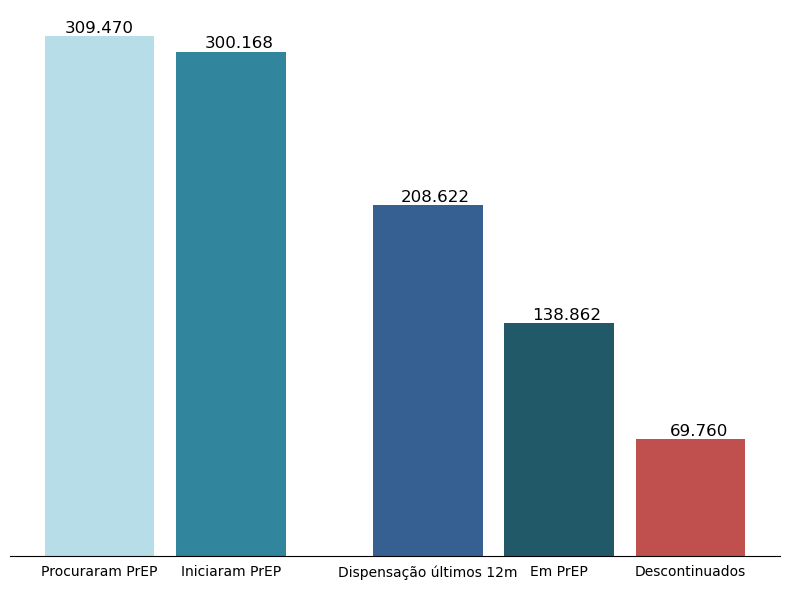

In [268]:
PrEP_graficos = PrEP.copy()

# Filtrar apenas os registros com "Dispensação últimos 12m" para a variável Disp_Ultimos_12m
df_disp3 = PrEP_graficos[PrEP_graficos['Disp_Ultimos_12m'] == 'Teve dispensação nos últimos 12 meses']
# Filtrar apenas os registros com "Em PrEP atualmente" para a variável EmPrEP_Atual
df_disp4 = PrEP_graficos[PrEP_graficos['EmPrEP_Atual'] == 'Em PrEP atualmente']
# Filtrar apenas os registros com "Está descontinuado" para a variável EmPrEP_Atual
df_disp5 = PrEP_graficos[PrEP_graficos['EmPrEP_Atual'] == 'Estão descontinuados']

# Contagem dos registros para Disp_Ultimos_12m
counts_disp = df_disp3['Disp_Ultimos_12m'].value_counts()
# Contagem dos registros para EmPrEP_Atual
counts_emprep = df_disp4['EmPrEP_Atual'].value_counts()
# Contagem dos registros para EmPrEP_Atual
counts_desc = df_disp5['EmPrEP_Atual'].value_counts()
# Calcular a contagem total dos registros não nulos na coluna "Disp_Ultimos_12m"
soma_disp2 = PrEP_graficos['Disp_Ultimos_12m'].notnull().sum()
# Calcular a contagem total dos registros, incluindo NaN, na coluna "Procuraram PrEP"
total_registros = len(PrEP_graficos)

# Criar figura e eixo do gráfico
fig, ax = plt.subplots(figsize=(8, 6)) 
bar_width = 0.2

# Coordenadas x para as barras
x_procuraram = -0.6  # Ajuste a posição da nova coluna "Procuraram PrEP" para a esquerda
x_total = x_procuraram + bar_width * 1.2
x_disp = np.arange(len(counts_disp.index))
x_emprep = x_disp + bar_width * 1.2  # Ajuste a posição da barra "EmPrEP_Atual"
x_desc = x_emprep + bar_width * 1.2  # Ajuste a posição da barra "Está descontinuado"


# Plotar gráfico de colunas para Procuraram PrEP
procuraram_bars = ax.bar(x_procuraram, total_registros, width=bar_width, label='Procuraram PrEP', color='#B7DEE8', edgecolor='none')
# Plotar gráfico de colunas para Disp_Ultimos_12m
disp_bars = ax.bar(x_disp, counts_disp.values, width=bar_width, label='Disp_Ultimos_12m', color='#376092', edgecolor='none')
# Plotar gráfico de colunas para EmPrEP_Atual
emprep_bars = ax.bar(x_emprep, counts_emprep.values, width=bar_width, label='EmPrEP_Atual', color='#215968', edgecolor='none')
# Plotar gráfico de colunas para EmPrEP_Atual
desc_bars = ax.bar(x_desc, counts_desc.values, width=bar_width, label='EmPrEP_Atual', color='#C0504D', edgecolor='none')
# Adicionar a barra com o valor da contagem, incluindo NaN
ax.bar(x_total, soma_disp2, width=bar_width, color='#31859C', edgecolor='none')

# Adicionar os valores acima de cada coluna com separador de milhar 
for bar in procuraram_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, '{:,.0f}'.format(height).replace(",", "."), ha='center', va='bottom', fontsize=12)
for x, bar in zip(x_disp, disp_bars):
    height = bar.get_height()
    ax.text(x + bar_width / 14, height, '{:,.0f}'.format(height).replace(",", "."), ha='center', va='bottom', fontsize=12)
for x, bar in zip(x_emprep, emprep_bars):
    height = bar.get_height()
    ax.text(x + bar_width / 14, height, '{:,.0f}'.format(height).replace(",", "."), ha='center', va='bottom', fontsize=12)
for x, bar in zip(x_desc, desc_bars):
    height = bar.get_height()
    ax.text(x + bar_width/12 , height, '{:,.0f}'.format(height).replace(",", "."), ha='center',va='bottom', fontsize=12)

    ax.text(x_total + bar_width / 14, soma_disp2 + 100, '{:,.0f}'.format(soma_disp2).replace(",", "."), ha='center', va='bottom', fontsize=12)

# Configurações adicionais
#ax.set_title('Cascata PrEP')

# Remover borda do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
# Remover números do eixo y
ax.yaxis.set_ticks([])
# Ajustar quebra de texto e orientação dos rótulos
ax.set_xticks([x_procuraram, *x_disp, *x_emprep, *x_desc, x_total])  # Configurar as posições do eixo x
ax.set_xticklabels(['Procuraram PrEP', 'Dispensação últimos 12m', 'Em PrEP', 'Descontinuados', 'Iniciaram PrEP'], rotation=0, ha='center', fontsize=10)  # Configurar os rótulos do eixo x
plt.yticks(fontsize=8)
# Remover risquinho entre a base da coluna e o rótulo
plt.tick_params(axis='x', which='both', bottom=False)
# Exibir o gráfico
plt.tight_layout()

# Save the plot as a PNG image
fig.savefig(f"PrEP_cascata.png")

In [269]:
# Filter the data where 'Disp_Ultimos_12m' is not null
df_disp3 = PrEP[PrEP['Disp_Ultimos_12m'] == 'Teve dispensação nos últimos 12 meses']
df_disp4 = PrEP[PrEP['EmPrEP_Atual'] == 'Em PrEP atualmente']
df_disp5 = PrEP[PrEP['EmPrEP_Atual'] == 'Estão descontinuados']

# Count the values for each category
counts_disp = df_disp3['Disp_Ultimos_12m'].value_counts()
counts_emprep = df_disp4['EmPrEP_Atual'].value_counts()
counts_desc = df_disp5['EmPrEP_Atual'].value_counts()
soma_disp2 = PrEP['Disp_Ultimos_12m'].notnull().sum()
total_registros = len(PrEP)

# Create a DataFrame for the counts
data_counts = {
    'Procuraram PrEP': [total_registros],
    'Iniciaram PrEP': [soma_disp2],
    'Dispensação últimos 12 meses': [counts_disp.values[0] if len(counts_disp.values) > 0 else 0],
    'Em PrEP Atual': [counts_emprep.values[0] if len(counts_emprep.values) > 0 else 0],
    'Estão descontinuados': [counts_desc.values[0] if len(counts_desc.values) > 0 else 0]
    
}

df_counts2 = pd.DataFrame(data_counts)


# Transpose the DataFrame
cascata_tab = df_counts2.transpose()

# Rename the columns
cascata_tab.columns = ['Count']

# Display the transposed DataFrame
cascata_tab


Count
Procuraram PrEP               309470
Iniciaram PrEP                300168
Dispensação últimos 12 meses  208622
Em PrEP Atual                 138862
Estão descontinuados           69760

In [270]:
# Conta o número de valores únicos na coluna 'codigo_udm'
total_udm_unicas = Disp_semdupl['codigo_udm'].nunique()

print(f"O número total de 'codigo_udm' únicos é: {total_udm_unicas}")

O número total de 'codigo_udm' únicos é: 1250


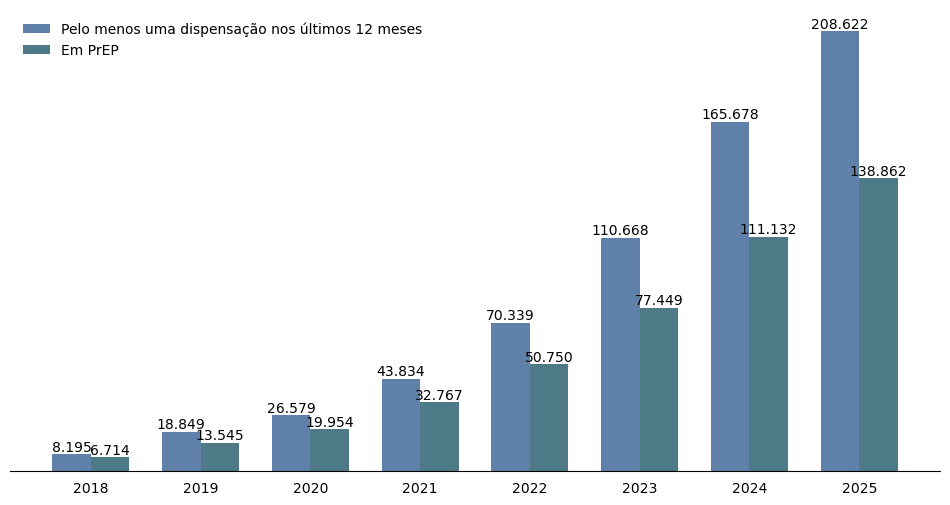

In [271]:
# Columns to consider for EmPrEP and Descontinuou

prep_columns = ["EmPrEP_" + str(ano_seq) for ano_seq in range(2018, ano)]
prep_columns.append("EmPrEP_Atual")
prep_values = ["Em PrEP " + str(ano_seq) for ano_seq in range(2018, ano)]
prep_values.append("Em PrEP atualmente")
descontinuou_values = ["Descontinuou em " + str(ano_seq) for ano_seq in range(2018, ano)]
descontinuou_values.append("Estão descontinuados")

# Initialize counts
prep_counts = []
descontinuou_counts = []

# Count each column
for prep_column, prep_value, descontinuou_value in zip(prep_columns, prep_values, descontinuou_values):
    prep_counts.append(PrEP[PrEP[prep_column] == prep_value].shape[0])
    descontinuou_counts.append(PrEP[PrEP[prep_column] == descontinuou_value].shape[0])

# Convert the counts to numpy arrays for easier manipulation
prep_counts = np.array(prep_counts)
descontinuou_counts = np.array(descontinuou_counts)

# Years
years = np.array(range(2018, ano +1))

# Plot setup
bar_width = 0.35
opacity = 0.8

# Plotting
fig, ax = plt.subplots(figsize=[12,6])

# Create the total score (usage + dispensation) bars
bars_total = ax.bar(years - bar_width / 2, 
                     prep_counts + descontinuou_counts, 
                     width=bar_width, 
                     label='Pelo menos uma dispensação nos últimos 12 meses', 
                     alpha=opacity, 
                     color='#376092')

# Create the EmPrEP usage bars
bars_usage = ax.bar(years + bar_width / 2, 
                     prep_counts, 
                     width=bar_width, 
                     label='Em PrEP', 
                     alpha=opacity, 
                     color='#215968')

# Add data labels
for bars in [bars_total, bars_usage]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 100, f'{yval:,.0f}'.replace(",", "."), ha='center', va='bottom')

# Hide the y-axis
ax.get_yaxis().set_visible(False)

# Set the x-axis labels straight
ax.set_xticks(years)
ax.legend(frameon=False)  # take out the lines around the label

# Set the title
#ax.set_title('Usuários com pelo menos uma dispensação e usuários em PrEP por ano')

# Remover borda do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

# Remover risquinho entre a base da coluna e o rótulo
plt.tick_params(axis='x', which='both', bottom=False)

# Show the plot
plt.show()

# Save the plot as a PNG image
fig.savefig(f"PrEP_emprep.png")


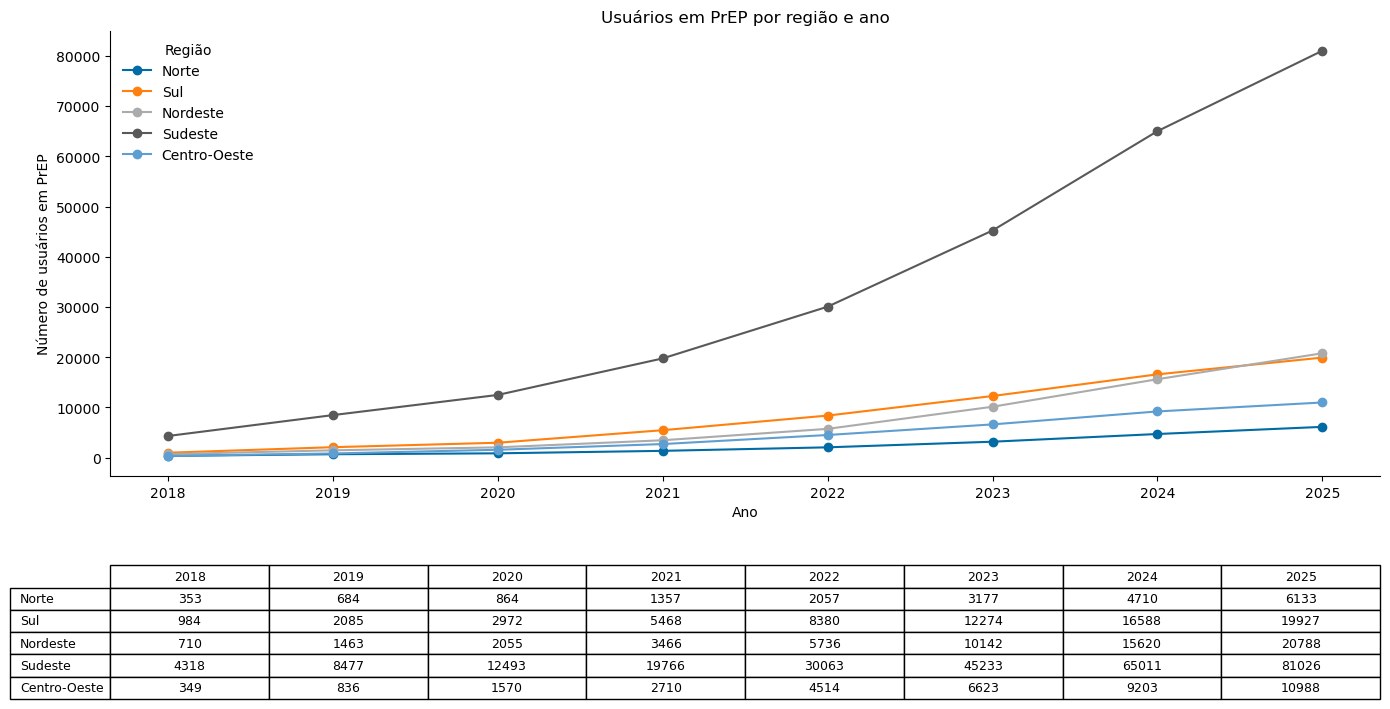

In [272]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Gerar lista de colunas e valores esperados
prep_columns = ["EmPrEP_" + str(ano_seq) for ano_seq in range(2018, ano)]
prep_columns.append("EmPrEP_Atual")
prep_values = ["Em PrEP " + str(ano_seq) for ano_seq in range(2018, ano)]
prep_values.append("Em PrEP atualmente")

# Lista de anos
anos = list(range(2018, ano + 1))
regioes = PrEP['regiao_UDM'].dropna().unique()

# Inicializar um DataFrame para armazenar os dados
data = {regiao: [] for regiao in regioes}

# Contar EmPrEP por região e ano
for col, val in zip(prep_columns, prep_values):
    for regiao in regioes:
        count = PrEP[(PrEP[col] == val) & (PrEP['regiao_UDM'] == regiao)].shape[0]
        data[regiao].append(count)

# Criar DataFrame para o gráfico
df_plot = pd.DataFrame(data, index=anos)

# Plotando
fig, ax = plt.subplots(figsize=(14, 7))

# Plotando as linhas
for i, regiao in enumerate(df_plot.columns):
    ax.plot(df_plot.index, df_plot[regiao], marker='o', label=regiao)

# Ajustes do gráfico
ax.set_title('Usuários em PrEP por região e ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de usuários em PrEP')
ax.legend(title='Região', frameon=False)
ax.spines[['top', 'right']].set_visible(False)

# Adicionando a tabela na parte inferior
table_data = df_plot.transpose().astype(int)
table = plt.table(cellText=table_data.values,
                  rowLabels=table_data.index,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0, -0.5, 1, 0.3])  # ajustar bbox conforme necessário

table.auto_set_font_size(False)
table.set_fontsize(9)

plt.subplots_adjust(bottom=0.3)  # espaço para a tabela
plt.tight_layout()

# Exibir e salvar
plt.show()
fig.savefig("prep_regioes_ano_com_tabela.png", bbox_inches='tight')

In [273]:
# Filter the data where 'st_momento_dispensa' is not null
filtered_data = PrEP[PrEP['dt_disp'].notnull()]

# Create a cross table for 'mes_pri_disp' and 'ano_pri_disp'
Novos_usuarios_tab = pd.crosstab(index=filtered_data['mes_pri_disp'], columns=filtered_data['ano_pri_disp'], margins=False)

# Define order of months
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex the dataframe to get the months in the correct order
Novos_usuarios_tab = Novos_usuarios_tab.reindex(months_order)

# Create a dictionary to map English month names to Portuguese month names
month_name_mapping = {
    'Jan': 'Jan',
    'Feb': 'Fev',
    'Mar': 'Mar',
    'Apr': 'Abr',
    'May': 'Mai',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Aug': 'Ago',
    'Sep': 'Set',
    'Oct': 'Out',
    'Nov': 'Nov',
    'Dec': 'Dez'
}

# Replace English month names with Portuguese month names
Novos_usuarios_tab.index = Novos_usuarios_tab.index.map(month_name_mapping)

# Append a total row
Novos_usuarios_tab.loc['Total'] = Novos_usuarios_tab.sum()


Novos_usuarios_tab


ano_pri_disp  2018.0  2019.0  2020.0  2021.0  2022.0  2023.0  2024.0  2025.0
mes_pri_disp                                                                
Jan              325     991    1235    1367    2279    3997    6462    7843
Fev              482    1066    1235    1524    2811    3773    5546    8059
Mar              671     870     950    1794    3303    4714    5507    6854
Abr              611    1081     364    1623    2793    3640    6513    7478
Mai              664    1079     503    1769    3302    4728    6398    7748
Jun              630     901     822    1839    2919    4597    6225    7211
Jul              683    1201    1079    1788    3134    4583    7628    8817
Ago              903    1317    1271    2378    3626    5264    7687    8505
Set              814    1032    1356    2322    3120    4589    7185    8456
Out              963    1253    1485    2300    3122    5656    8144       0
Nov              752     977    1483    2350    3125    5003    6651       0
Dez              697     765    1215    2105    3001    5253    6034       0
Total           8195   12533   12998   23159   36535   55797   79980   70971

In [274]:
# Filtering rows where 'dt_disp' is not null
PrEP_dt_disp_not_null = PrEP[PrEP['dt_disp'].notnull()]

# Crosstabulation without margins
crosstab_result = pd.crosstab(index=PrEP_dt_disp_not_null['mes_pri_disp'], 
                              columns=PrEP_dt_disp_not_null['ano_pri_disp'])

# Define order of months
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex the dataframe to get the months in the correct order
crosstab_result = crosstab_result.reindex(months_order)

# Convert the crosstab result from wide format to long format
crosstab_long = crosstab_result.reset_index().melt(id_vars='mes_pri_disp', value_name='Count')
crosstab_long.columns = ['Month', 'Year', 'Count']

# Convert 'Year' to integer and then to string for concatenation
crosstab_long['Year'] = crosstab_long['Year'].astype(int).astype(str)

# Portuguese months
months_pt = {
    'Jan': 'Jan',
    'Feb': 'Fev',
    'Mar': 'Mar',
    'Apr': 'Abr',
    'May': 'Mai',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Aug': 'Ago',
    'Sep': 'Set',
    'Oct': 'Out',
    'Nov': 'Nov',
    'Dec': 'Dez'
}

crosstab_long['Month'] = crosstab_long['Month'].map(months_pt)


In [275]:
# Find the row with the latest year and month
latest_row = crosstab_long[(crosstab_long['Year'] == str(hoje.year)) & (crosstab_long['Month'] == months_pt[hoje.strftime('%b')])]

# Get the count from the latest row
latest_month_year_count = latest_row['Count'].values[0]
# Format the count with a dot as the thousand separator
latest_month_year_count = "{:,}".format(latest_month_year_count).replace(",", ".")

# Get the month abbreviation
hoje_month_abbr = hoje.strftime('%b')


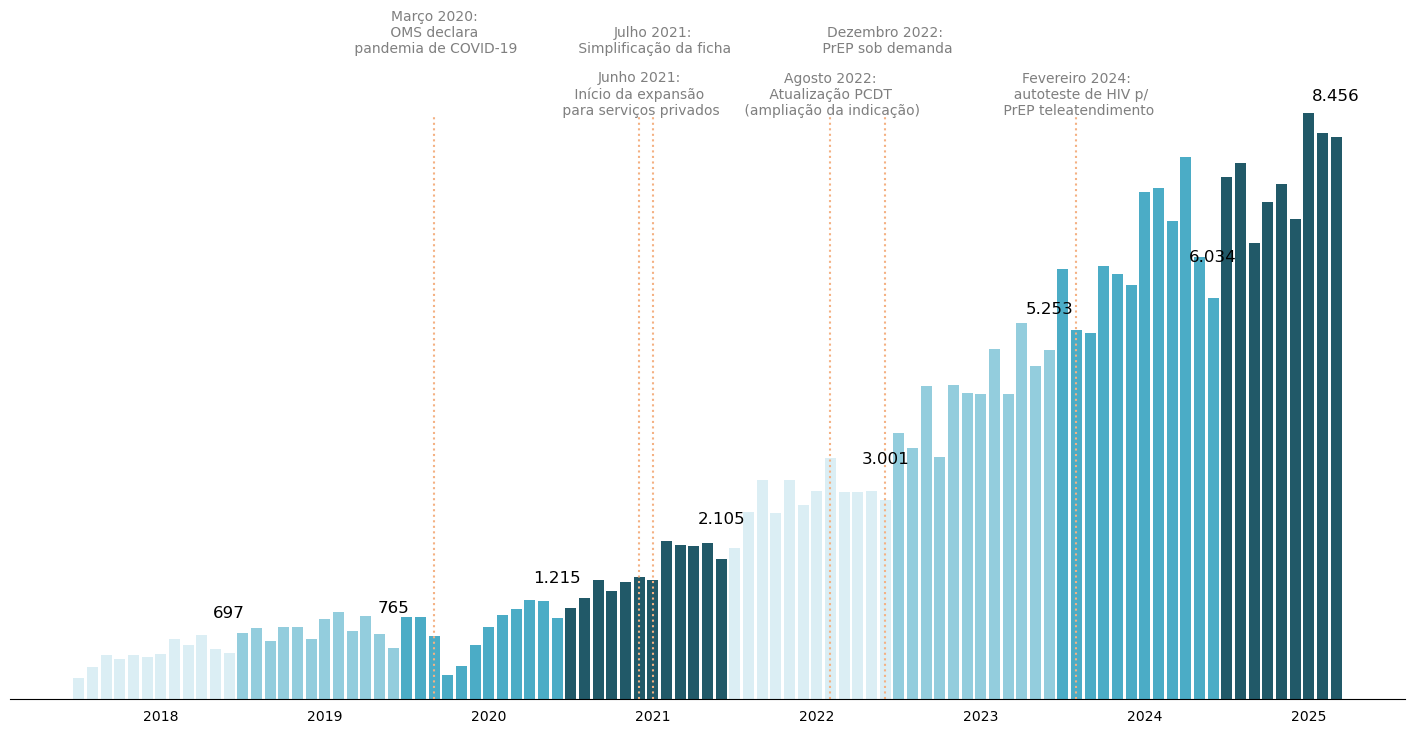

In [276]:
#### Novos Usuários

# Remove rows with zero count
crosstab_long = crosstab_long[crosstab_long['Count'] != 0]

# Plotting
fig, ax = plt.subplots(figsize=(18, 8))

# Colors (cores se repetirão automaticamente)
colors = ['#DBEEF4', '#93CDDD', '#4BACC6', '#215968']

for i, year in enumerate(crosstab_long['Year'].unique()):
    data = crosstab_long[crosstab_long['Year'] == year]
    color = colors[i % len(colors)]  # Repetir cores ciclicamente
    ax.bar(data['Month'] + " " + data['Year'], data['Count'], color=color)

# Remove y-axis
ax.yaxis.set_visible(False)
ax.grid(False)

# Display numbers on top of December bars and latest month bar
december_rows = crosstab_long[(crosstab_long['Month'] == 'Dez')].index
for i in december_rows:
    v = crosstab_long.loc[i, 'Count']
    ax.text(i, v + 500, "{:,}".format(v).replace(",", "."), color='black', ha='center',va='bottom', fontsize = 12)

# Display number on top of latest month bar
latest_month_row = crosstab_long[(crosstab_long['Year'] == str(ano)) & (crosstab_long['Month'] == months_pt[hoje_month_abbr])].index[0]
v = crosstab_long.loc[latest_month_row, 'Count']
ax.text(latest_month_row, v + 500, "{:,}".format(v).replace(",", "."), color='black', ha='center',va='bottom', fontsize = 12)

# Add vertical lines and texts
events = {
    'Mar 2020': 'Março 2020:\n OMS declara \n pandemia de COVID-19',
    'Jun 2021': 'Junho 2021:\n Início da expansão \n para serviços privados',
    'Jul 2021': 'Julho 2021:\n Simplificação da ficha',
    'Aug 2022': 'Agosto 2022:\n Atualização PCDT \n (ampliação da indicação)',
    'Dec 2022': 'Dezembro 2022:\n PrEP sob demanda',
    'Feb 2024': 'Fevereiro 2024:\n  autoteste de HIV p/\n PrEP teleatendimento'
}

offset = ax.get_ylim()[1] * 0.05  # Set offset as 5% of the y-axis range

for i, (date, text) in enumerate(events.items()):
    month, year = date.split(' ')
    month_position = crosstab_long[(crosstab_long['Month'] == months_pt[month]) & (crosstab_long['Year'] == year)].index[0]
    ax.axvline(month_position, linestyle='dotted', color='#F4B183', ymin=0, ymax=0.95)  # Change ymin and ymax to adjust the line length
    y = ax.get_ylim()[1] + offset if i % 2 == 0 else ax.get_ylim()[1] - offset  # Alternate text position
    ax.text(month_position, y, text, color='#7F7F7F', ha='center')
    
    
# Set condensed year labels
years = crosstab_long['Year'].unique()
year_positions = [i for i in range(6, len(crosstab_long['Month'].unique())*len(years), len(crosstab_long['Month'].unique()))]
plt.xticks(year_positions, years, rotation=0)

# Remove graph border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

# Remover risquinho entre a base da coluna e o rótulo
plt.tick_params(axis='x', which='both', bottom=False)

plt.show()

# Save the plot as a PNG image
fig.savefig(f"PrEP_novosusuarios.png", transparent=True,bbox_inches='tight')


In [277]:
# Get the count of 'Em PrEP atualmente' and 'Estão descontinuados' in 'EmPrEP_Atual'
em_prep_count = PrEP['EmPrEP_Atual'].value_counts().get('Em PrEP atualmente', 0)
discontinued_count = PrEP['EmPrEP_Atual'].value_counts().get('Estão descontinuados', 0)

# Get the count of 'Teve dispensação nos últimos 12 meses' in 'Disp_Ultimos_12m'
dispensation_count = PrEP['Disp_Ultimos_12m'].value_counts().get('Teve dispensação nos últimos 12 meses', 0)

# Calculate the percentages
emPrEP_porcent = (em_prep_count / dispensation_count) * 100 if dispensation_count > 0 else 0
descontinuados_porcent = (discontinued_count / dispensation_count) * 100 if dispensation_count > 0 else 0

# Format the percentages to remove the decimal place
emPrEP_porcent = round(emPrEP_porcent)
descontinuados_porcent = round(descontinuados_porcent)

# Format the counts and percentage
formatted_em_prep_count = f"{em_prep_count:,.0f}".replace(',', '.')
formatted_discontinued_count = f"{discontinued_count:,.0f}".replace(',', '.')

print(emPrEP_porcent, descontinuados_porcent)


67 33


In [278]:
# Create a subset of the DataFrame where 'EmPrEP_Atual' equals 'Em PrEP atualmente'
PrEP_current = PrEP[PrEP['EmPrEP_Atual'] == 'Em PrEP atualmente'].copy()

In [279]:
# Calculate the counts for each category
category_counts_pop = PrEP_current['Pop_genero_pratica'].value_counts().sort_values(ascending=True)
# Calculate the percentage for each category in the subset
category_percentage_pop = PrEP_current['Pop_genero_pratica'].value_counts(normalize=True) * 100

# Get the category with the highest percentage
highest_category_pop = category_percentage_pop.idxmax()

# Get the percentage and count for the highest category
highest_percentage_pop = category_percentage_pop[highest_category_pop]
highest_count_pop = category_counts_pop[highest_category_pop]

# Format 'highest_count' first and replace the comma with a dot
formatted_highest_count_pop = f"{highest_count_pop:,.0f}".replace(',', '.')

# Create the text
text_pop = f"{highest_percentage_pop:.0f}% ({formatted_highest_count_pop}) das pessoas em PrEP* eram {highest_category_pop}."


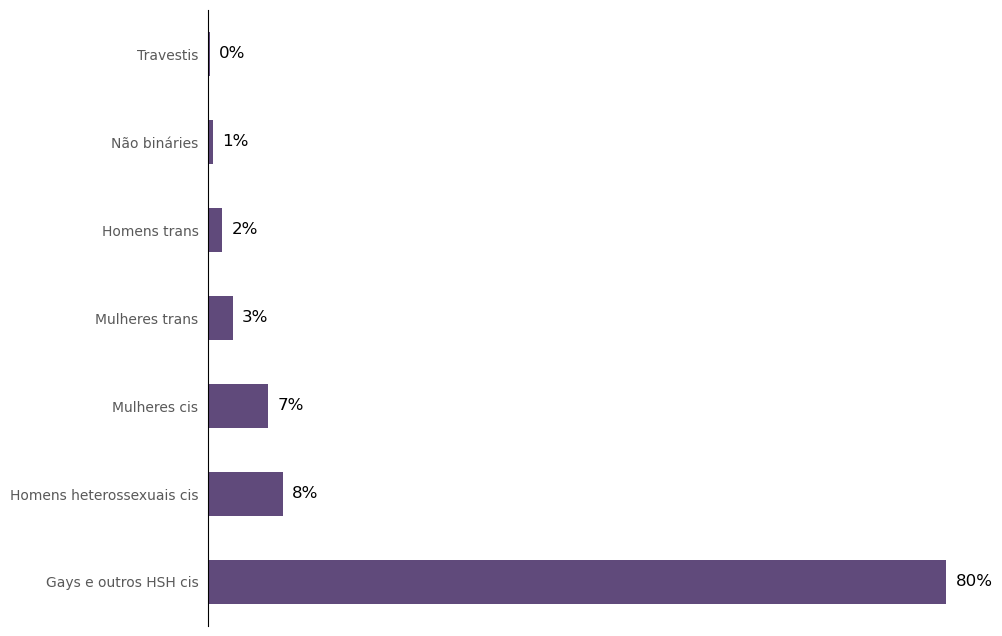

In [280]:

# Create the horizontal bar chart
plt.figure(figsize=(10,8))
ax = category_percentage_pop.sort_values(ascending=True).plot(kind='barh', color='#604A7B')
ax.tick_params(axis='y', colors='#595959')

# Remove the horizontal grid lines
ax.grid(False)
# Remove the x-axis tick labels
ax.set_xticklabels([])
# Remove the y and x axis labels
ax.set_ylabel('')
ax.set_xlabel('')

# Remove tick between the base of the column and the label
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

# Remove graph border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

# Display the percentages at the end of the bars
for i, v in enumerate(category_percentage_pop.sort_values(ascending=True)):
    ax.text(v + 1, i, f'{v:.0f}%', color='black', va='center', fontsize=12)  # Display the rounded percentage

plt.gca().invert_yaxis()

# Save the plot as a PNG image
plt.savefig(f"PrEP_pop.png", transparent=True, bbox_inches='tight')

plt.show()


In [281]:
fg.tabela_freq(PrEP_current, "Pop_genero_pratica")

Pop_genero_pratica  Freq_Val  Freq_Rel  \
Gays e outros HSH cis                111548.0  111548.0     80.33   
Homens heterossexuais cis             11295.0   11295.0      8.13   
Homens trans                           2147.0    2147.0      1.55   
Mulheres cis                           9091.0    9091.0      6.55   
Mulheres trans                         3728.0    3728.0      2.68   
Não bináries                            781.0     781.0      0.56   
Travestis                               271.0     271.0      0.20   
NaN                                       1.0       NaN      0.00   
Total                                138862.0  138861.0    100.00   

                           Freq_Rel_Val  Freq_Rel_Acum  
Gays e outros HSH cis             80.33          80.33  
Homens heterossexuais cis          8.13          88.46  
Homens trans                       1.55          90.01  
Mulheres cis                       6.55          96.56  
Mulheres trans                     2.68          99.24  
Não bináries                       0.56          99.80  
Travestis                          0.20         100.00  
NaN                                 NaN            NaN  
Total                            100.00            NaN

In [282]:
# First, get the frequency table
Pop_tab = fg.tabela_freq(PrEP_current, "Pop_genero_pratica")

# Then replace the numbers with the labels
Pop_tab.index = pd.Series(Pop_tab.index).replace(category_mapping_pop).values

# If you have a total row, you can temporarily remove it
total_row = None
if 'Total' in Pop_tab.index:
    total_row = Pop_tab.loc['Total']
    Pop_tab = Pop_tab.drop('Total')

# Sort the DataFrame by the desired column in descending order
Pop_tab_sorted = Pop_tab.sort_values(by='Pop_genero_pratica', ascending=False)  

# If you removed the total row, you can add it back in
if total_row is not None:
    Pop_tab_sorted.loc['Total'] = total_row

Pop_tab_sorted


Pop_genero_pratica  Freq_Val  Freq_Rel  \
Gays e outros HSH cis                111548.0  111548.0     80.33   
Homens heterossexuais cis             11295.0   11295.0      8.13   
Mulheres cis                           9091.0    9091.0      6.55   
Mulheres trans                         3728.0    3728.0      2.68   
Homens trans                           2147.0    2147.0      1.55   
Não bináries                            781.0     781.0      0.56   
Travestis                               271.0     271.0      0.20   
NaN                                       1.0       NaN      0.00   
Total                                138862.0  138861.0    100.00   

                           Freq_Rel_Val  Freq_Rel_Acum  
Gays e outros HSH cis             80.33          80.33  
Homens heterossexuais cis          8.13          88.46  
Mulheres cis                       6.55          96.56  
Mulheres trans                     2.68          99.24  
Homens trans                       1.55          90.01  
Não bináries                       0.56          99.80  
Travestis                          0.20         100.00  
NaN                                 NaN            NaN  
Total                            100.00            NaN

In [283]:
anos = list(range(2018, 2026))  # Ajuste conforme seus dados
colunas = [f'EmPrEP_{ano}' for ano in anos]

# Inicializa um DataFrame vazio para os resultados
tabela = pd.DataFrame(index=PrEP['Pop_genero_pratica'].unique())

# Para cada ano, conta o número de pessoas em PrEP naquela categoria
for col in colunas:
    contagem = PrEP[PrEP[col] == f'Em PrEP {col[-4:]}']['Pop_genero_pratica'].value_counts()
    tabela[col] = contagem

# Preenche com zero os valores ausentes
tabela = tabela.fillna(0).astype(int)

# Ordena as linhas
tabela = tabela.sort_index()

tabela


EmPrEP_2018  EmPrEP_2019  EmPrEP_2020  EmPrEP_2021  \
Gays e outros HSH cis             5543        11132        16732        27819   
Homens heterossexuais cis          309          618          839         1396   
Homens trans                        90          186          240          376   
Mulheres cis                       549         1156         1503         2091   
Mulheres trans                     184          387          557          937   
Não bináries                         2            4           11           29   
Travestis                           37           62           72          119   
NaN                                  0            0            0            0   

                           EmPrEP_2022  EmPrEP_2023  EmPrEP_2024  EmPrEP_2025  
Gays e outros HSH cis            42715        63638        90621       111548  
Homens heterossexuais cis         2538         4988         8090        11295  
Homens trans                       599         1361         1772         2147  
Mulheres cis                      2898         4505         6714         9091  
Mulheres trans                    1645         2396         3105         3728  
Não bináries                       199          348          586          781  
Travestis                          156          212          243          271  
NaN                                  0            0            0            0

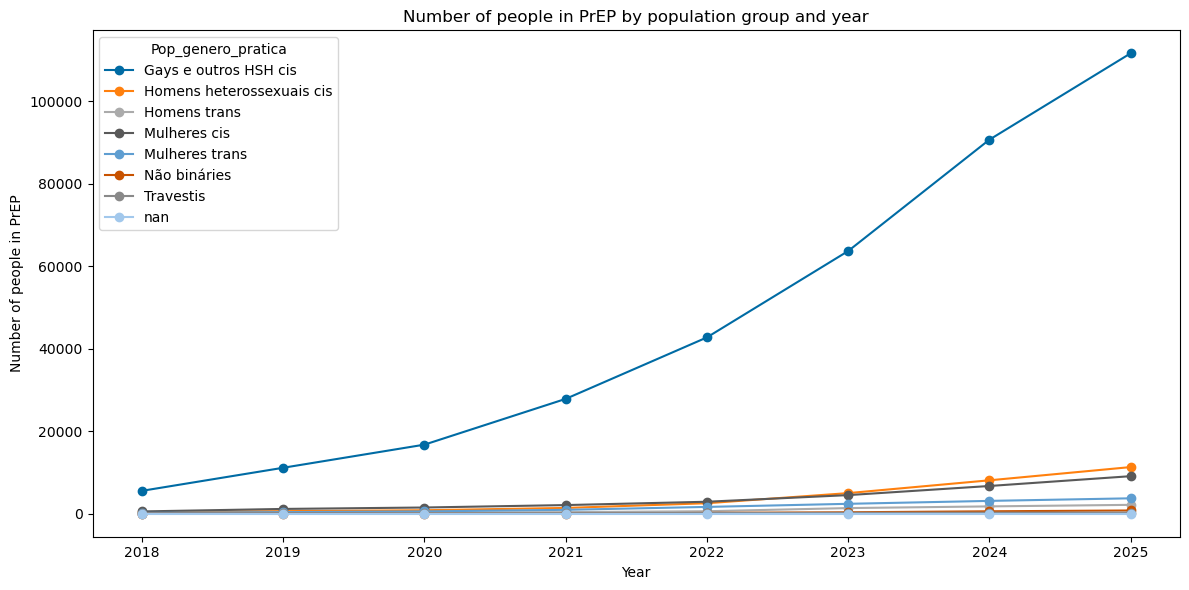

In [284]:
# Extrai apenas o ano das colunas
anos = [int(col[-4:]) for col in tabela.columns]

plt.figure(figsize=(12,6))
for pop in tabela.index:
    plt.plot(
        anos, 
        tabela.loc[pop], 
        marker='o', 
        label=pop
    )

plt.xlabel('Year')
plt.ylabel('Number of people in PrEP')
plt.title('Number of people in PrEP by population group and year')
plt.legend(title='Pop_genero_pratica')
plt.tight_layout()
plt.show()


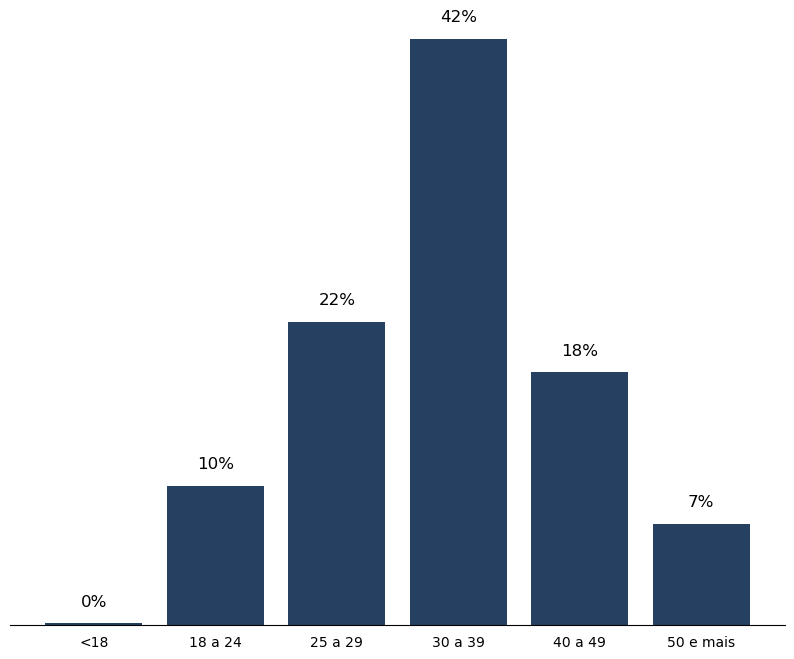

In [285]:

# Define the order of the categories
order = ['<18', '18 a 24', '25 a 29', '30 a 39', '40 a 49', '50 e mais']

# Calculate the counts for each category
category_counts_fetar = PrEP_current['fetar'].value_counts().sort_values(ascending=True)
# Recalculate the percentages for each category in the subset
category_percentage_fetar = PrEP_current['fetar'].value_counts(normalize=True)*100
category_percentage_fetar = category_percentage_fetar.reindex(order)

# Create the column chart
fig, ax = plt.subplots(figsize=(10,8))

# Bar colors
colors = ['#254061']*len(category_percentage_fetar)

bars = ax.bar(category_percentage_fetar.index, category_percentage_fetar, color=colors)

# Remove the horizontal grid lines
ax.grid(False)

# Remove the y axis labels
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

# Remove graph border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

# Remove tick between the base of the column and the label
plt.tick_params(axis='x', which='both', bottom=False)

# Display the percentages at the top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{round(yval)}%', ha='center', va='bottom', fontsize=12)

# Save the plot as a PNG image
plt.savefig(f"PrEP_fetar.png", transparent=True, bbox_inches='tight')

plt.show()


In [286]:
Fetar_tab = fg.tabela_freq(PrEP_current,"fetar")
Fetar_tab

fetar  Freq_Val  Freq_Rel  Freq_Rel_Val  Freq_Rel_Acum
<18           247.0     247.0      0.18          0.18           0.18
18 a 24     13993.0   13993.0     10.08         10.08          10.25
25 a 29     30402.0   30402.0     21.89         21.89          32.15
30 a 39     58731.0   58731.0     42.29         42.29          74.44
40 a 49     25312.0   25312.0     18.23         18.23          92.67
50 e mais   10177.0   10177.0      7.33          7.33         100.00
Total      138862.0  138862.0    100.00        100.00            NaN

In [287]:
# Get the category with the highest percentage
highest_category_fetar = category_percentage_fetar.idxmax()

# Get the percentage and count for the highest category
highest_percentage_fetar = category_percentage_fetar[highest_category_fetar]
highest_count_fetar = category_counts_fetar[highest_category_fetar]

# Format 'highest_count' first and replace the comma with a dot
formatted_highest_count_fetar = f"{highest_count_fetar:,.0f}".replace(',', '.')

# Create the text
text_fetar = f"{highest_percentage_fetar:.0f}% ({formatted_highest_count_fetar}) das pessoas em PrEP* tinham de {highest_category_fetar} anos de idade."

print(text_fetar)

42% (58.731) das pessoas em PrEP* tinham de 30 a 39 anos de idade.


In [288]:
# Define the categories for young people
young_categories = ['18 a 24', '25 a 29']

# Get the counts of young people
young_counts = PrEP_current.loc[PrEP_current['fetar'].isin(young_categories), 'fetar'].value_counts().sum()

# Calculate the percentage of young people from the total
young_percentage = young_counts / len(PrEP_current) * 100

# Format the counts and percentage
formatted_young_counts = f"{young_counts:,.0f}".replace(',', '.')
formatted_young_percentage = f"{young_percentage:.0f}"

# Create the sentence
sentence = f"Os jovens (18 a 29 anos) representavam {formatted_young_percentage}% dos usuários ({formatted_young_counts})."

sentence

'Os jovens (18 a 29 anos) representavam 32% dos usuários (44.395).'

In [289]:
PrEP_current['idade_disp'].describe()

count    138862.0
mean      34.6959
std      9.361472
min           2.0
25%          28.0
50%          33.0
75%          40.0
max         233.0
Name: idade_disp, dtype: Float64

In [290]:
# Calculate the median age
median_age = round(PrEP_current['idade_disp'].median())

# Create the sentence
sentence_age = f"A mediana de idade é de {median_age} anos."

sentence_age

'A mediana de idade é de 33 anos.'

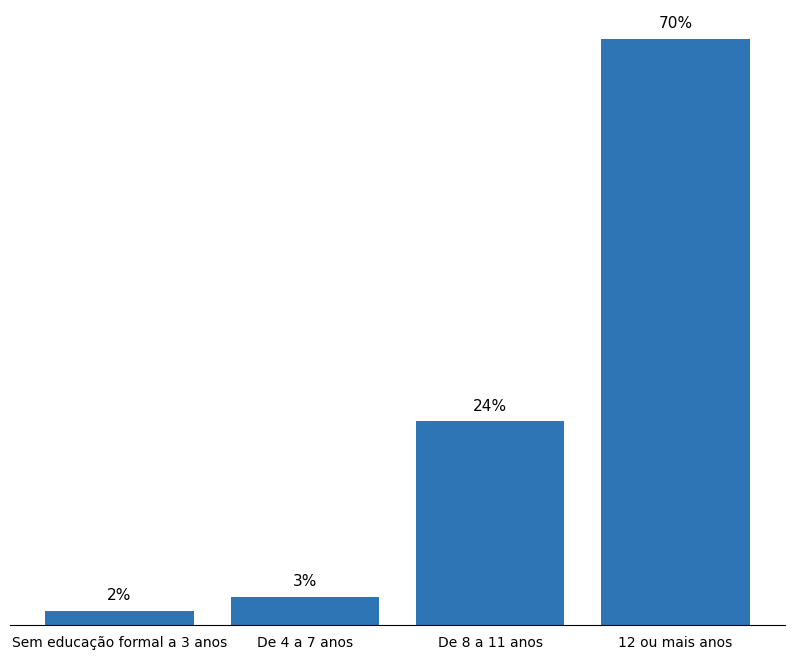

In [291]:
# Define the order of the categories
order = ["Sem educação formal a 3 anos", "De 4 a 7 anos", "De 8 a 11 anos", "12 ou mais anos"]

# Calculate the counts for each category
category_counts_escol4 = PrEP_current['escol4'].value_counts().sort_values(ascending=True)
# Recalculate the percentages for each category in the subset
category_percentage_escol4 = PrEP_current['escol4'].value_counts(normalize=True)*100
category_percentage_escol4 = category_percentage_escol4.reindex(order)

# Create the column chart
fig, ax = plt.subplots(figsize=(10,8))

# Bar colors
colors = ['#2E75B6']*len(category_percentage_escol4)

bars = ax.bar(category_percentage_escol4.index, category_percentage_escol4, color=colors)

# Remove the horizontal grid lines
ax.grid(False)

# Remove the y axis labels
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

# Remove graph border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

# Remove tick between the base of the column and the label
plt.tick_params(axis='x', which='both', bottom=False)

# Display the percentages at the top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{round(yval)}%', ha='center', va='bottom', fontsize=11)

# Save the plot as a PNG image
plt.savefig(f"PrEP_escol4.png", transparent=True, bbox_inches='tight')

plt.show()


In [292]:
# Define the order of the categories
order = ["Sem educação formal a 3 anos", "De 4 a 7 anos", "De 8 a 11 anos", "12 ou mais anos", "Ignorada/Não informada"]

# First, get the frequency table
Escol_tab1 = fg.tabela_freq(PrEP_current, "escol4")

# Reorder the DataFrame by the specified order
Escol_tab = Escol_tab1.reindex(order)

Escol_tab.loc['Total'] = Escol_tab.sum()

Escol_tab


escol4  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Sem educação formal a 3 anos    2374.0    2374.0      1.71          1.71   
De 4 a 7 anos                   4707.0    4707.0      3.39          3.39   
De 8 a 11 anos                 33978.0   33978.0     24.47         24.47   
12 ou mais anos                97791.0   97791.0     70.42         70.42   
Ignorada/Não informada            12.0      12.0      0.01          0.01   
Total                         138862.0  138862.0    100.00        100.00   

                              Freq_Rel_Acum  
Sem educação formal a 3 anos         100.00  
De 4 a 7 anos                         73.81  
De 8 a 11 anos                        98.28  
12 ou mais anos                       70.42  
Ignorada/Não informada                98.29  
Total                                440.80

In [293]:
# Get the category with the highest percentage
highest_category_escol = category_percentage_escol4.idxmax()

# Get the percentage and count for the highest category
highest_percentage_escol = category_percentage_escol4[highest_category_escol]
highest_count_escol = category_counts_escol4[highest_category_escol]

# Format 'highest_count' first and replace the comma with a dot
formatted_highest_count_escol = f"{highest_count_escol:,.0f}".replace(',', '.')

# Create the text
text_escol = f"{highest_percentage_escol:.0f}% ({formatted_highest_count_escol}) das pessoas em PrEP tinham {highest_category_escol} de estudo."

print(text_escol)

70% (97.791) das pessoas em PrEP tinham 12 ou mais anos de estudo.


In [294]:
# Calculate the counts for each category
category_counts_raca = PrEP_current['raca4_cat'].value_counts().sort_values(ascending=True)
# Calculate the percentage for each category in the subset
category_percentage_raca = PrEP_current['raca4_cat'].value_counts(normalize=True) * 100

# Get the category with the highest percentage
highest_category_raca = category_percentage_raca.idxmax()

# Get the percentage and count for the highest category
highest_percentage_raca = category_percentage_raca[highest_category_raca]
highest_count_raca = category_counts_raca[highest_category_raca]

# Format 'highest_count' first and replace the comma with a dot
formatted_highest_count_raca = f"{highest_count_raca:,.0f}".replace(',', '.')

# Create the text
text_raca = f"{highest_percentage_raca:.0f}% ({formatted_highest_count_raca}) das pessoas em PrEP autodeclararam-se {highest_category_raca}."

print (text_raca)

54% (75.022) das pessoas em PrEP autodeclararam-se Branca/Amarela.


In [295]:
PrEP_current['raca'].value_counts()

raca
Branca      73683
Parda       45179
Preta       18146
Amarela      1339
Indígena      509
-               6
Name: count, dtype: int64

In [296]:
PrEP_current['regiao_UDM'].value_counts()

regiao_UDM
Sudeste         81026
Nordeste        20788
Sul             19927
Centro-Oeste    10988
Norte            6133
Name: count, dtype: int64

In [297]:
# First, get the frequency table
Raca_tab = fg.tabela_freq(PrEP_current, "raca4_cat")



# If you have a total row, you can temporarily remove it
total_row = None
if 'Total' in Raca_tab.index:
    total_row = Raca_tab.loc['Total']
    Raca_tab = Raca_tab.drop('Total')

# Sort the DataFrame by the desired column in descending order
Raca_tab_sorted = Raca_tab.sort_values(by='raca4_cat', ascending=False)  

# If you removed the total row, you can add it back in
if total_row is not None:
    Raca_tab_sorted.loc['Total'] = total_row

Raca_tab_sorted


raca4_cat  Freq_Val  Freq_Rel  Freq_Rel_Val  \
Branca/Amarela            75022.0   75022.0     54.03         54.03   
Parda                     45179.0   45179.0     32.54         32.54   
Preta                     18146.0   18146.0     13.07         13.07   
Indígena                    509.0     509.0      0.37          0.37   
Ignorada/Não informada        6.0       6.0      0.00          0.00   
Total                    138862.0  138862.0    100.01        100.01   

                        Freq_Rel_Acum  
Branca/Amarela                  54.03  
Parda                           86.93  
Preta                          100.00  
Indígena                        54.40  
Ignorada/Não informada          54.03  
Total                             NaN

In [298]:
# Define the categories for "Preta" and "Parda"
raca_negra = ["Parda", "Preta"]

# Calculate the total counts for "Parda" and "Preta"
raca_negra_counts = PrEP_current.loc[PrEP_current['raca4_cat'].isin(raca_negra), 'raca4_cat'].value_counts().sum()

# Calculate the percentage of "Parda" and "Preta" from the total
raca_negra_percentage = raca_negra_counts / PrEP_current['raca4_cat'].notna().sum() * 100

# Format the counts and percentage
formatted_raca_negra_counts = f"{raca_negra_counts:,.0f}".replace(',', '.')
formatted_raca_negra_percentage = f"{raca_negra_percentage:.0f}"

# Create the sentence
sentence_raca = f"Pessoas negras (pretas + pardas) representaram {formatted_raca_negra_percentage}% ({formatted_raca_negra_counts}) dos(as) usuários(as) em PrEP."
sentence_raca

'Pessoas negras (pretas + pardas) representaram 46% (63.325) dos(as) usuários(as) em PrEP.'

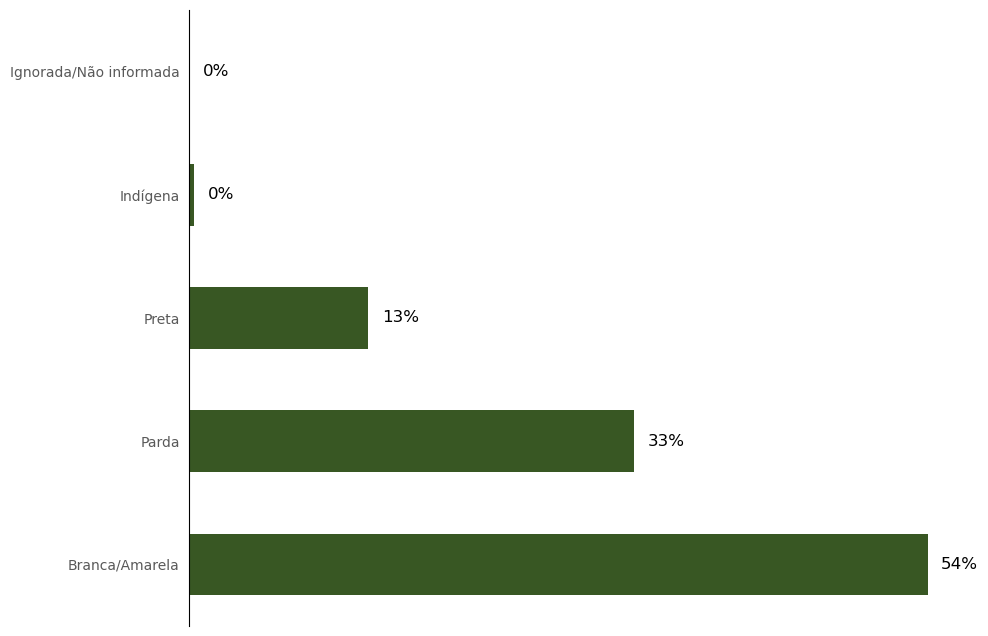

In [299]:

# Create the horizontal bar chart
plt.figure(figsize=(10,8))
ax = category_percentage_raca.sort_values(ascending=True).plot(kind='barh', color='#385723')
ax.tick_params(axis='y', colors='#595959')

# Remove the horizontal grid lines
ax.grid(False)
# Remove the x-axis tick labels
ax.set_xticklabels([])
# Remove the y and x axis labels
ax.set_ylabel('')
ax.set_xlabel('')

# Remove tick between the base of the column and the label
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

# Remove graph border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

# Display the percentages at the end of the bars
for i, v in enumerate(category_percentage_raca.sort_values(ascending=True)):
    ax.text(v + 1, i, f'{v:.0f}%', color='black', va='center', fontsize=12)  # Display the rounded percentage

plt.gca().invert_yaxis()

# Save the plot as a PNG image
plt.savefig(f"PrEP_raca.png", transparent=True, bbox_inches='tight')

plt.show()


In [300]:
## tabela de usuários(as) com pelo menos uma disp nos últimos 12 meses e nº em PrEP

# Columns to consider for EmPrEP and Descontinuou
prep_columns = ["EmPrEP_" + str(ano_seq) for ano_seq in range(2018, ano)]
prep_columns.append("EmPrEP_Atual")
prep_values = ["Em PrEP " + str(ano_seq) for ano_seq in range(2018, ano)]
prep_values.append("Em PrEP atualmente")
descontinuou_values = ["Descontinuou em " + str(ano_seq) for ano_seq in range(2018, ano)]
descontinuou_values.append("Estão descontinuados")

# Initialize counts
prep_counts = []
descontinuou_counts = []

# Count each column
for prep_column, prep_value, descontinuou_value in zip(prep_columns, prep_values, descontinuou_values):
    prep_counts.append(PrEP[PrEP[prep_column] == prep_value].shape[0])
    descontinuou_counts.append(PrEP[PrEP[prep_column] == descontinuou_value].shape[0])

# Convert the counts to numpy arrays for easier manipulation
prep_counts = np.array(prep_counts)
descontinuou_counts = np.array(descontinuou_counts)

# Years
years = np.array(range(2018,ano+1))
# Create a DataFrame
table_data = {
    'Ano': years,
    'Pelo menos uma dispensação nos últimos 12 meses': [p + d for p, d in zip(prep_counts, descontinuou_counts)],
    'Em PrEP': prep_counts
}

EmPrEP_tab = pd.DataFrame(table_data)

EmPrEP_tab['% Em PrEP'] = ((EmPrEP_tab['Em PrEP'] / EmPrEP_tab['Pelo menos uma dispensação nos últimos 12 meses']) * 100).round(1)

# Display the DataFrame
print(EmPrEP_tab)



    Ano  Pelo menos uma dispensação nos últimos 12 meses  Em PrEP  % Em PrEP
0  2018                                             8195     6714       81.9
1  2019                                            18849    13545       71.9
2  2020                                            26579    19954       75.1
3  2021                                            43834    32767       74.8
4  2022                                            70339    50750       72.2
5  2023                                           110668    77449       70.0
6  2024                                           165678   111132       67.1
7  2025                                           208622   138862       66.6


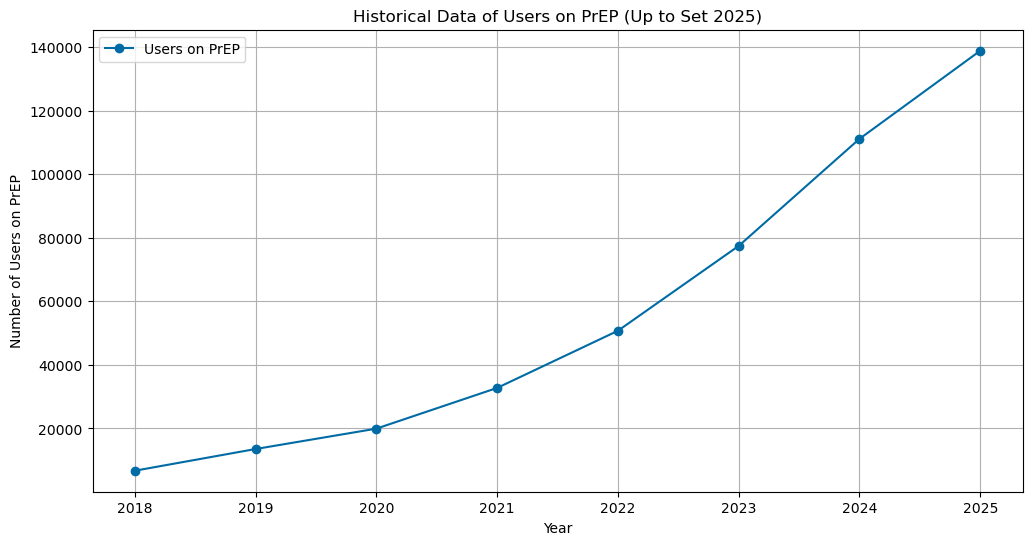

Em PrEP
Year         
2018     6714
2019    13545
2020    19954
2021    32767
2022    50750
2023    77449
2024   111132
2025   138862

In [301]:
# Years
years = np.array(range(2018,ano+1))

# Create a DataFrame for EmPrEP counts
EmPrEP_counts_df = pd.DataFrame({'Year': years, 'Em PrEP': prep_counts})
EmPrEP_counts_df.set_index('Year', inplace=True)

# Plotting the historical data for EmPrEP counts
plt.figure(figsize=(12, 6))
plt.plot(EmPrEP_counts_df.index, EmPrEP_counts_df['Em PrEP'], label='Users on PrEP', marker='o')
plt.title(f'Historical Data of Users on PrEP (Up to {mes_nome} {ano})')
plt.xlabel('Year')
plt.ylabel('Number of Users on PrEP')
plt.legend()
plt.grid(True)
plt.show()

# Returning the historical data
EmPrEP_counts_df


In [302]:
# Group data by 'regiao_UDM', 'UF_UDM', and 'Cod_UF'
grouped_data = PrEP.groupby(['regiao_UDM', 'UF_UDM', 'Cod_UF'])

# Calculate 'dispensation_count', 'em_prep_count' and 'descontinuados_count' for each group
dispensation_count = grouped_data['Disp_Ultimos_12m'].apply(lambda x: (x == 'Teve dispensação nos últimos 12 meses').sum())
em_prep_count = grouped_data['EmPrEP_Atual'].apply(lambda x: (x == 'Em PrEP atualmente').sum())
descontinuados_count = grouped_data['EmPrEP_Atual'].apply(lambda x: (x == 'Estão descontinuados').sum())

# Concatenate 'dispensation_count', 'em_prep_count' and 'descontinuados_count' into a DataFrame
UF_tab = pd.concat([dispensation_count, em_prep_count, descontinuados_count], axis=1)
UF_tab.columns = ['dispensation_count', 'em_prep_count', 'descontinuados_count']

# Calculate the percentage and round it
UF_tab['percentage'] = (UF_tab['em_prep_count'] / UF_tab['dispensation_count'] * 100).round(0)

# Reset index to remove multi-index
UF_tab = UF_tab.reset_index()

# Group Disp_semdupl data by 'UF_UDM'
grouped_disp = Disp_semdupl.groupby(['UF_UDM'])

# Calculate 'disp_total' for each group
disp_total = grouped_disp.size()

# Convert disp_total to DataFrame and reset its index
disp_total_df = disp_total.reset_index()
disp_total_df.columns = ['UF_UDM', 'disp_total']

# Merge disp_total_df with UF_tab
UF_tab = pd.merge(UF_tab, disp_total_df, on='UF_UDM', how='left')

# Reorder the columns and sort by 'Cod_UF'
UF_tab = UF_tab[['Cod_UF', 'regiao_UDM', 'UF_UDM', 'disp_total', 'dispensation_count', 'em_prep_count', 'descontinuados_count', 'percentage']].sort_values('Cod_UF')


# Rename the columns
UF_tab = UF_tab.rename(columns={
    'Cod_UF': 'Codigo UF',
    'regiao_UDM': 'Região',
    'UF_UDM': 'UF',
    'disp_total': 'Total de dispensas',
    'dispensation_count': 'Pelo menos uma dispensa nos últimos 12 meses',
    'em_prep_count': 'Estão em PrEP',
    'descontinuados_count': 'Descontinuados',
    'percentage': '% em PrEP'
})


UF_tab.style.hide(axis = "index")

In [303]:

# Agrupar os dados em 'PrEP' por várias colunas incluindo endereço, bairro e CEP
grouped_data = PrEP.groupby(['regiao_UDM', 'UF_UDM', 'Cod_UF', 'cod_ibge_udm', 'nome_mun_udm', 'nome_udm', 'endereco_udm', 'bairro_udm', 'cep_udm'])

# Calcular as contagens necessárias
dispensation_count = grouped_data['Disp_Ultimos_12m'].apply(lambda x: (x == 'Teve dispensação nos últimos 12 meses').sum())
em_prep_count = grouped_data['EmPrEP_Atual'].apply(lambda x: (x == 'Em PrEP atualmente').sum())
descontinuados_count = grouped_data['EmPrEP_Atual'].apply(lambda x: (x == 'Estão descontinuados').sum())

# Concatenar os resultados em um DataFrame
UF_mun_tab = pd.concat([dispensation_count, em_prep_count, descontinuados_count], axis=1)
UF_mun_tab.columns = ['dispensation_count', 'em_prep_count', 'descontinuados_count']

# Calcular a porcentagem e arredondá-la
UF_mun_tab['percentage'] = (UF_mun_tab['em_prep_count'] / UF_mun_tab['dispensation_count'] * 100).round(1)

# Resetar o índice para remover o multi-índice
UF_mun_tab = UF_mun_tab.reset_index()

# Agrupar os dados em 'Disp_semdupl' por 'nome_udm'
grouped_disp = Disp_semdupl.groupby(['nome_udm'])

# Calcular 'disp_total' para cada grupo
disp_total = grouped_disp.size()

# Converter 'disp_total' para DataFrame e resetar seu índice
disp_total_df = disp_total.reset_index()
disp_total_df.columns = ['nome_udm', 'disp_total']

# Mesclar 'disp_total_df' com 'UF_mun_tab'
UF_mun_tab = pd.merge(UF_mun_tab, disp_total_df, on='nome_udm', how='left')

# Reordenar as colunas e ordenar por 'cod_ibge_udm'
UF_mun_tab = UF_mun_tab[['Cod_UF', 'regiao_UDM', 'UF_UDM', 'cod_ibge_udm', 'nome_mun_udm', 'nome_udm', 'endereco_udm', 'bairro_udm', 'cep_udm', 'disp_total', 'dispensation_count', 'em_prep_count', 'descontinuados_count', 'percentage']].sort_values('cod_ibge_udm')

# Renomear as colunas
UF_mun_tab = UF_mun_tab.rename(columns={
    'Cod_UF': 'Codigo UF',
    'regiao_UDM': 'Região',
    'UF_UDM': 'UF',
    'cod_ibge_udm': 'Código IBGE',
    'nome_mun_udm': 'Município',
    'nome_udm': 'Nome do serviço',
    'endereco_udm': 'Endereço',
    'bairro_udm': 'Bairro',
    'cep_udm': 'CEP',
    'disp_total': 'Total de dispensas',
    'dispensation_count': 'Pelo menos uma dispensa nos últimos 12 meses',
    'em_prep_count': 'Estão em PrEP',
    'descontinuados_count': 'Descontinuados',
    'percentage': '% em PrEP'
})

UF_mun_tab.style.hide(axis="index")

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import geobr

# Carregar o shape dos municípios do Brasil
municipios = geobr.read_municipality(year=2022)

# Garantir que os códigos IBGE estão como string
Disp_semdupl['cod_ibge_udm'] = Disp_semdupl['cod_ibge_udm'].astype(str)
municipios['code_muni'] = municipios['code_muni'].astype(str)

# Selecionar municípios com pelo menos uma dt_disp_min não nula
mun_com_dispensacao = Disp_semdupl.loc[Disp_semdupl['dt_disp_min'].notna(), 'cod_ibge_udm'].unique()

# Marcar esses municípios no GeoDataFrame
municipios['dispensacao'] = municipios['code_muni'].isin(mun_com_dispensacao)

# Filtrar apenas os municípios com dispensação e geometria válida
mun_disp = municipios[municipios['dispensacao']].copy()
mun_disp = mun_disp[mun_disp.geometry.notnull() & (~mun_disp.geometry.is_empty)]

# Plotar o mapa apenas se houver municípios com dispensação
if len(mun_disp) > 0:
    fig, ax = plt.subplots(figsize=(12, 12))
    municipios.plot(ax=ax, color='whitesmoke', linewidth=0)
    mun_disp.plot(ax=ax, color='#7FFFD4', linewidth=0)
    ax.set_axis_off()
    plt.title("Municípios brasileiros com pelo menos uma dispensação nos últimos 12 meses", fontsize=15)
    plt.show()
else:
    print("Nenhum município com dispensação encontrado ou geometrias inválidas.")


Nenhum município com dispensação encontrado ou geometrias inválidas.


In [305]:
# Group data by 'regiao_UDM', 'UF_UDM', 'Cod_UF', and 'ano_pri_disp'
grouped_data = PrEP.groupby(['regiao_UDM', 'UF_UDM', 'Cod_UF', 'ano_pri_disp'])

# Count number of entries for each group
group_counts = grouped_data.size()

# Reset index to remove multi-index and rename the count column
group_counts = group_counts.reset_index(name='Contagem UF')

# Pivot the data
UF_novos_usuarios = group_counts.pivot_table(index=['regiao_UDM', 'UF_UDM', 'Cod_UF'], 
                                             columns='ano_pri_disp', 
                                             values='Contagem UF', 
                                             fill_value=0)

# Reset index to remove multi-index
UF_novos_usuarios = UF_novos_usuarios.reset_index()

# Rename the columns
UF_novos_usuarios = UF_novos_usuarios.rename(columns={
    'Cod_UF': 'Codigo UF',
    'regiao_UDM': 'Região',
    'UF_UDM': 'UF',
})

# Reorder the DataFrame by 'Codigo UF'
UF_novos_usuarios = UF_novos_usuarios.sort_values(by='Codigo UF')

# Convert year columns to integer and apply formatting to use dot as thousand separator
for col in UF_novos_usuarios.columns:
    if isinstance(col, float):
        UF_novos_usuarios.rename(columns={col: int(col)}, inplace=True)
       
        UF_novos_usuarios.style.hide(axis="index")

In [306]:
# Group data by 'pop_genero_pratica' and 'ano_pri_disp'
grouped_data = PrEP.groupby(['Pop_genero_pratica', 'ano_pri_disp'])

# Count number of entries for each group
group_counts = grouped_data.size()

# Reset index to remove multi-index and rename the count column
group_counts = group_counts.reset_index(name='Count')

# Pivot the data
genero_pratica_year_counts = group_counts.pivot_table(index='Pop_genero_pratica', 
                                                      columns='ano_pri_disp', 
                                                      values='Count', 
                                                      fill_value=0)

# Define the order of categories
category_order = [
    "Gays e outros HSH cis",
    "Travestis",
    "Mulheres trans",
    "Homens trans",
    "Mulheres cis",
    "Homens heterossexuais cis",
    "Não bináries"
]

# Reorder the DataFrame by 'Pop_genero_pratica' category order
genero_pratica_year_counts = genero_pratica_year_counts.reindex(category_order)

# Convert year columns to integer and apply formatting to use dot as thousand separator
for col in genero_pratica_year_counts.columns:
    if isinstance(col, float):
        genero_pratica_year_counts.rename(columns={col: int(col)}, inplace=True)
        
genero_pratica_year_counts

ano_pri_disp               2018.0  2019.0   2020.0   2021.0   2022.0   2023.0  \
Pop_genero_pratica                                                              
Gays e outros HSH cis      6539.0  9602.0  10392.0  18695.0  28160.0  40628.0   
Travestis                    50.0    75.0     43.0     97.0    123.0    149.0   
Mulheres trans              268.0   432.0    417.0    830.0   1635.0   2102.0   
Homens trans                113.0   165.0    125.0    245.0    464.0   1468.0   
Mulheres cis                807.0  1497.0   1287.0   1975.0   3104.0   5562.0   
Homens heterossexuais cis   415.0   758.0    723.0   1291.0   2775.0   5526.0   
Não bináries                  3.0     4.0     11.0     26.0    274.0    361.0   

ano_pri_disp                2024.0   2025.0  
Pop_genero_pratica                           
Gays e outros HSH cis      55330.0  46746.0  
Travestis                    173.0    127.0  
Mulheres trans              2361.0   2037.0  
Homens trans                1270.0   1185.0  
Mulheres cis               10370.0  10204.0  
Homens heterossexuais cis   9972.0  10190.0  
Não bináries                 504.0    482.0

In [307]:
# Conta o número de valores únicos na coluna 'codigo_udm'
total_udm_unicas = Disp_semdupl['codigo_udm'].nunique()

print(f"O número total de 'codigo_udm' únicos é: {total_udm_unicas}")

O número total de 'codigo_udm' únicos é: 1250


### Banco de dispensa com caratcterísticas sociodemográficas Disp_Pop

In [308]:
PrEP.reset_index(inplace=True)
Disp_semdupl.reset_index(inplace=True)

In [309]:
# Ensure that 'codigo_pac_eleito' is present in both DataFrames and set as the index if it isn't already
PrEP.set_index('codigo_pac_eleito', inplace=True)
Disp_semdupl.set_index('codigo_pac_eleito', inplace=True)

# Merge the specified columns from PrEP to Disp_semdupl using the key variable
Disp_Pop = Disp_semdupl.merge(PrEP[['fetar', 'co_orientacao_sexual', 'co_genero', 'raca','raca4_cat','escol4','Pop_genero_pratica']], 
                                  left_index=True, right_index=True, how='left')

# Reset the index if needed
Disp_Pop.reset_index(inplace=True)


In [310]:
Pop_IBGE = pd.read_excel('M:/Arquivos Atuais/Tabelas IBGE/Mun_ibge_pop.xlsx')

# Garantir que as chaves sejam do mesmo tipo (inteiro)
Disp_Pop['cod_ibge_udm'] = pd.to_numeric(Disp_Pop['cod_ibge_udm'], errors='coerce')
Pop_IBGE['codigo_ibge_resid'] = pd.to_numeric(Pop_IBGE['codigo_ibge_resid'], errors='coerce')

# Merge
Disp_Pop = Disp_Pop.merge(
    Pop_IBGE[['codigo_ibge_resid', 'Populacao']],
    left_on='cod_ibge_udm',
    right_on='codigo_ibge_resid',
    how='left'
).drop(columns='codigo_ibge_resid')

# Preencher ausentes com 0 e garantir inteiro
Disp_Pop['Populacao'] = Disp_Pop['Populacao'].fillna(0).astype(int)


In [311]:
# 1) População por UF somando por município único
pop_uf = (
    Disp_Pop[['UF_UDM', 'cod_ibge_udm', 'Populacao']]
    .drop_duplicates(['cod_ibge_udm'])
    .groupby('UF_UDM', as_index=False)['Populacao'].sum()
    .rename(columns={'Populacao': 'pop_UF'})
)

# 2) Pessoas em PrEP por UF em 2025 (contando linhas conforme você pediu)
prep_counts = (
    Disp_Pop[Disp_Pop['EmPrEP_2025'].eq('Em PrEP 2025')]
    .groupby('UF_UDM', as_index=False)['codigo_paciente'].nunique()
    .rename(columns={'codigo_paciente': 'pessoas_prep_2025'}))

# 3) Juntar e calcular a taxa por 100.000
taxa_uf = (
    prep_counts.merge(pop_uf, on='UF_UDM', how='left')
)
taxa_uf['taxa_PrEP_100k'] = (taxa_uf['pessoas_prep_2025'] / taxa_uf['pop_UF'] * 100000).round(2)

taxa_uf.sort_values('UF_UDM', inplace=True)
taxa_uf


UF_UDM  pessoas_prep_2025    pop_UF  taxa_PrEP_100k
0      AC                234    594314           39.37
1      AL                684   1335385           51.22
2      AM               2446   2504437           97.67
3      AP                369    612902           60.21
4      BA               5374   6738317           79.75
5      CE               5439   4750869          114.48
6      DF               4226   2817068          150.01
7      ES               2556   2935342           87.08
8      GO               4171   3976002          104.90
9      MA               1496   2779663           53.82
10     MG              11052  11291141           97.88
11     MS               1704   1839130           92.65
12     MT               1803   2450547           73.58
13     PA               2425   4996434           48.53
14     PB               1290   1572905           82.01
15     PE               4334   5583757           77.62
16     PI               1044   1277196           81.74
17     PR               7084   7323251           96.73
18     RJ              17662  13711046          128.82
19     RN               1925   1691300          113.82
20     RO                551   1074600           51.27
21     RR                345    509150           67.76
22     RS               6591   7278846           90.55
23     SC               7814   5633809          138.70
24     SE                727   1001762           72.57
25     SP              53595  37157207          144.24
26     TO                453    623537           72.65

In [312]:
UF_tb=pd.crosstab(index=Disp_Pop['UF_UDM'], columns=Disp_Pop['ano_disp'], margins=True, margins_name="Total")
Fetar_tb=pd.crosstab(index=Disp_Pop['fetar'], columns=Disp_Pop['ano_disp'], margins=True, margins_name="Total")
Genero_tb=pd.crosstab(index=Disp_Pop['co_genero'], columns=Disp_Pop['ano_disp'], margins=True, margins_name="Total")
Orientacao_tb=pd.crosstab(index=Disp_Pop['co_orientacao_sexual'], columns=Disp_Pop['ano_disp'], margins=True, margins_name="Total")

In [313]:
# Filtra apenas as primeiras dispensas
df_prim_disp = Disp_Pop[Disp_Pop['prim_disp'] == 1]

# Cria a tabela cruzada
tabela_ist = pd.crosstab(df_prim_disp['Pop_genero_pratica'], df_prim_disp['IST_autorrelato'], dropna=False)

tabela_ist


IST_autorrelato            Alguma IST autorrelatada  \
Pop_genero_pratica                                    
Gays e outros HSH cis                          6098   
Homens heterossexuais cis                      1065   
Homens trans                                    136   
Mulheres cis                                   1296   
Mulheres trans                                  374   
Não bináries                                     67   
Travestis                                        32   
NaN                                               0   

IST_autorrelato            Nenhuma IST autorrelatada    NaN  
Pop_genero_pratica                                           
Gays e outros HSH cis                         118616  91574  
Homens heterossexuais cis                      22746   7892  
Homens trans                                    2815   2168  
Mulheres cis                                   22744  10785  
Mulheres trans                                  4862   5039  
Não bináries                                    1065    541  
Travestis                                        337    470  
NaN                                                4     36

In [314]:
# Filtra apenas as primeiras dispensas
df_prim_disp = Disp_Pop[Disp_Pop['prim_disp'] == 1]

# Cria a tabela cruzada
tabela_ist2 = pd.crosstab(df_prim_disp['fetar'], df_prim_disp['IST_autorrelato'], dropna=False)

tabela_ist2

IST_autorrelato  Alguma IST autorrelatada  Nenhuma IST autorrelatada
fetar                                                               
NaN                                     0                          4
<18                                    99                       1038
18 a 24                              2255                      30991
25 a 29                              2411                      43242
30 a 39                              2869                      61606
40 a 49                              1018                      25100
50 e mais                             416                      11208

In [315]:
Disp_Pop['prim_disp'].value_counts()

prim_disp
0    1233575
1     300762
Name: count, dtype: int64

In [316]:
df_prim_disp["st_sifilis"].value_counts()

st_sifilis
1.0    4894
Name: count, dtype: int64

In [317]:
# Filtra apenas as primeiras dispensas
df_prim_disp = Disp_Pop[Disp_Pop['prim_disp'] == 1]

# Cria a tabela cruzada
tabela_sifilis = pd.crosstab(df_prim_disp['Pop_genero_pratica'], df_prim_disp['st_sifilis'], dropna=False)

tabela_sifilis

st_sifilis                  1.0     NaN
Pop_genero_pratica                     
Gays e outros HSH cis      3479  212809
Homens heterossexuais cis   435   31268
Homens trans                 65    5054
Mulheres cis                584   34241
Mulheres trans              270   10005
Não bináries                 41    1632
Travestis                    20     819
NaN                           0      40

In [318]:
PrEP.reset_index(drop=False, inplace=True)

In [319]:
PrEP.drop(columns=["level_0"], inplace=True)


## Pessoas que entraram em PrEP e depois tiveram diagnóstico de TARV

In [320]:
#Lista de colunas para cálculo da data mínima [data_min_PVHA]
# ["data_coleta_cd4_Prim", "data_coleta_cv_Prim", "data_sol_cd4_Prim", "data_sol_cv_Prim", "data_dispensa_Prim"]
        

In [321]:
# Selecionar apenas linhas com dt_min_BANCO preenchido e eliminar duplicados por Cod_unificado
DF_prim_selecionado2 = DF_prim[['Cod_unificado', 'data_dispensa_prim']].dropna(subset=['data_dispensa_prim'])
DF_prim_selecionado2 = DF_prim_selecionado2.drop_duplicates(subset='Cod_unificado', keep='first')

# Fazer o merge com base em Cod_unificado
PrEP = PrEP.merge(
    DF_prim_selecionado2,
    on='Cod_unificado',
    how='left'
)
PrEP.rename(columns={'data_dispensa_prim': 'dt_pri_tarv_vida'}, inplace=True)

In [322]:
# Certifique-se de que as colunas estão no formato datetime
PrEP['dt_disp_max'] = pd.to_datetime(PrEP['dt_disp_max'], errors='coerce')
PrEP['dt_pri_tarv_vida'] = pd.to_datetime(PrEP['dt_pri_tarv_vida'], errors='coerce')

# Calcular a diferença em dias e criar nova coluna
PrEP['dias_PrEP_TARV'] = (PrEP['dt_pri_tarv_vida'] - PrEP['dt_disp_max']).dt.days

In [323]:
# Certifique-se de que as colunas estão no formato datetime
PrEP['dt_disp_max'] = pd.to_datetime(PrEP['dt_disp_max'], errors='coerce')
PrEP['data_min_PVHA'] = pd.to_datetime(PrEP['data_min_PVHA'], errors='coerce')

# Calcular a diferença em dias e criar nova coluna
PrEP['dias_PrEP_HIV'] = (PrEP['data_min_PVHA'] - PrEP['dt_disp_max']).dt.days


In [324]:
PrEP['dias_PrEP_TARV'].describe ()

count    5533.000000
mean      186.174227
std      1164.598900
min     -9377.000000
25%        95.000000
50%       342.000000
75%       691.000000
max      2715.000000
Name: dias_PrEP_TARV, dtype: float64

In [325]:
PrEP['dias_PrEP_HIV'].describe ()

count     5857.000000
mean       -59.072051
std       1427.272525
min     -12664.000000
25%          0.000000
50%        234.000000
75%        582.000000
max       2455.000000
Name: dias_PrEP_HIV, dtype: float64

In [326]:
n_data_min_PVHA = PrEP['data_min_PVHA'].notna().sum()
n_dt_pri_tarv_vida = PrEP['dt_pri_tarv_vida'].notna().sum()

print(f"Pessoas com data_min_PVHA não nulo: {n_data_min_PVHA}")
print(f"Pessoas com dt_pri_tarv_vida não nulo: {n_dt_pri_tarv_vida}")


Pessoas com data_min_PVHA não nulo: 7221
Pessoas com dt_pri_tarv_vida não nulo: 6871


In [327]:
# Quantidade de valores negativos em dias_PrEP_TARV
n_tarv_negativos = (PrEP['dias_PrEP_TARV'] < 0).sum()

# Quantidade de valores negativos em dias_PrEP_HIV
n_hiv_negativos = (PrEP['dias_PrEP_HIV'] < 0).sum()

print(f"Quantidade de dias_PrEP_TARV negativos: {n_tarv_negativos}")
print(f"Quantidade de dias_PrEP_HIV negativos: {n_hiv_negativos}")

Quantidade de dias_PrEP_TARV negativos: 715
Quantidade de dias_PrEP_HIV negativos: 1408


In [328]:
# Filtrar as linhas com diferença negativa de datas
linhas_negativas = PrEP[PrEP['dias_PrEP_HIV'] < 0]

# Mostrar colunas relevantes para análise
linhas_negativas[['codigo_paciente','Cod_unificado', 'dt_disp_max', 'data_min_PVHA','dt_pri_tarv_vida', 'dias_PrEP_HIV', 'st_momento_dispensa']]

codigo_paciente  Cod_unificado dt_disp_max data_min_PVHA  \
95               127375      100253340  2019-06-12    2019-02-27   
903            99172039      100450326  2018-11-28    2016-07-26   
968              136289      101554912  2023-12-06    2019-04-02   
1000             524065      100304179  2022-09-20    2022-08-23   
1720              77606      100646596  2025-09-26    2020-01-06   
...                 ...            ...         ...           ...   
309033           610226      101774420  2025-03-20    2015-04-15   
309258            47118      101217017  2018-07-24    2018-02-28   
309317            46381      100239255  2021-09-15    2018-10-05   
309415            44919      100051018  2025-06-03    2017-04-12   
309448            44506      100776550  2025-06-26    2019-07-09   

       dt_pri_tarv_vida  dias_PrEP_HIV st_momento_dispensa  
95           2022-12-08         -105.0       Teve dispensa  
903          2019-02-27         -855.0       Teve dispensa  
968          2025-09-11        -1709.0       Teve dispensa  
1000         2025-05-05          -28.0       Teve dispensa  
1720                NaT        -2090.0       Teve dispensa  
...                 ...            ...                 ...  
309033       2015-04-15        -3627.0       Teve dispensa  
309258       2019-06-11         -146.0       Teve dispensa  
309317       2024-08-19        -1076.0       Teve dispensa  
309415              NaT        -2974.0       Teve dispensa  
309448              NaT        -2179.0       Teve dispensa  

[1408 rows x 7 columns]

In [329]:
PARAR

NameError: name 'PARAR' is not defined

## Power Point

In [ ]:
### Monitoramento da PrEP - power point


# Create a presentation object
ppt = Presentation()

# Set the slide size to Widescreen 16:9
ppt.slide_width = Inches(13.333)  # 16:9 aspect ratio
ppt.slide_height = Inches(7.5)  # 16:9 aspect ratio

# Add a title slide
slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

title_box = slide.shapes.add_textbox(Inches(4), Inches(2), width=Inches(6), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Monitoramento da PrEP"
p.font.name = 'Calibri Light'
p.font.size = Pt(40)
p.font.color.rgb = RGBColor(118, 113, 113)
p.font.bold = True

title_box = slide.shapes.add_textbox(Inches(4.8), Inches(2.7), width=Inches(4), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Profilaxia Pré-Exposição"
p.font.name = 'Calibri Light'
p.font.size = Pt(28)
p.font.color.rgb = RGBColor(118, 113, 113)
p.font.bold = True

title_box = slide.shapes.add_textbox(Inches(5.5), Inches(5), width=Inches(2), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Banco de " + str(hoje2)  
p.font.name = 'Montserrat'
p.font.size = Pt(14)
p.font.color.rgb = RGBColor(89, 89, 89)


# Add a "line" (thin rectangle) above the title "Monitoramento da PrEP"
line1 = slide.shapes.add_shape(
    MSO_SHAPE.RECTANGLE,
    Inches(3), Inches(2) - Pt(1),  # Adjust these values to change the start position
    Inches(7.5), Pt(0.2)  # Adjust these values to change the end position (Pt(1) creates a thin rectangle)
)
fill = line1.fill
fill.solid()
fill.fore_color.rgb = RGBColor(169, 169, 169)  # A light gray color
line1.line.fill.background()

# Add a "line" (thin rectangle) below the title "Profilaxia Pré-Exposição"
line2 = slide.shapes.add_shape(
    MSO_SHAPE.RECTANGLE,
    Inches(3), Inches(3.5) + Pt(28),  # Adjust these values to change the start position
    Inches(7.5), Pt(0.2)  # Adjust these values to change the end position (Pt(1) creates a thin rectangle)
)
fill = line2.fill
fill.solid()
fill.fore_color.rgb = RGBColor(169, 169, 169)  # A light gray color
line2.line.fill.background()



# SLIDE 2 
slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

# Add a title
title_box = slide.shapes.add_textbox(Inches(0.3), Inches(0.2), width=Inches(8), height=Inches(4))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Novos(as) usuários(as)" # adding a line break after 'dispensação'
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True

# Define chart image path
chart_img_path = 'PrEP_novosusuarios.png'  # replace with the path to your image file if not in the same directory

# Define chart image size and position
left = Inches(1.5)
top = Inches(1.0)
height = Inches(6.0)

# Add the chart image to the slide
slide.shapes.add_picture(chart_img_path, left, top, height=height)

# Add the text
text = f"Apesar do impacto da pandemia de COVID-19 \nno número de novos(as) usuários(as) em 2020, \nobservou-se uma retomada com aumento \nexpressivo a partir de agosto de 2021.\n\nEm {hoje2}, {latest_month_year_count} novos(as) usuários(as) \nentraram em PrEP."
text_box = slide.shapes.add_textbox(Inches(0.2), Inches(1.2), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)


# SLIDE 3
slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

# Add a title
title_box = slide.shapes.add_textbox(Inches(0.3), Inches(0.2), width=Inches(8), height=Inches(4))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Usuários(as) com pelo menos uma dispensação \ne usuários(as) em PrEP por ano" # adding a line break after 'dispensação'
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True

# Define chart image path
chart_img_path = 'PrEP_emprep.png'  # replace with the path to your image file if not in the same directory

# Define chart image size and position
left = Inches(0.3)
top = Inches(1.5)
height = Inches(6.0)

# Add the chart image to the slide
slide.shapes.add_picture(chart_img_path, left, top, height=height)

# Add the text
text = f"A mediana de tempo de uso \nda PrEP foi de {mediana_uso:.0f} dias"
text_box = slide.shapes.add_textbox(Inches(1.8), Inches(3.5), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)




# SLIDE 4
slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

# Add a title
title_box = slide.shapes.add_textbox(Inches(8), Inches(0.2), width=Inches(5), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Usuários(as) de PreP"
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True

# Define chart image path for slide 4
chart_img_path = 'PrEP_cascata.png'  # replace with the path to your image file if not in the same directory

# Define chart image size and position
left = Inches(0.3)
top = Inches(1)
height = Inches(6.0)

# Add the chart image to the slide
slide.shapes.add_picture(chart_img_path, left, top, height=height)

# Add the text with the calculated percentages and counts
text = f"{emPrEP_porcent}% ({formatted_em_prep_count}) das pessoas que tiveram pelo menos \numa dispensação nos últimos 12 meses, \nestavam em PrEP em {hoje2}. \n\n{descontinuados_porcent}% ({formatted_discontinued_count}) das pessoas que tiveram pelo menos \numa dispensação nos últimos 12 meses, \nestavam descontinuadas em {hoje2}."
text_box = slide.shapes.add_textbox(Inches(8), Inches(1.2), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)


# SLIDE 5
slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

# Add a title
title_box = slide.shapes.add_textbox(Inches(8), Inches(0.2), width=Inches(5), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Usuários(as) em PreP"
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True

# Add a subtitle
title_box = slide.shapes.add_textbox(Inches(8), Inches(0.8), width=Inches(5), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Populações"
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(166, 166, 166)
p.font.bold = True

# Define chart image path for slide 5
chart_img_path = 'PrEP_pop.png'  # replace with the path to your image file if not in the same directory

# Define chart image size and position
left = Inches(0.3)
top = Inches(1)
height = Inches(6.0)

# Add the chart image to the slide
slide.shapes.add_picture(chart_img_path, left, top, height=height)

# Add the text with the calculated percentages and counts
text = f"Em {hoje2}, {highest_percentage_pop:.0f}% ({formatted_highest_count_pop}) das pessoas em PrEP \neram {highest_category_pop}."
text_box = slide.shapes.add_textbox(Inches(8), Inches(1.8), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)


# SLIDE 6
slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

# Add a title
title_box = slide.shapes.add_textbox(Inches(8), Inches(0.2), width=Inches(5), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Usuários(as) em PreP"
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True

# Add a subtitle
title_box = slide.shapes.add_textbox(Inches(8), Inches(0.8), width=Inches(5), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Faixa etária"
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(166, 166, 166)
p.font.bold = True

# Define chart image path for slide 6
chart_img_path = 'PrEP_fetar.png'  # replace with the path to your image file if not in the same directory

# Define chart image size and position
left = Inches(0.3)
top = Inches(0.8)
height = Inches(6.3)

# Add the chart image to the slide
slide.shapes.add_picture(chart_img_path, left, top, height=height)

# Add the text with the calculated percentages and counts
text = f"Em {hoje2}, {highest_percentage_fetar:.0f}% ({formatted_highest_count_fetar}) das pessoas em PrEP \ntinham de {highest_category_fetar} anos de idade. \n\nOs jovens (18 a 29 anos) representavam \n{formatted_young_percentage}% dos(as) usuários(as) ({formatted_young_counts}). \n\nA mediana de idade é de {median_age} anos."
text_box = slide.shapes.add_textbox(Inches(8), Inches(1.8), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)


# SLIDE 7
slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

# Add a title
title_box = slide.shapes.add_textbox(Inches(8), Inches(0.2), width=Inches(5), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Usuários(as) em PreP"
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True

# Add a subtitle
title_box = slide.shapes.add_textbox(Inches(8), Inches(0.8), width=Inches(5), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Escolaridade"
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(166, 166, 166)
p.font.bold = True

# Define chart image path for slide 7
chart_img_path = 'PrEP_escol4.png'  # replace with the path to your image file if not in the same directory

# Define chart image size and position
left = Inches(0.3)
top = Inches(0.8)
height = Inches(6.3)

# Add the chart image to the slide
slide.shapes.add_picture(chart_img_path, left, top, height=height)

# Add the text with the calculated percentages and counts
text = f"Em {hoje2}, {highest_percentage_escol:.0f}% ({formatted_highest_count_escol}) das pessoas em PrEP \ntinham {highest_category_escol} de estudo."
text_box = slide.shapes.add_textbox(Inches(8), Inches(1.8), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)


#SLIDE 8

slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

# Add a title
title_box = slide.shapes.add_textbox(Inches(8), Inches(0.2), width=Inches(5), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Usuários(as) em PreP"
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True

# Add a subtitle
title_box = slide.shapes.add_textbox(Inches(8), Inches(0.8), width=Inches(5), height=Inches(1))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Raça/cor"
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(166, 166, 166)
p.font.bold = True

# Define chart image path for slide 8
chart_img_path = 'PrEP_raca.png'  # replace with the path to your image file if not in the same directory

# Define chart image size and position
left = Inches(0.3)
top = Inches(0.8)
height = Inches(6.3)

# Add the chart image to the slide
slide.shapes.add_picture(chart_img_path, left, top, height=height)

# Add the text with the calculated percentages and counts
text = f"Em {hoje2}, {highest_percentage_raca:.0f}% ({formatted_highest_count_raca}) das pessoas em PrEP \nautodeclararam-se {highest_category_raca}. \n\nPessoas negras (pretas + pardas) \nrepresentaram {formatted_raca_negra_percentage}% ({formatted_raca_negra_counts}) dos(as) usuários(as)."

text_box = slide.shapes.add_textbox(Inches(8), Inches(1.8), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)


# SLIDE 9
slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

# Add a title
title_box = slide.shapes.add_textbox(Inches(0.3), Inches(0.2), width=Inches(8), height=Inches(4))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Infecção Sexualmente Transmissível (IST)" # adding a line break after 'dispensação'
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True


# Define chart image path
chart_img_path = 'PrEP_IST.png'  # replace with the path to your image file if not in the same directory

# Define chart image size and position
left = Inches(0.3)
top = Inches(1.5)
height = Inches(6.0)

# Add the chart image to the slide
slide.shapes.add_picture(chart_img_path, left, top, height=height)

# Add a subtitle
text_box = slide.shapes.add_textbox(Inches(8), Inches(2.5), width=Inches(5), height=Inches(1))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = "Nos últimos 3 meses, \no usuário(a) tem ou teve \nalgum sinal/sintoma \nou foi diagnosticado(a) com IST?"
p.font.name = 'Montserrat'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True

# Add the text with the calculated percentages and counts
text = f"Das {denominator_IST} pessoas com informação preenchida, \n{highest_percentage_IST:.0f}% ({formatted_highest_count_IST}) não tinham {highest_category_IST}."
text_box = slide.shapes.add_textbox(Inches(8), Inches(4), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)



# SLIDE 10 
slide_layout = ppt.slide_layouts[6]
slide = ppt.slides.add_slide(slide_layout)

# Add a title
title_box = slide.shapes.add_textbox(Inches(0.3), Inches(0.2), width=Inches(8), height=Inches(4))
tf = title_box.text_frame
p = tf.add_paragraph()
p.text = "Modalidade da PrEP" 
p.font.name = 'Montserrat'
p.font.size = Pt(30)
p.font.color.rgb = RGBColor(89, 89, 89)
p.font.bold = True

# Define chart image path
chart_img_path = 'PrEP_modalidades.png'  # replace with the path to your image file if not in the same directory

# Define chart image size and position
left = Inches(3.0)
top = Inches(3)
height = Inches(4)

# Add the chart image to the slide
slide.shapes.add_picture(chart_img_path, left, top, height=height)

# Add the text
text = "*Considera apenas quem teve 2 dispensações ou mais"
text_box = slide.shapes.add_textbox(Inches(0.2), Inches(6.5), width=Inches(5), height=Inches(0.5))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(10)
p.font.color.rgb = RGBColor(137, 137, 137)

# Add text
text = "Desde a última dispensa, em média, como você tomou a PrEP*?"
text_box = slide.shapes.add_textbox(Inches(3.0), Inches(2.3), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(31, 73, 125)



# Add the text
text = "Em dezembro de 2022, por meio da Nota Técnica nº \n563/2022-CGAHV/.DCCI/SVS/MS, o MS incluiu a \nmodalidade de “PrEP sob demanda” como \nalternativa de uso."
text_box = slide.shapes.add_textbox(Inches(0.2), Inches(1.0), width=Inches(5), height=Inches(3))
tf = text_box.text_frame
p = tf.add_paragraph()
p.text = text
p.font.name = 'Calibri'
p.font.size = Pt(16)
p.font.color.rgb = RGBColor(89, 89, 89)

# Define the position for the text lines (top right of the slide)
left = Inches(7.0)  # Adjust as needed for the horizontal position
top = Inches(1)   # Adjust as needed for the vertical position

# Define the width and height of the text box
width = Inches(2.5)
height = Inches(2.0)

# Create the text box
text_box = slide.shapes.add_textbox(left, top, width, height)
tf = text_box.text_frame

# Add text1
p1 = tf.add_paragraph()
p1.text = f"{prep_diaria_percent}% ({prep_diaria_count_formatted}) das dispensações foram para PrEP diária"
p1.font.name = 'Calibri'
p1.font.size = Pt(16)
p1.font.color.rgb = RGBColor(89, 89, 89)

# Add a line break between text1 and text2
tf.add_paragraph()

# Add text2
p2 = tf.add_paragraph()
p2.text = f"{prep_demand_percent}% ({prep_demand_count_formatted}) das dispensações foram para PrEP sob demanda"
p2.font.name = 'Calibri'
p2.font.size = Pt(16)
p2.font.color.rgb = RGBColor(89, 89, 89)


# Iterating over all slides to add source note
for slide in ppt.slides:
    # Add source text in the bottom left corner of the slide
    left = Inches(0.2)
    top = Inches(6.8)
    width = Inches(2.5)
    height = Inches(0.5)
    source_text_box = slide.shapes.add_textbox(left, top, width, height)
    source_text_frame = source_text_box.text_frame
    source_text = source_text_frame.add_paragraph()
    source_text.text = "Fonte: DATHI/SVS/MS"
    source_text.font.size = Pt(10)
    source_text.font.color.rgb = RGBColor(137, 137, 137)

# Save the presentation
ppt.save(f'Monitoramento_PrEP_{mes}_{ano}.pptx')

import os
import shutil

destino = r"V:\2026\Monitoramento e Avaliação\DOCUMENTOS\PrEP\Dados_automaticos"
os.makedirs(destino, exist_ok=True)

shutil.copy2(
    f"Monitoramento_PrEP_{mes}_{ano}.pptx",
    os.path.join(destino, f"Monitoramento_PrEP_{mes}_{ano}.pptx")
)

# Print a success message
print(f"Pronto! A Apresentação de Monitoramento da PrEP foi salva na pasta local")


## Salvando do Excel

In [ ]:
# Cria uma cópia do arquivo modelo (pode inserir o endereço completo do arquivo)
shutil.copyfile(f"Modelo_PrEP.xlsx",
                f"Monitoramento_PrEP_{mes}_{ano}.xlsx")

In [ ]:

arquivo = f"Monitoramento_PrEP_{mes}_{ano}.xlsx"

writer = pd.ExcelWriter(
    arquivo,
    engine="openpyxl",
    mode="a",
    if_sheet_exists="overlay"
)

gap = 3

# Geral
sheet = "Geral"
row = 0

cascata_tab.to_excel(writer, sheet_name=sheet, startrow=row)
row += cascata_tab.shape[0] + 1 + gap

tab_disp_ult12 = fg.tabela_freq(PrEP, "Disp_Ultimos_12m")
tab_disp_ult12.to_excel(writer, sheet_name=sheet, startrow=row)
row += tab_disp_ult12.shape[0] + 1 + gap

tab_emprep_atual = fg.tabela_freq(PrEP, "EmPrEP_Atual")
tab_emprep_atual.to_excel(writer, sheet_name=sheet, startrow=row)
row += tab_emprep_atual.shape[0] + 1 + gap


# Em PrEP por ano
EmPrEP_tab.to_excel(writer, sheet_name="Em PreEP por ano", index=False)


# Disp_total
sheet = "Disp_total"
row = 0

freq_disp.to_excel(writer, sheet_name=sheet, startrow=row)
row += freq_disp.shape[0] + 1 + gap

Disp_mes.to_excel(writer, sheet_name=sheet, startrow=row)
row += Disp_mes.shape[0] + 1 + gap

publicoPrivado_disp_tab.to_excel(writer, sheet_name=sheet, startrow=row)
row += publicoPrivado_disp_tab.shape[0] + 1 + gap

profissional_disp_tab.to_excel(writer, sheet_name=sheet, startrow=row)
row += profissional_disp_tab.shape[0] + 1 + gap


# Disp_modalidade
sheet = "Disp_modalidade"
row = 0

Modalidade_total.to_excel(writer, sheet_name=sheet, startrow=row)
row += Modalidade_total.shape[0] + 1 + gap

Disp_modalidade_presc_total.to_excel(writer, sheet_name=sheet, startrow=row)
row += Disp_modalidade_presc_total.shape[0] + 1 + gap

Disp_modalidade_presc.to_excel(writer, sheet_name=sheet, startrow=row)
row += Disp_modalidade_presc.shape[0] + 1 + gap

Disp_modalidade_presc2.to_excel(writer, sheet_name=sheet, startrow=row)
row += Disp_modalidade_presc2.shape[0] + 1 + gap

Crosstab_modalidade.to_excel(writer, sheet_name=sheet, startrow=row)
row += Crosstab_modalidade.shape[0] + 1 + gap

recomendadoXrealizado_tab.to_excel(writer, sheet_name=sheet, startrow=row)
row += recomendadoXrealizado_tab.shape[0] + 1 + gap


# Novos usuários
sheet = "Novos usuários"
row = 0

Novos_usuarios_tab.to_excel(writer, sheet_name=sheet, startrow=row)
row += Novos_usuarios_tab.shape[0] + 1 + gap

genero_pratica_year_counts.to_excel(writer, sheet_name=sheet, startrow=row)
row += genero_pratica_year_counts.shape[0] + 1 + gap

UF_novos_usuarios.to_excel(writer, sheet_name=sheet, startrow=row, index=False)
row += UF_novos_usuarios.shape[0] + 1 + gap


# UF e Mun
UF_tab.to_excel(writer, sheet_name="UF", index=False)
UF_mun_tab.to_excel(writer, sheet_name="Mun", index=False)


# Populações (em PrEP)
# Ajuste principal aqui:
# 1) usa uma aba limpa substituindo apenas esta planilha (evita sobras do overlay)
# 2) usa controle de row somando +1 do cabeçalho

writer.close()

writer = pd.ExcelWriter(
    arquivo,
    engine="openpyxl",
    mode="a",
    if_sheet_exists="overlay"
)

sheet = "Populações (em PrEP)"
row = 0

# limpa e recria somente esta aba
with pd.ExcelWriter(arquivo, engine="openpyxl", mode="a", if_sheet_exists="replace") as w_replace:
    Pop_tab_sorted.to_excel(w_replace, sheet_name=sheet, startrow=0, index=False)

# reabre em overlay para continuar escrevendo na mesma aba substituída
writer = pd.ExcelWriter(
    arquivo,
    engine="openpyxl",
    mode="a",
    if_sheet_exists="overlay"
)

# Populações (em PrEP)
sheet = "Populações (em PrEP)"
row = 0
gap = 3

Pop_tab_sorted.to_excel(writer, sheet_name=sheet, startrow=row, index=True, index_label="Categoria")
row += Pop_tab_sorted.shape[0] + 1 + gap

Fetar_tab.to_excel(writer, sheet_name=sheet, startrow=row, index=True, index_label="Categoria")
row += Fetar_tab.shape[0] + 1 + gap

Escol_tab.to_excel(writer, sheet_name=sheet, startrow=row, index=True, index_label="Categoria")
row += Escol_tab.shape[0] + 1 + gap

Raca_tab_sorted.to_excel(writer, sheet_name=sheet, startrow=row, index=True, index_label="Categoria")
row += Raca_tab_sorted.shape[0] + 1 + gap



writer.close()


import os
import shutil

destino = r"V:\2026\Monitoramento e Avaliação\DOCUMENTOS\PrEP\Dados_automaticos"
os.makedirs(destino, exist_ok=True)

shutil.copy2(
    arquivo,
    os.path.join(destino, os.path.basename(arquivo))
)
print("Pronto! O Excel de Monitoramento da PrEP foi salvo na pasta")


## Power BI
#### os arquivos serão salvos na pasta V:\Monitoramento e Avaliação\DOCUMENTOS\Power BI\PrEP\{ano}

In [ ]:
# Banco_PrEP
# Preenchendo valores nulos com 0 e convertendo todas as colunas para int
PrEP[['codigo_ibge_resid', 'cod_ibge_udm', 'nu_comprimidos_tomou', 'ano_disp', 'ano_pri_disp', 'ano_ult_disp']] = PrEP[['codigo_ibge_resid', 'cod_ibge_udm', 'nu_comprimidos_tomou', 'ano_disp', 'ano_pri_disp', 'ano_ult_disp']].fillna(0).astype(int)
PrEP = PrEP.reset_index(drop=True)
PowerBI_PrEP = PrEP[['codigo_pac_eleito','codigo_ibge_resid','acompanhamento', 'st_habitantes_fronteira','raca3_cat','raca4_cat',
                     'escol5', 'escol4','escol3','Pop_genero_pratica','Pop_genero_pratica2','codigo_udm','nome_udm',
                     'cod_ibge_udm','nu_comprimidos_tomou','dt_disp','mes_disp','ano_disp','Cod_IBGE','UF_UDM','regiao_UDM',
                     'st_uso_prep_relacionado','tp_servico_atendimento','IST_autorrelato','st_substancias_psicoativas_disp',
                     'tp_esquema_prep','tp_modalidade','tp_profissional','dt_disp_min','dt_disp_max','mes_pri_disp',
                     'mes_ult_disp','ano_pri_disp','ano_ult_disp','fetar','st_populacao_rua',
                     'st_privada_liberdade','Pop_prof_sexo','Pop_plan_rep','Pop_gestante','st_momento_dispensa','Disp_Ultimos_12m','EmPrEP_2018',
                     'EmPrEP_2019','EmPrEP_2020','EmPrEP_2021','EmPrEP_2022','EmPrEP_2023','EmPrEP_2024','EmPrEP_Atual'
]]

# Caminho 1: Desktop
csv_file_path_1 = 'C:\\Users\\isabela.pereira\\Desktop\\PowerBi\\PrEP\\Banco_PrEP.csv'
PowerBI_PrEP.to_csv(csv_file_path_1, index=False)

# Caminho 2: M: drive
csv_file_path_2 = 'M:\\Arquivos Atuais\\PowerBI\\PrEP\\Banco_PrEP.csv'
PowerBI_PrEP.to_csv(csv_file_path_2, index=False)

In [ ]:
# DispSimp_semdtDupli_PrEP
Disp_semdupl = Disp_semdupl.reset_index()
PowerBI_PrEPdisp = Disp_semdupl[['codigo_pac_eleito','codigo_udm','nome_udm','cod_ibge_udm','dt_disp','mes_disp','ano_disp',
                                 'Cod_IBGE','UF_UDM','regiao_UDM','tp_servico_atendimento','tp_esquema_prep','tp_modalidade',
                                 'Publico_privado_disp','tp_profissional','dt_disp_min','dt_disp_max','mes_pri_disp','mes_ult_disp',
                                 'ano_pri_disp','ano_ult_disp','Disp_Ultimos_12m','duracao_sum','udm_ativa_12m'
]]

# Caminho 1: Desktop
csv_file_path_3 = 'C:\\Users\\isabela.pereira\\Desktop\\PowerBi\\PrEP\\DispSimp_semdtDupli_PrEP.csv'
PowerBI_PrEPdisp.to_csv(csv_file_path_3, index=False)

# Caminho 2: M: drive
csv_file_path_4 = 'M:\\Arquivos Atuais\\PowerBI\\PrEP\\DispSimp_semdtDupli_PrEP.csv'
PowerBI_PrEPdisp.to_csv(csv_file_path_4, index=False)


In [ ]:
# Enderecos_PrEP
PowerBI_PrEP_end = Disp_semdupl[['codigo_udm','endereco_udm','bairro_udm','cep_udm','nome_udm','cod_ibge_udm','dt_disp','mes_disp','ano_disp',
                                 'Cod_IBGE','UF_UDM','regiao_UDM','tp_servico_atendimento',
                                 'Publico_privado_disp','dt_disp_min','dt_disp_max','mes_pri_disp','mes_ult_disp',
                                 'ano_pri_disp','ano_ult_disp','Disp_Ultimos_12m','udm_ativa_12m'
]]


# Caminho 1: Desktop
csv_file_path_5 = 'C:\\Users\\isabela.pereira\\Desktop\\PowerBi\\PrEP\\Enderecos_PrEP.csv'
PowerBI_PrEP_end.to_csv(csv_file_path_5, index=False)

# Caminho 2: M: drive
csv_file_path_6 = 'M:\\Arquivos Atuais\\PowerBI\\PrEP\\Enderecos_PrEP.csv'
PowerBI_PrEP_end.to_csv(csv_file_path_6, index=False)


In [ ]:
##Enviando dados de Mpox no e-mail grupo AMA

def enviar_email():
    # Inicializa o aplicativo Outlook
    outlook = win32.Dispatch('Outlook.Application')
    mail = outlook.CreateItem(0)  # Cria um novo item de e-mail

    # Configurações do e-mail
    remetente = 'isabela.pereira@aids.gov.br'  # E-mail do remetente (não precisa ser usado, pois é associado ao Outlook)
    destinatario = 'GrupoAMA@aids.gov.br'  # E-mail do destinatário
    assunto = 'Mpox na PrEP'
    corpo = 'Oi gente, seguem os dados mensais de Mpox na PrEP. bj, Bela'

    # Define o destinatário, assunto e corpo do e-mail
    mail.To = destinatario
    mail.Subject = assunto
    mail.Body = corpo

    # Adiciona anexos
    excel_file_path_mpox  = 'C:\\Users\\isabela.pereira\\Desktop\\PowerBi\\PrEP\\Mpox_PrEP.xlsx'  # Caminho para a tabela .xlsx
    file_path_local_mpox  =  r"C:\Users\isabela.pereira\Desktop\PowerBi\PrEP\Mpox_PrEP.png"  # Caminho para a imagem
    
    if os.path.exists(excel_file_path_mpox):
        mail.Attachments.Add(os.path.abspath(excel_file_path_mpox))
    
    if os.path.exists(file_path_local_mpox):
        mail.Attachments.Add(os.path.abspath(file_path_local_mpox))

    # Envia o e-mail
    mail.Send()
    print("E-mail enviado com sucesso!")

# Chama a função para enviar o e-mail
enviar_email()

In [ ]:
PARAR

##### Banco Em PrEP CONGELADO em 31/12/2024 pro powerbi

In [ ]:
PrEP = PrEP.reset_index()

# Selecionando as colunas desejadas
colunas_selecionadas = [
    'codigo_pac_eleito', 'raca4_cat', 'escol3', 'Pop_genero_pratica', 
    'codigo_udm', 'nome_udm', 'cod_ibge_udm', 'dt_disp', 'mes_disp', 
    'ano_disp', 'UF_UDM', 'dt_disp_min', 'dt_disp_max', 'Disp_12m_2018', 
    'EmPrEP_2018', 'Disp_12m_2019', 'EmPrEP_2019', 'Disp_12m_2020', 
    'EmPrEP_2020', 'Disp_12m_2021', 'EmPrEP_2021', 'Disp_12m_2022', 
    'EmPrEP_2022', 'Disp_12m_2023', 'EmPrEP_2023', 'Disp_Ultimos_12m', 
    'EmPrEP_Atual', 'Disp_12m_2024', 'EmPrEP_2024', 'prep_time_by_individual', 
    'fetar'
]

# Criando o novo DataFrame apenas com as colunas selecionadas
EmPrEP_2018a2024 = PrEP[colunas_selecionadas].copy()

# Preenchendo valores NaN com 0 para as colunas 'cod_ibge_udm', 'ano_disp' e 'prep_time_by_individual' antes de converter para int
EmPrEP_2018a2024['cod_ibge_udm'] = EmPrEP_2018a2024['cod_ibge_udm'].fillna(0).astype(int)
EmPrEP_2018a2024['ano_disp'] = EmPrEP_2018a2024['ano_disp'].fillna(0).astype(int)
EmPrEP_2018a2024['prep_time_by_individual'] = EmPrEP_2018a2024['prep_time_by_individual'].fillna(0).astype(int)

# Salvando o DataFrame em um arquivo CSV
csv_file_path = 'C:\\Users\\isabela.pereira\\Desktop\\PowerBi\\PrEP\\EmPrEP_2018a2024.csv'
EmPrEP_2018a2024.to_csv(csv_file_path, index=False)


### Bancos para transparência ativa

In [ ]:
# Banco_PrEP para transparencia ativa
# Preenchendo valores nulos com 0 e convertendo todas as colunas para int
# Preencher e transformar colunas específicas
PrEP_merge[['codigo_ibge_resid', 'cod_ibge_udm', 'nu_comprimidos_tomou', 'ano_disp', 'ano_pri_disp', 'ano_ult_disp']] = \
    PrEP_merge[['codigo_ibge_resid', 'cod_ibge_udm', 'nu_comprimidos_tomou', 'ano_disp', 'ano_pri_disp', 'ano_ult_disp']].fillna(0).astype(int)

PowerBI_PrEP = PrEP_merge[['Cod_unificado','codigo_ibge_resid','raca4_cat', 'escol4','fetar','Pop_genero_pratica',
                        'codigo_udm','nome_udm','cod_ibge_udm','st_momento_dispensa','dt_disp','UF_UDM','regiao_UDM',
                        'dt_disp_min','dt_disp_max','st_populacao_rua','st_privada_liberdade','Pop_prof_sexo',
                        'Pop_plan_rep','Pop_gestante','Pop_amamentacao','Disp_12m_2024','EmPrEP_2018','EmPrEP_2019','EmPrEP_2020',
                        'EmPrEP_2021','EmPrEP_2022','EmPrEP_2023','EmPrEP_2024'
]]

csv_file_path = 'C:\\Users\\isabela.pereira\\Desktop\\PowerBi\\PrEP\\Banco_PrEP_usuarios.csv'
PowerBI_PrEP.to_csv(csv_file_path, index=False)

In [ ]:
Disp_semdupl_merge['Publico_privado_disp'] = Disp_semdupl_merge['Publico_privado_disp'].replace('Extra-muros', 'Público')

Disp_semdupl_merge['tp_profissional'] = Disp_semdupl_merge['tp_profissional'].replace({
    'Médico': 'Médico(a)',
    'Enfermeiro': 'Enfermeiro(a)',
    'Farmacêutico': 'Farmacêutico(a)',
    'Itercambista(rms)': 'Médico(a)'
})


In [ ]:
## Banco PrEP dispensas da transparência ativa
# Seleciona as colunas específicas para o novo DataFrame
PowerBI_PrEPdisp = Disp_semdupl_merge[['Cod_unificado', 'codigo_udm', 'nome_udm', 'cod_ibge_udm', 'dt_disp',
                                 'UF_UDM', 'regiao_UDM', 'tp_servico_atendimento', 'tp_esquema_prep', 'tp_modalidade',
                                'Publico_privado_disp', 'tp_profissional', 'dt_disp_min', 'dt_disp_max', 
                                'Disp_12m_2024', 'tp_testagem_hiv', 'IST_autorrelato'
]]

# Caminho do arquivo CSV de saída
csv_file_path = 'C:\\Users\\isabela.pereira\\Desktop\\PowerBi\\PrEP\\Banco_PrEP_dispensas.csv'

# Salvar o DataFrame como um arquivo CSV (sem dividir em chunks)
PowerBI_PrEPdisp.to_csv(csv_file_path, index=False, encoding='utf-8')

print(f'Dados salvos com sucesso em {csv_file_path}')

### GAM

In [ ]:
# Ensure 'dt_disp' and 'dt_nascimento' are datetime objects
PrEP['dt_disp'] = pd.to_datetime(PrEP['dt_disp'])
PrEP['dt_nascimento'] = pd.to_datetime(PrEP['dt_nascimento'])

# Calculate the age at 'dt_disp'
PrEP['idade_disp'] = (PrEP['dt_disp'] - PrEP['dt_nascimento']) / timedelta(days=365)

# Define the cut points and labels for the age categories
cut_points = [-np.inf, 14, 19, 24, 49, np.inf]
labels = ['<15', '15-19', '20-24', '25-49', '50+']

# Ensure idade_disp is in whole numbers
PrEP['idade_disp'] = PrEP['idade_disp'].apply(np.floor).astype('Int64')

# Create the 'fetar_GAM' column
PrEP['fetar_GAM'] = pd.cut(PrEP['idade_disp'], bins=cut_points, labels=labels)

PrEP['fetar_GAM'].value_counts()


In [ ]:
PrEP["pop_GAM"].value_counts()


#### Number of people who received any PrEP product at least once during the reporting period

In [ ]:
# Filtrar os dados apenas para o ano de 2024
PrEP_2024 = PrEP[PrEP['ano_disp'] == 2024]

# Criar a tabela de contagem
tabela_prep = PrEP_2024.pivot_table(index='fetar_GAM', columns='pop_GAM', aggfunc='size', fill_value=0)

# Adicionar a linha 'All' para somar os totais por coluna
tabela_prep.loc['All'] = tabela_prep.sum()

# Adicionar a coluna 'Total' para somar os totais por linha
tabela_prep['Total'] = tabela_prep.sum(axis=1)

# Reordenar as categorias conforme a tabela original
ordem_fetar = ['All', '<15', '15-19', '20-24', '25-49', '50+']
ordem_pop = ['Total', 'Male', 'Female', 'Transgender']

# Garantir que as categorias estão na ordem correta
tabela_prep = tabela_prep.reindex(index=ordem_fetar, columns=ordem_pop, fill_value=0)
tabela_prep

In [ ]:
# Filtrar os dados apenas para o ano de 2024
PrEP_2024 = PrEP[PrEP['ano_disp'] == 2024]

# Criar a tabela de contagem usando 'regiao_UDM' no lugar de 'fetar_GAM'
tabela_prep_regiao = PrEP_2024.pivot_table(index='regiao_UDM', columns='pop_GAM', aggfunc='size', fill_value=0)

# Adicionar a linha 'All' para somar os totais por coluna
tabela_prep_regiao.loc['All'] = tabela_prep_regiao.sum()

# Adicionar a coluna 'Total' para somar os totais por linha
tabela_prep_regiao['Total'] = tabela_prep_regiao.sum(axis=1)

# Reordenar as categorias conforme a tabela original
ordem_regiao = ['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste', 'All']
ordem_pop = ['Male', 'Female', 'Transgender', 'Total']

# Garantir que as categorias estão na ordem correta
tabela_prep_regiao = tabela_prep_regiao.reindex(index=ordem_regiao, columns=ordem_pop, fill_value=0)

tabela_prep_regiao


#### Number of people who received any PrEP product for the first time in their lives during the reporting period

In [ ]:
# Filtrar os dados apenas para o ano de 2024
PrEP2_2024 = PrEP[PrEP['ano_pri_disp'] == 2024]

# Criar a tabela de contagem
tabela_prep2 = PrEP2_2024.pivot_table(index='fetar_GAM', columns='pop_GAM', aggfunc='size', fill_value=0)

# Adicionar a linha 'All' para somar os totais por coluna
tabela_prep2.loc['All'] = tabela_prep2.sum()

# Adicionar a coluna 'Total' para somar os totais por linha, incluindo a linha "All"
tabela_prep2['Total'] = tabela_prep2.sum(axis=1)

# Reordenar as categorias conforme a tabela original
ordem_fetar = ['<15', '15-19', '20-24', '25-49', '50+', 'All']
ordem_pop = ['Male', 'Female', 'Transgender', 'Total']

# Garantir que as categorias estão na ordem correta
tabela_prep2 = tabela_prep2.reindex(index=ordem_fetar, columns=ordem_pop, fill_value=0)

tabela_prep2
